# Seeking for the relationship between 7 awareness variables and GDP per capita in each the states in the US

In this file, we use the carbon emission data of the states in 2014 and 2016, and the climate change awareness data from Yale's study for 2014, 2016 and 2018. We will analyze the correlation between carbon emission and multiple awareness to see if there is a correlation between awareness and carbon dioxide emission in these two years. If there is a correlation, we will create a model to predict the carbon dioxide emission in 2018, using the awareness data; if not, we will not do the prediction.

## Import the possible useful python packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

## Read in data about population sentiment per state in 2014

In [2]:
df_YPCCC_2014_State = pd.read_csv("Datasets/YPCCC_2014_State.csv")
df_YPCCC_2014_State

Statecode             Statename  TotalPop  taxdividend_PredPop  \
0         AK                Alaska    447543               185343   
1         AL               Alabama   3166424              1291286   
2         AR              Arkansas   1921039               815522   
3         AZ               Arizona   4149955              1747013   
4         CA            California  24117317             11341411   
5         CO              Colorado   3328869              1458277   
6         CT           Connecticut   2431340              1094904   
7         DC  District of Columbia    417432               224318   
8         DE              Delaware    603331               267427   
9         FL               Florida  13127624              5615583   
10        GA               Georgia   6242508              2670701   
11        HI                Hawaii    928132               473519   
12        IA                  Iowa   2013629               904017   
13        ID                 Idaho    986172               432712   
14        IL              Illinois   8459947              4104824   
15        IN               Indiana   4229138              1765011   
16        KS                Kansas   1838079               786508   
17        KY              Kentucky   2902296              1146510   
18        LA             Louisiana   2940298              1202717   
19        MA         Massachusetts   4465898              1918228   
20        MD              Maryland   3875282              1911533   
21        ME                 Maine    938624               365252   
22        MI              Michigan   6578519              3020142   
23        MN             Minnesota   3525850              1525732   
24        MO              Missouri   3973614              1721206   
25        MS           Mississippi   1904849               842021   
26        MT               Montana    671337               304318   
27        NC        North Carolina   6324119              2705855   
28        ND          North Dakota    442789               186006   
29        NE              Nebraska   1184668               512591   
30        NH         New Hampshire    907338               390964   
31        NJ            New Jersey   5969516              2920587   
32        NM            New Mexico   1333926               589023   
33        NV                Nevada   1791029               830080   
34        NY              New York  13101982              6787700   
35        OH                  Ohio   7715893              3351575   
36        OK              Oklahoma   2438321               941155   
37        OR                Oregon   2612044              1153064   
38        PA          Pennsylvania   8658872              4024797   
39        RI          Rhode Island    709683               307677   
40        SC        South Carolina   3075655              1370346   
41        SD          South Dakota    531773               240517   
42        TN             Tennessee   4250890              1750087   
43        TX                 Texas  15765048              6734894   
44        UT                  Utah   1578143               648543   
45        VA              Virginia   5356571              2502230   
46        VT               Vermont    431581               186722   
47        WA            Washington   4507469              1991240   
48        WI             Wisconsin   3800291              1742837   
49        WV         West Virginia   1292274               508497   
50        WY               Wyoming    371096               149001   

    taxdividend  taxdividendOppose_PredPop  taxdividendOppose  \
0            41                     117345                 26   
1            41                     818043                 26   
2            42                     456592                 24   
3            42                    1009016                 24   
4            47                    5524982                 23   
5            44         

### Specify which columns we would like to keep in the dataframe for our analysis:

In [3]:
list(df_YPCCC_2014_State.columns)

['Statecode',
 'Statename',
 'TotalPop',
 'taxdividend_PredPop',
 'taxdividend',
 'taxdividendOppose_PredPop',
 'taxdividendOppose',
 'CO2limits_PredPop',
 'CO2limits',
 'CO2limitsOppose_PredPop',
 'CO2limitsOppose',
 'regulate_PredPop',
 'regulate',
 'regulateOppose_PredPop',
 'regulateOppose',
 'supportRPS_PredPop',
 'supportRPS',
 'supportRPSOppose_PredPop',
 'supportRPSOppose',
 'fundrenewables_PredPop',
 'fundrenewables',
 'fundrenewablesOppose_PredPop',
 'fundrenewablesOppose',
 'happening_PredPop',
 'happening',
 'happeningOppose_PredPop',
 'happeningOppose',
 'human_PredPop',
 'human',
 'humanOppose_PredPop',
 'humanOppose',
 'consensus_PredPop',
 'consensus',
 'consensusOppose_PredPop',
 'consensusOppose',
 'worried_PredPop',
 'worried',
 'worriedOppose_PredPop',
 'worriedOppose',
 'personal_PredPop',
 'personal',
 'personalOppose_PredPop',
 'personalOppose',
 'harmUS_PredPop',
 'harmUS',
 'harmUSOppose_PredPop',
 'harmUSOppose',
 'devharm_PredPop',
 'devharm',
 'devharmOppose

In [4]:
columns_keep = ['Statename', 'TotalPop', 'happening', 'human', 'worried', 'personal', 'CO2limits', 
                'regulate', 'fundrenewables']
df_YPCCC_2014_State_new = df_YPCCC_2014_State[columns_keep]
df_YPCCC_2014_State_new

Statename  TotalPop  happening  human  worried  personal  \
0                 Alaska    447543         62     45       48        29   
1                Alabama   3166424         56     43       46        31   
2               Arkansas   1921039         57     44       47        31   
3                Arizona   4149955         64     49       54        38   
4             California  24117317         70     55       62        42   
5               Colorado   3328869         66     50       55        36   
6            Connecticut   2431340         66     51       56        37   
7   District of Columbia    417432         81     61       71        47   
8               Delaware    603331         65     50       55        36   
9                Florida  13127624         64     50       54        38   
10               Georgia   6242508         63     48       52        36   
11                Hawaii    928132         75     58       66        43   
12                  Iowa   2013629         60     47       50        31   
13                 Idaho    986172         58     44       48        32   
14              Illinois   8459947         67     51       56        36   
15               Indiana   4229138         58     46       46        30   
16                Kansas   1838079         58     45       48        31   
17              Kentucky   2902296         56     44       46        30   
18             Louisiana   2940298         57     44       46        31   
19         Massachusetts   4465898         69     52       58        37   
20              Maryland   3875282         68     52       58        38   
21                 Maine    938624         64     49       53        34   
22              Michigan   6578519         61     48       51        33   
23             Minnesota   3525850         63     48       52        32   
24              Missouri   3973614         60     46       50        32   
25           Mississippi   1904849         59     45       50        35   
26               Montana    671337         60     46       48        29   
27        North Carolina   6324119         62     48       52        35   
28          North Dakota    442789         56     43       43        24   
29              Nebraska   1184668         58     45       48        30   
30         New Hampshire    907338         61     48       51        32   
31            New Jersey   5969516         68     52       59        38   
32            New Mexico   1333926         66     52       56        38   
33                Nevada   1791029         64     50       55        37   
34              New York  13101982         72     54       63        40   
35                  Ohio   7715893         59     47       48        32   
36              Oklahoma   2438321         57     44       46        32   
37                Oregon   2612044         67     51       57        36   
38          Pennsylvania   8658872         62     48       53        33   
39          Rhode Island    709683         66     51       56        36   
40        South Carolina   3075655         59     45       49        33   
41          South Dakota    531773         59     46       50        31   
42             Tennessee   4250890         58     45       48        33   
43                 Texas  15765048         63     49       54        38   
44                  Utah   1578143         60     45       48        32   
45              Virginia   5356571         64     49       54        35   
46               Vermont    431581         68     52       57        35   
47            Washington   4507469         68     51       58        37   
48             Wisconsin   3800291         61     48       50        32   
49         West Virginia   1292274         54     43       42        25   
50               Wyoming    371096         55     42       41        25   

    CO2limits  regulate  fundrenewables  
0          48        67              76  
1          53        69       

## Read in data about population sentiment per state in 2016

In [5]:
df_YCOM_2016 = pd.read_csv("Datasets/YCOM_2016.csv")
df_YCOM_2016

GeoType  GEOID                            GeoName   TotalPop  discuss  \
0     National   9999                                 US  209056129   33.495   
1        State      1                            Alabama    3217902   27.468   
2        State      2                             Alaska     460319   36.632   
3        State      4                            Arizona    4284776   36.724   
4        State      5                           Arkansas    1949963   28.832   
5        State      6                         California   24865866   39.309   
6        State      8                           Colorado    3453403   39.213   
7        State      9                        Connecticut    2455577   35.887   
8        State     10                           Delaware     620886   32.584   
9        State     11               District of Columbia     442721   43.448   
10       State     12                            Florida   13561596   31.819   
11       State     13                            Georgia    6410416   30.552   
12       State     15                             Hawaii     950863   42.847   
13       State     16                              Idaho    1015487   33.868   
14       State     17                           Illinois    8560555   33.781   
15       State     18                            Indiana    4287819   28.918   
16       State     19                               Iowa    2038942   31.987   
17       State     20                             Kansas    1861894   30.398   
18       State     21                           Kentucky    2939709   27.966   
19       State     22                          Louisiana    3010828   29.059   
20       State     23                              Maine     947959   34.736   
21       State     24                           Maryland    3973193   35.264   
22       State     25                      Massachusetts    4561346   37.964   
23       State     26                           Michigan    6619834   30.876   
24       State     27                          Minnesota    3599228   33.590   
25       State     28                        Mississippi    1929591   27.830   
26       State     29                           Missouri    4028930   30.310   
27       State     30                            Montana     683960   36.173   
28       State     31                           Nebraska    1205229   30.387   
29       State     32                             Nevada    1847920   36.810   
...        ...    ...                                ...        ...      ...   
4515      CBSA  48260        Weirton-Steubenville, WV-OH     263337   26.276   
4516      CBSA  48300                      Wenatchee, WA     148900   34.218   
4517      CBSA  48460                    West Plains, MO      27164   26.704   
4518      CBSA  48540                    Wheeling, WV-OH     314919   27.454   
4519      CBSA  48580             Whitewater-Elkhorn, WI      67249   30.869   
4520      CBSA  48620                        Wichita, KS    2036020   31.028   
4521      CBSA  48660                  Wichita Falls, TX     290961   28.426   
4522      CBSA  48700                   Williamsport, PA      80224   29.325   
4523      CBSA  48780                      Williston, ND      17784   27.620   
4524      CBSA  48820                        Willmar, MN      28370   29.725   
4525      CBSA  48900                     Wilmington, NC     357930   32.404   
4526      CBSA  48940                     Wilmington, OH      27598   27.252   
4527      CBSA  48980                         Wilson, NC      54646   29.596   
4528      CBSA  49020                  Winchester, VA-WV     268044   30.178   
4529      CBSA  49080                     Winnemucca, NV      10784   33.642   
4530      CBSA  49100                         Winona, MN      30962   33.864   
4531      CBSA  49180                  Winston-Salem, NC    2191385   28.493   
4532      CBSA  49220    Wisconsin Rapids-Marshfield, WI      52248   29.090   
4533   

### Specify which columns in 2016 data we would like to keep in the dataframe for our analysis:

In [6]:
list(df_YCOM_2016.columns)

['GeoType',
 'GEOID',
 'GeoName',
 'TotalPop',
 'discuss',
 'discussOppose',
 'CO2limits',
 'CO2limitsOppose',
 'trustclimsciSST',
 'trustclimsciSSTOppose',
 'regulate',
 'regulateOppose',
 'supportRPS',
 'supportRPSOppose',
 'fundrenewables',
 'fundrenewablesOppose',
 'mediaweekly',
 'mediaweeklyOppose',
 'happening',
 'happeningOppose',
 'human',
 'humanOppose',
 'consensus',
 'consensusOppose',
 'worried',
 'worriedOppose',
 'personal',
 'personalOppose',
 'harmUS',
 'harmUSOppose',
 'devharm',
 'devharmOppose',
 'futuregen',
 'futuregenOppose',
 'harmplants',
 'harmplantsOppose',
 'timing',
 'timingOppose']

In [7]:
columns_2016_keep = ['GeoName', 'happening', 'human', 'worried', 'personal', 'CO2limits', 
                     'regulate', 'fundrenewables']
df_YCOM_2016_new = df_YCOM_2016[columns_2016_keep]
df_YCOM_2016_state = df_YCOM_2016_new.loc[0:51]
df_YCOM_2016_state = df_YCOM_2016_state.drop(index = 0)
df_YCOM_2016_state.dropna()
df_YCOM_2016_state


GeoName  happening   human  worried  personal  CO2limits  \
1                Alabama     63.450  47.603   50.584    35.646     63.122   
2                 Alaska     69.588  48.562   55.695    36.780     68.231   
3                Arizona     68.827  50.661   56.186    40.135     66.001   
4               Arkansas     64.120  47.318   51.360    35.748     63.744   
5             California     75.241  59.035   65.256    47.059     73.740   
6               Colorado     71.004  53.143   58.291    39.322     69.434   
7            Connecticut     71.904  56.503   61.396    40.810     73.056   
8               Delaware     70.691  55.080   57.848    41.023     69.576   
9   District of Columbia     84.364  66.792   74.292    51.474     84.652   
10               Florida     70.047  52.608   56.594    41.069     68.481   
11               Georgia     67.744  50.565   54.666    39.505     64.886   
12                Hawaii     78.490  61.622   69.168    47.317     80.222   
13                 Idaho     64.889  46.844   52.254    35.374     64.861   
14              Illinois     72.649  55.534   59.809    39.689     74.267   
15               Indiana     64.138  48.545   49.340    33.877     62.248   
16                  Iowa     66.872  51.706   54.680    33.480     66.472   
17                Kansas     65.328  48.464   52.132    34.632     62.802   
18              Kentucky     62.392  45.918   48.179    33.618     58.245   
19             Louisiana     65.452  48.529   53.423    37.164     64.391   
20                 Maine     69.178  52.548   55.915    36.586     66.052   
21              Maryland     75.139  57.944   63.227    43.110     75.136   
22         Massachusetts     73.947  55.928   61.777    41.766     73.522   
23              Michigan     68.353  53.897   55.587    37.713     69.942   
24             Minnesota     68.931  52.050   55.586    35.150     67.924   
25           Mississippi     65.657  49.634   53.549    37.840     65.301   
26              Missouri     66.107  49.443   52.948    35.915     64.890   
27               Montana     66.106  47.858   52.526    32.298     64.333   
28              Nebraska     64.448  47.554   51.052    33.037     62.621   
29                Nevada     70.286  53.868   59.006    41.120     69.729   
30         New Hampshire     68.292  52.670   55.842    36.247     67.991   
31            New Jersey     75.110  57.442   64.546    42.882     78.132   
32            New Mexico     70.893  55.117   60.015    42.356     67.538   
33              New York     77.018  57.575   67.241    44.748     78.707   
34        North Carolina     68.932  52.180   55.709    39.052     69.689   
35          North Dakota     62.190  45.712   48.429    28.443     58.067   
36                  Ohio     66.772  52.019   53.144    35.359     64.263   
37              Oklahoma     63.127  45.989   49.885    34.798     61.548   
38                Oregon     72.137  53.786   59.386    39.543     71.099   
39          Pennsylvania     68.996  52.608   57.636    37.529     69.020   
40          Rhode Island     71.347  56.514   60.136    40.787     70.426   
41        South Carolina     66.856  50.341   53.957    37.331     66.876   
42          South Dakota     65.227  48.620   53.060    33.389     66.427   
43             Tennessee     64.144  48.149   51.170    36.346     61.871   
44                 Texas     68.907  51.626   57.163    41.836     66.557   
45                  Utah     63.071  42.528   47.887    33.648     58.354   
46               Vermont     72.692  56.765   60.665    38.488     72.135   
47              Virginia     71.148  54.106   58.619    40.524     71.459   
48            Washington     72.632  54.714   59.993    40.185     72.793   
49         West Virginia     60.476  44.072   45.324    30.052     55.749   
50             Wisconsin     68.125  52.500   54.059    35.587     68.986   
51               Wyoming     60.921  41.971   46.189    28.734     55.252   

    regulate

## Read in data about population sentiment per state in 2018

In [8]:
df_YCOM_2018 = pd.read_csv("Datasets/YCOM_2018.csv", encoding='ISO-8859-1')
df_YCOM_2018

GeoType                            GeoName   TotalPop  happening  \
0     National                                 US  213649147     70.172   
1        State                            Alabama    3261408     63.154   
2        State                             Alaska     470699     68.620   
3        State                            Arizona    4440635     69.955   
4        State                           Arkansas    1973591     63.213   
5        State                         California   25554412     76.182   
6        State                           Colorado    3590350     71.557   
7        State                        Connecticut    2466129     71.726   
8        State                           Delaware     640915     70.931   
9        State               District of Columbia     462997     82.211   
10       State                            Florida   14093687     70.208   
11       State                            Georgia    6589462     69.545   
12       State                             Hawaii     972945     77.393   
13       State                              Idaho    1047606     63.459   
14       State                           Illinois    8618284     72.723   
15       State                            Indiana    4339687     63.938   
16       State                               Iowa    2058840     64.834   
17       State                             Kansas    1878495     64.888   
18       State                           Kentucky    2970073     61.858   
19       State                          Louisiana    3065979     65.425   
20       State                              Maine     957066     68.558   
21       State                           Maryland    4052639     75.398   
22       State                      Massachusetts    4649997     74.800   
23       State                           Michigan    6682881     67.690   
24       State                          Minnesota    3662134     68.615   
25       State                        Mississippi    1949683     65.229   
26       State                           Missouri    4073377     65.074   
27       State                            Montana     698434     64.537   
28       State                           Nebraska    1223228     63.772   
29       State                             Nevada    1922125     70.247   
...        ...                                ...        ...        ...   
4532      CBSA                      Wenatchee, WA      76289     66.551   
4533      CBSA                    West Plains, MO      27214     57.952   
4534      CBSA                     West Point, MS      13401     68.726   
4535      CBSA                    Wheeling, WV-OH     104466     59.397   
4536      CBSA             Whitewater-Elkhorn, WI      67197     65.421   
4537      CBSA                        Wichita, KS     412826     66.193   
4538      CBSA                  Wichita Falls, TX      97647     63.189   
4539      CBSA                   Williamsport, PA      80680     64.518   
4540      CBSA                      Williston, ND      20494     58.163   
4541      CBSA                        Willmar, MN      28588     61.690   
4542      CBSA                     Wilmington, NC     186222     69.521   
4543      CBSA                     Wilmington, OH      27753     59.446   
4544      CBSA                         Wilson, NC      55015     69.626   
4545      CBSA                  Winchester, VA-WV      91290     63.755   
4546      CBSA                     Winnemucca, NV      10793     62.346   
4547      CBSA                         Winona, MN      31030     69.646   
4548      CBSA                  Winston-Salem, NC     445877     64.580   
4549      CBSA    Wisconsin Rapids-Marshfield, WI      52074     63.604   
4550      CBSA                       Woodward, OK      13824     56.453   
4551      CBSA                        Wooster, OH      75672     64.062   
4552      CBSA                   Worcester, MA-CT     633492     69.417   
4553      CBSA                  

### Specify which columns in 2018 data we would like to keep in the dataframe for our analysis:

In [9]:
list(df_YCOM_2018.columns)

['GeoType',
 'GeoName',
 'TotalPop',
 'happening',
 'happeningOppose',
 'human',
 'humanOppose',
 'consensus',
 'consensusOppose',
 'affectweather',
 'affectweatherOppose',
 'worried',
 'worriedOppose',
 'harmplants',
 'harmplantsOppose',
 'futuregen',
 'futuregenOppose',
 'devharm',
 'devharmOppose',
 'harmUS',
 'harmUSOppose',
 'personal',
 'personalOppose',
 'timing',
 'timingOppose',
 'fundrenewables',
 'fundrenewablesOppose',
 'regulate',
 'regulateOppose',
 'CO2limits',
 'CO2limitsOppose',
 'reducetax',
 'reducetaxOppose',
 'supportRPS',
 'supportRPSOppose',
 'rebates',
 'rebatesOppose',
 'drillANWR',
 'drillANWROppose',
 'drilloffshore',
 'drilloffshoreOppose',
 'teachGW',
 'teachGWOppose',
 'corporations',
 'corporationsOppose',
 'citizens',
 'citizensOppose',
 'congress',
 'congressOppose',
 'governor',
 'governorOppose',
 'localofficials',
 'localofficialsOppose',
 'prienv',
 'prienvOppose',
 'discuss',
 'discussOppose',
 'mediaweekly',
 'mediaweeklyOppose']

In [10]:
columns_2018_keep = ['GeoName', 'happening', 'human', 'worried', 'personal', 'CO2limits', 'regulate', 
                     'fundrenewables']
df_YCOM_2018_new = df_YCOM_2018[columns_2018_keep]
df_YCOM_2018_state = df_YCOM_2018.loc[0:51]
df_YCOM_2018_state = df_YCOM_2018_state.drop(index = 0)
df_YCOM_2018_state

GeoType               GeoName  TotalPop  happening  happeningOppose  \
1    State               Alabama   3261408     63.154           16.532   
2    State                Alaska    470699     68.620           16.346   
3    State               Arizona   4440635     69.955           15.062   
4    State              Arkansas   1973591     63.213           17.783   
5    State            California  25554412     76.182            9.768   
6    State              Colorado   3590350     71.557           14.167   
7    State           Connecticut   2466129     71.726           11.686   
8    State              Delaware    640915     70.931           12.744   
9    State  District of Columbia    462997     82.211            6.130   
10   State               Florida  14093687     70.208           13.788   
11   State               Georgia   6589462     69.545           13.064   
12   State                Hawaii    972945     77.393            9.378   
13   State                 Idaho   1047606     63.459           19.914   
14   State              Illinois   8618284     72.723           11.592   
15   State               Indiana   4339687     63.938           18.680   
16   State                  Iowa   2058840     64.834           16.806   
17   State                Kansas   1878495     64.888           18.005   
18   State              Kentucky   2970073     61.858           19.581   
19   State             Louisiana   3065979     65.425           14.873   
20   State                 Maine    957066     68.558           16.627   
21   State              Maryland   4052639     75.398            8.990   
22   State         Massachusetts   4649997     74.800           10.998   
23   State              Michigan   6682881     67.690           14.411   
24   State             Minnesota   3662134     68.615           15.439   
25   State           Mississippi   1949683     65.229           13.869   
26   State              Missouri   4073377     65.074           17.757   
27   State               Montana    698434     64.537           17.984   
28   State              Nebraska   1223228     63.772           19.201   
29   State                Nevada   1922125     70.247           14.027   
30   State         New Hampshire    932344     67.943           16.005   
31   State            New Jersey   6112547     73.822           10.700   
32   State            New Mexico   1373920     71.764           13.048   
33   State              New York  13504083     76.584            9.420   
34   State        North Carolina   6684672     68.755           13.923   
35   State          North Dakota    477607     60.343           22.219   
36   State                  Ohio   7848046     66.121           16.337   
37   State              Oklahoma   2534278     62.254           20.232   
38   State                Oregon   2755786     72.203           14.082   
39   State          Pennsylvania   8849846     68.658           14.642   
40   State          Rhode Island    724708     71.395           13.750   
41   State        South Carolina   3269424     66.409           14.491   
42   State          South Dakota    556587     62.727           19.356   
43   State             Tennessee   4427340     63.864           17.449   
44   State                 Texas  17085128     69.502           13.956   
45   State                  Utah   1707103     65.611           18.268   
46   State               Vermont    437304     72.500           12.565   
47   State              Virginia   5621010     71.369           12.380   
48   State            Washington   4804224     72.859           12.723   
49   State         West Virginia   1297118     58.573           23.106   
50   State             Wisconsin   3891252     67.081           15.246   
51   State               Wyoming    387062     59.681           23.375   

     human  humanOppose  consensus  consensusOppose  affectweather  ...  \
1   50.774       37.149     39.295           30.611         52.660  ...   
2   

## Read in data about carbon dioxide emissions released per state: 

In [11]:
df_CO2_state = pd.read_excel("Datasets/Carbon_dioxide_emission_by_state.xlsx", header = 4)
df_CO2_state

State         2005  \
0                                             Alabama   145.717386   
1                                              Alaska    49.017593   
2                                             Arizona    98.289736   
3                                            Arkansas    61.080761   
4                                          California   390.133567   
5                                            Colorado    96.795597   
6                                         Connecticut    44.806009   
7                                            Delaware    17.056965   
8                                District of Columbia     3.984124   
9                                             Florida   264.996379   
10                                            Georgia   187.410094   
11                                             Hawaii    23.302532   
12                                              Idaho    16.068040   
13                                           Illinois   246.032194   
14                                            Indiana   237.388699   
15                                               Iowa    79.965480   
16                                             Kansas    72.774211   
17                                           Kentucky   152.068601   
18                                          Louisiana   208.813761   
19                                              Maine    23.513617   
20                                           Maryland    83.369618   
21                                      Massachusetts    85.867888   
22                                           Michigan   193.621782   
23                                          Minnesota   103.061744   
24                                        Mississippi    64.947837   
25                                           Missouri   143.513258   
26                                            Montana    35.481532   
27                                           Nebraska    44.406590   
28                                             Nevada    50.692743   
29                                      New Hampshire    21.618478   
30                                         New Jersey   130.526029   
31                                         New Mexico    60.010498   
32                                           New York   212.877801   
33                                     North Carolina   156.591075   
34                                       North Dakota    53.124456   
35                                               Ohio   275.245395   
36                                           Oklahoma   108.080488   
37                                             Oregon    41.795470   
38                                       Pennsylvania   283.326745   
39                                       Rhode Island    11.390936   
40                                     South Carolina    87.443109   
41                                       South Dakota    13.523130   
42                                          Tennessee   127.227049   
43                                              Texas   611.574975   
44                                               Utah    67.865890   
45                                            Vermont     6.922695   
46                                           Virginia   131.086596   
47                                         Washington    77.012264   
48                                      West Virginia   113.846242   
49                                          Wisconsin   112.321896   
50                                            Wyoming    64.026839   
51                                      United States  5991.616393   
52  Source:  United States total, Monthly Energy R...          NaN   
53  The state values that appear in this table hav...          NaN   
54  Note:  The District of Columbia is included in...          NaN   
55  Source:  EIA, State Energy Data System, and EI...          NaN   

           2006         2007         2008         2009   

### Drop the null values in CO2 states data

In [12]:
df_CO2_state_dropped = df_CO2_state.dropna()
df_CO2_state_dropped

State         2005         2006         2007         2008  \
0                Alabama   145.717386   148.040103   149.574946   141.803359   
1                 Alaska    49.017593    46.644660    44.870695    40.253261   
2                Arizona    98.289736   101.468835   103.357057   103.841365   
3               Arkansas    61.080761    62.918003    64.213320    65.141909   
4             California   390.133567   398.302410   403.127766   387.428138   
5               Colorado    96.795597    97.700271   100.254100    98.388137   
6            Connecticut    44.806009    41.662092    40.835317    38.253591   
7               Delaware    17.056965    15.971158    16.783208    15.862116   
8   District of Columbia     3.984124     3.229448     3.425608     3.130070   
9                Florida   264.996379   263.157296   260.578250   242.271887   
10               Georgia   187.410094   184.642255   187.141716   174.538665   
11                Hawaii    23.302532    23.545096    24.344604    19.561525   
12                 Idaho    16.068040    16.084333    16.585384    15.809884   
13              Illinois   246.032194   237.519885   245.096245   243.745177   
14               Indiana   237.388699   234.927290   234.556329   230.303233   
15                  Iowa    79.965480    81.214595    86.473833    90.436951   
16                Kansas    72.774211    72.972614    80.811653    75.390515   
17              Kentucky   152.068601   154.352161   154.701423   152.447750   
18             Louisiana   208.813761   220.890708   225.636417   229.085718   
19                 Maine    23.513617    21.593163    21.263841    19.386598   
20              Maryland    83.369618    78.362008    78.661257    74.917129   
21         Massachusetts    85.867888    77.689958    81.046766    77.901514   
22              Michigan   193.621782   182.050649   184.035695   177.767342   
23             Minnesota   103.061744   100.261882   101.802256   101.406711   
24           Mississippi    64.947837    66.926054    68.997186    65.554436   
25              Missouri   143.513258   141.529363   140.514559   137.285573   
26               Montana    35.481532    35.605116    37.054598    36.344757   
27              Nebraska    44.406590    44.969544    45.260849    47.357066   
28                Nevada    50.692743    42.126643    42.282594    41.521842   
29         New Hampshire    21.618478    19.681054    19.453951    19.035489   
30            New Jersey   130.526029   123.163223   130.766495   128.627015   
31            New Mexico    60.010498    60.514090    59.643991    57.074330   
32              New York   212.877801   193.863928   200.470251   190.695161   
33        North Carolina   156.591075   150.930207   156.705743   151.523083   
34          North Dakota    53.124456    51.356773    53.128231    53.556374   
35                  Ohio   275.245395   267.627670   271.220639   263.970260   
36              Oklahoma   108.080488   111.333170   110.451458   113.295681   
37                Oregon    41.795470    40.939521    44.384291    43.431338   
38          Pennsylvania   283.326745   277.141797   279.734312   271.713674   
39          Rhode Island    11.390936    10.687673    11.232098    10.837527   
40        South Carolina    87.443109    87.677378    88.099783    85.895809   
41          South Dakota    13.523130    13.598085    14.107859    15.232446   
42             Tennessee   127.227049   129.146665   128.758017   122.291524   
43                 Texas   611.574975   620.736749   617.444254   583.823088   
44                  Utah    67.865890    69.101264    71.022688    70.230641   
45               Vermont     6.922695     6.787191     6.606395     6.035801   
46              Virginia   131.086596   124.355884   129.582412   118.348159   
47            Washington    77.012264    74.510988    80.007984    76.711762   
48         West Virginia   113.846242   113.884988   116.036790   111.919673   
49             Wisc

### Specify columns 2012, 2014, 2016 in CO2 data we would like to keep

In [13]:
## list all the columns
list(df_CO2_state.columns)

['State',
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 'Percent',
 'Absolute']

In [14]:
## only keep the data from 2012, 2014, 2016
columns_CO2 = ['State',2012, 2014, 2016]
df_CO2_state_keep = df_CO2_state_dropped[columns_CO2]
df_CO2_state_keep = df_CO2_state_keep.drop(51, axis = 0)
df_CO2_state_keep

State        2012        2014        2016
0                Alabama  125.112394  124.751678  115.721763
1                 Alaska   38.829165   35.795496   35.101593
2                Arizona   92.780880   94.371266   87.484845
3               Arkansas   67.036206   69.892555   62.754316
4             California  358.604029  357.499077  363.342966
5               Colorado   91.905579   92.911068   89.529532
6            Connecticut   34.665995   35.606268   34.490130
7               Delaware   13.585438   12.910214   13.382802
8   District of Columbia    2.689762    3.058483    2.779124
9                Florida  226.342722  230.652130  231.329294
10               Georgia  138.282190  141.399702  136.991747
11                Hawaii   19.179281   18.598966   18.545987
12                 Idaho   15.921755   16.900937   18.483087
13              Illinois  219.375145  235.412072  205.190172
14               Indiana  197.355792  207.945714  182.854052
15                  Iowa   80.616463   82.859688   73.534941
16                Kansas   66.639495   70.491055   62.404283
17              Kentucky  138.781273  139.326399  124.602368
18             Louisiana  215.112651  203.776138  210.280227
19                 Maine   16.076705   16.862817   16.552383
20              Maryland   60.788144   62.184186   57.874769
21         Massachusetts   62.689415   64.589904   64.543938
22              Michigan  155.132957  163.567087  152.602043
23             Minnesota   87.979838   96.004094   89.746240
24           Mississippi   63.301461   64.719446   69.296656
25              Missouri  128.392519  133.327836  118.326189
26               Montana   30.604660   32.380830   30.626818
27              Nebraska   51.300171   52.848071   48.821379
28                Nevada   35.053696   37.690720   36.852838
29         New Hampshire   14.784359   15.203143   13.828610
30            New Jersey  105.200721  114.727829  111.444349
31            New Mexico   54.261104   50.622085   48.653352
32              New York  162.857535  171.968046  164.556233
33        North Carolina  123.188203  129.019427  121.216686
34          North Dakota   56.802410   59.358200   54.581890
35                  Ohio  218.496080  234.356927  207.409731
36              Oklahoma  106.051776  105.865059   97.444457
37                Oregon   37.493296   38.527135   38.177567
38          Pennsylvania  240.090968  249.112237  218.605364
39          Rhode Island   10.705002   10.782673    9.803139
40        South Carolina   74.096369   75.185970   72.102252
41          South Dakota   15.239655   15.693404   15.077556
42             Tennessee  101.194627  104.983621  103.639952
43                 Texas  599.271515  626.004217  657.420430
44                  Utah   62.361412   65.948381   59.084949
45               Vermont    5.550093    5.978197    5.987708
46              Virginia   99.317919  105.422591  104.811559
47            Washington   69.350357   72.460264   79.290691
48         West Virginia   93.484995  101.249831   95.072612
49             Wisconsin   91.588055  102.365622   96.135275
50               Wyoming   67.133898   66.162416   61.006928

## Rank each variable data of awareness and CO2 emission in 2014 and 2016, respectively

### The descending CO2 emission quantity of year 2012

In [15]:
df_CO2_state_12sorted = df_CO2_state_keep.sort_values(2012)
df_CO2_state_12sorted[['State', 2012]].head(10)

State       2012
8   District of Columbia   2.689762
45               Vermont   5.550093
39          Rhode Island  10.705002
7               Delaware  13.585438
29         New Hampshire  14.784359
41          South Dakota  15.239655
12                 Idaho  15.921755
19                 Maine  16.076705
11                Hawaii  19.179281
26               Montana  30.604660

In [16]:
df_CO2_state_12sorted[['State', 2012]].tail(10)

State        2012
22      Michigan  155.132957
32      New York  162.857535
14       Indiana  197.355792
18     Louisiana  215.112651
35          Ohio  218.496080
13      Illinois  219.375145
9        Florida  226.342722
38  Pennsylvania  240.090968
4     California  358.604029
43         Texas  599.271515

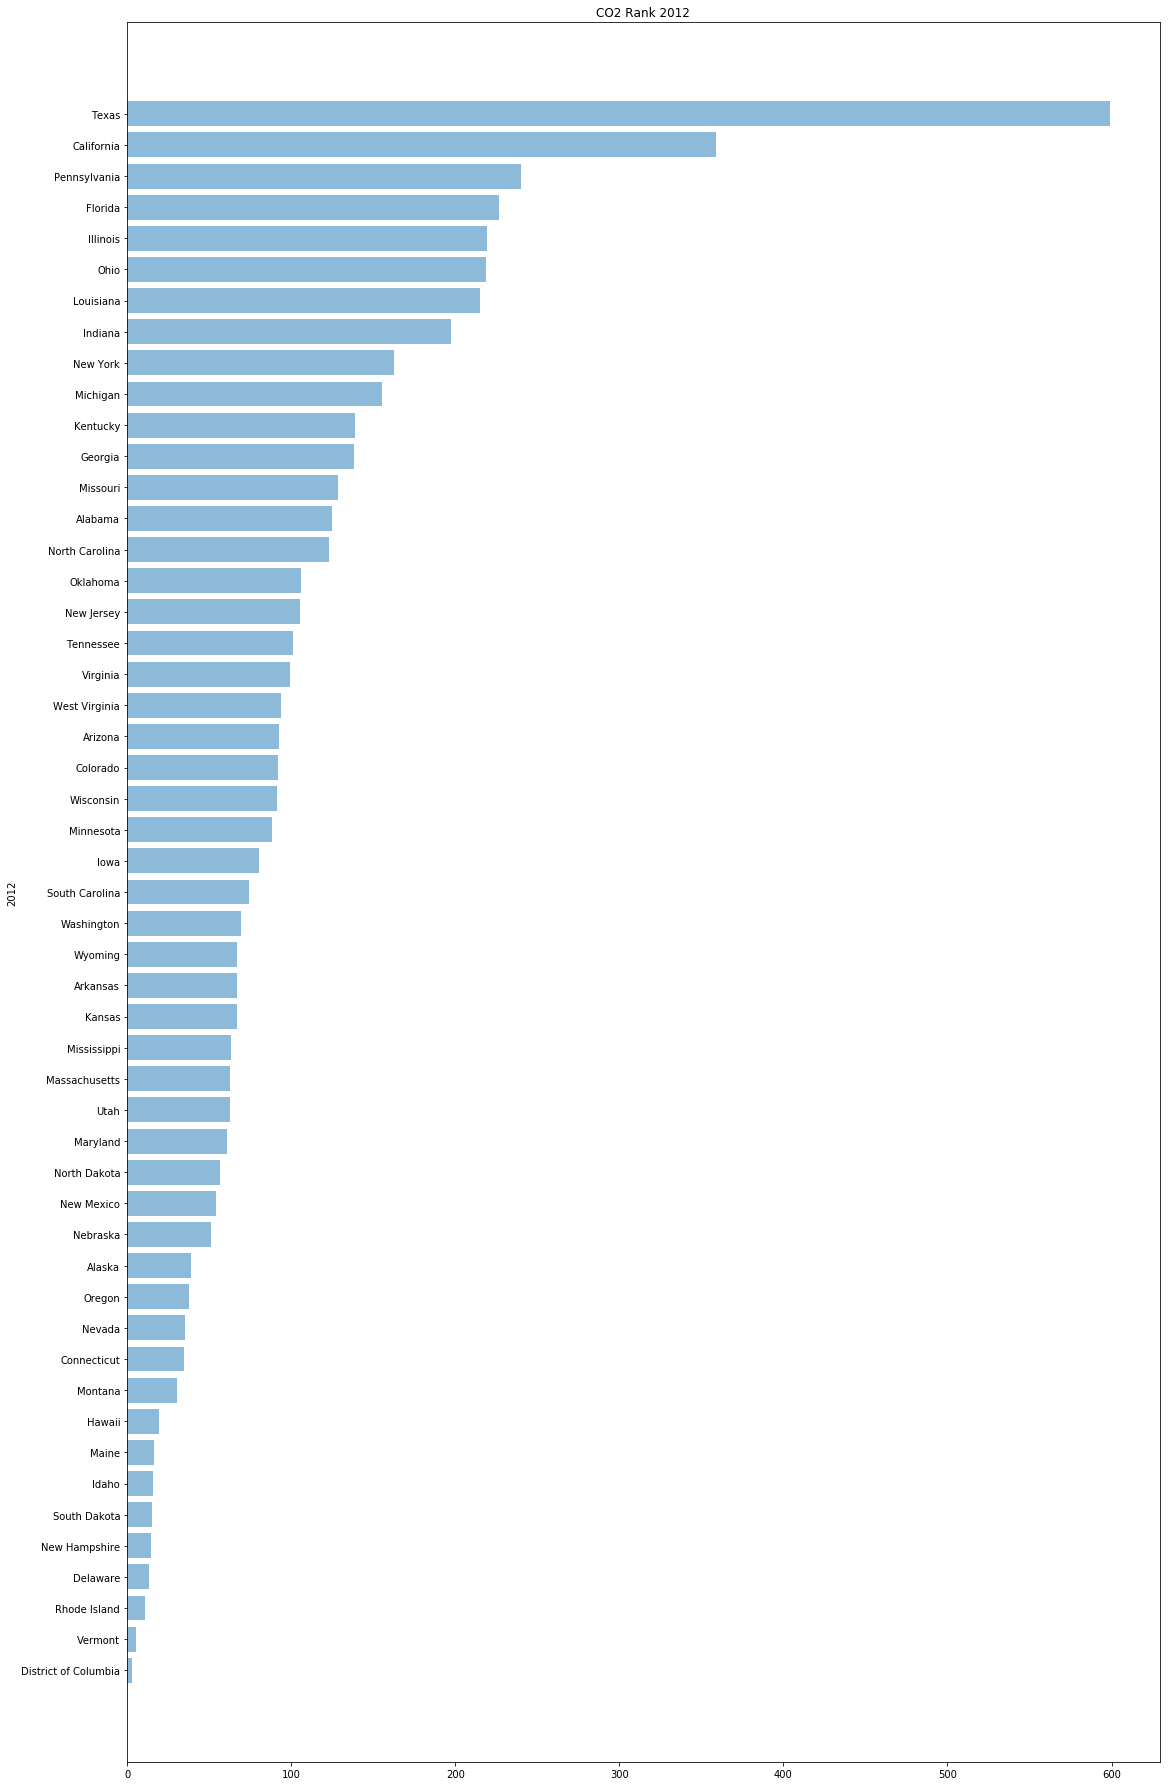

In [17]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_CO2_state_12sorted['State']))

plt.barh(y_pos, df_CO2_state_12sorted[2012], align='center', alpha=0.5)
plt.yticks(y_pos, df_CO2_state_12sorted['State'])
plt.ylabel(2012)
plt.title('CO2 Rank 2012')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

### The descending CO2 emission quantity of year 2014

In [18]:
df_CO2_state_14sorted = df_CO2_state_keep.sort_values(2014)
df_CO2_state_14sorted[['State', 2014]].head(10)

State       2014
8   District of Columbia   3.058483
45               Vermont   5.978197
39          Rhode Island  10.782673
7               Delaware  12.910214
29         New Hampshire  15.203143
41          South Dakota  15.693404
19                 Maine  16.862817
12                 Idaho  16.900937
11                Hawaii  18.598966
26               Montana  32.380830

In [19]:
df_CO2_state_14sorted[['State', 2014]].tail(10)

State        2014
22      Michigan  163.567087
32      New York  171.968046
18     Louisiana  203.776138
14       Indiana  207.945714
9        Florida  230.652130
35          Ohio  234.356927
13      Illinois  235.412072
38  Pennsylvania  249.112237
4     California  357.499077
43         Texas  626.004217

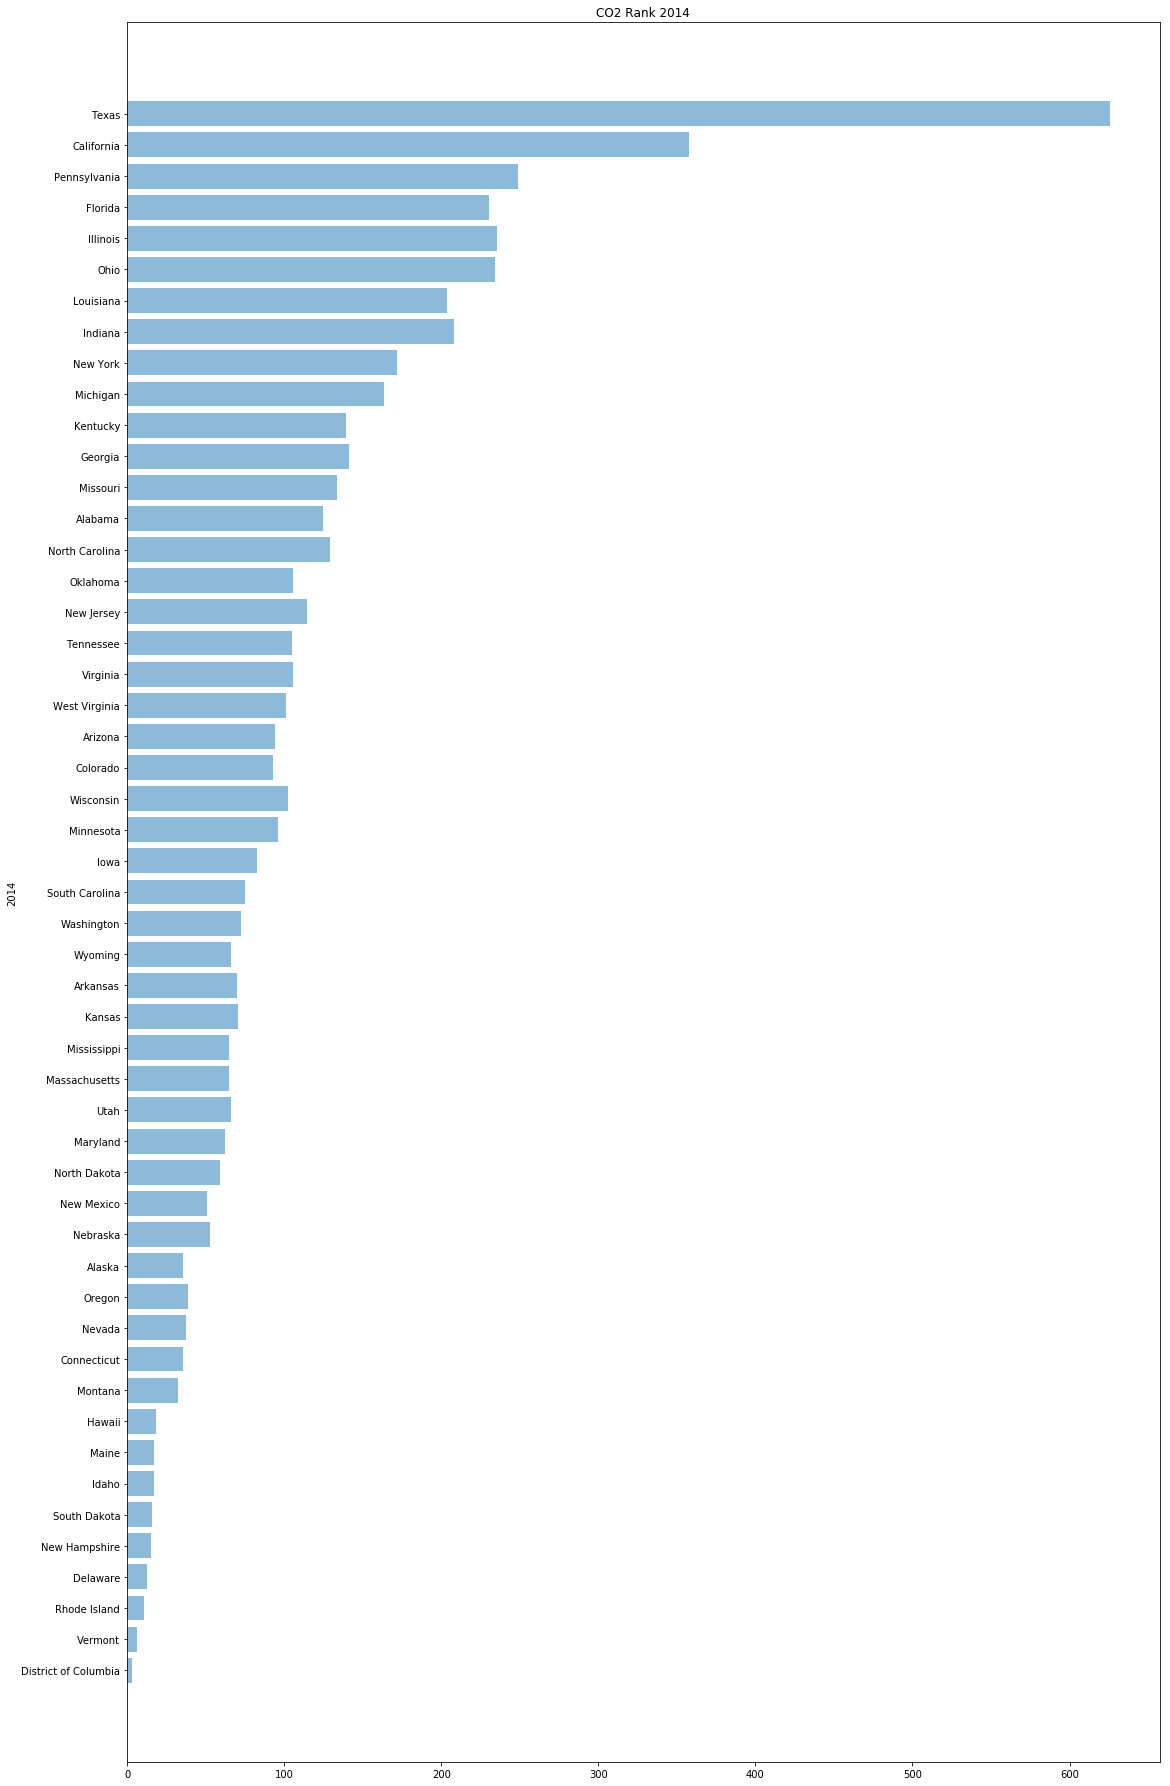

In [20]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_CO2_state_12sorted['State']))

plt.barh(y_pos, df_CO2_state_12sorted[2014], align='center', alpha=0.5)
plt.yticks(y_pos, df_CO2_state_12sorted['State'])
plt.ylabel(2014)
plt.title('CO2 Rank 2014')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

### The descending CO2 emission quantity of year 2016

In [21]:
df_CO2_state_16sorted = df_CO2_state_keep.sort_values(2016)
df_CO2_state_16sorted[['State', 2016]].head(10)

State       2016
8   District of Columbia   2.779124
45               Vermont   5.987708
39          Rhode Island   9.803139
7               Delaware  13.382802
29         New Hampshire  13.828610
41          South Dakota  15.077556
19                 Maine  16.552383
12                 Idaho  18.483087
11                Hawaii  18.545987
26               Montana  30.626818

In [22]:
df_CO2_state_16sorted[['State', 2016]].tail(10)

State        2016
22      Michigan  152.602043
32      New York  164.556233
14       Indiana  182.854052
13      Illinois  205.190172
35          Ohio  207.409731
18     Louisiana  210.280227
38  Pennsylvania  218.605364
9        Florida  231.329294
4     California  363.342966
43         Texas  657.420430

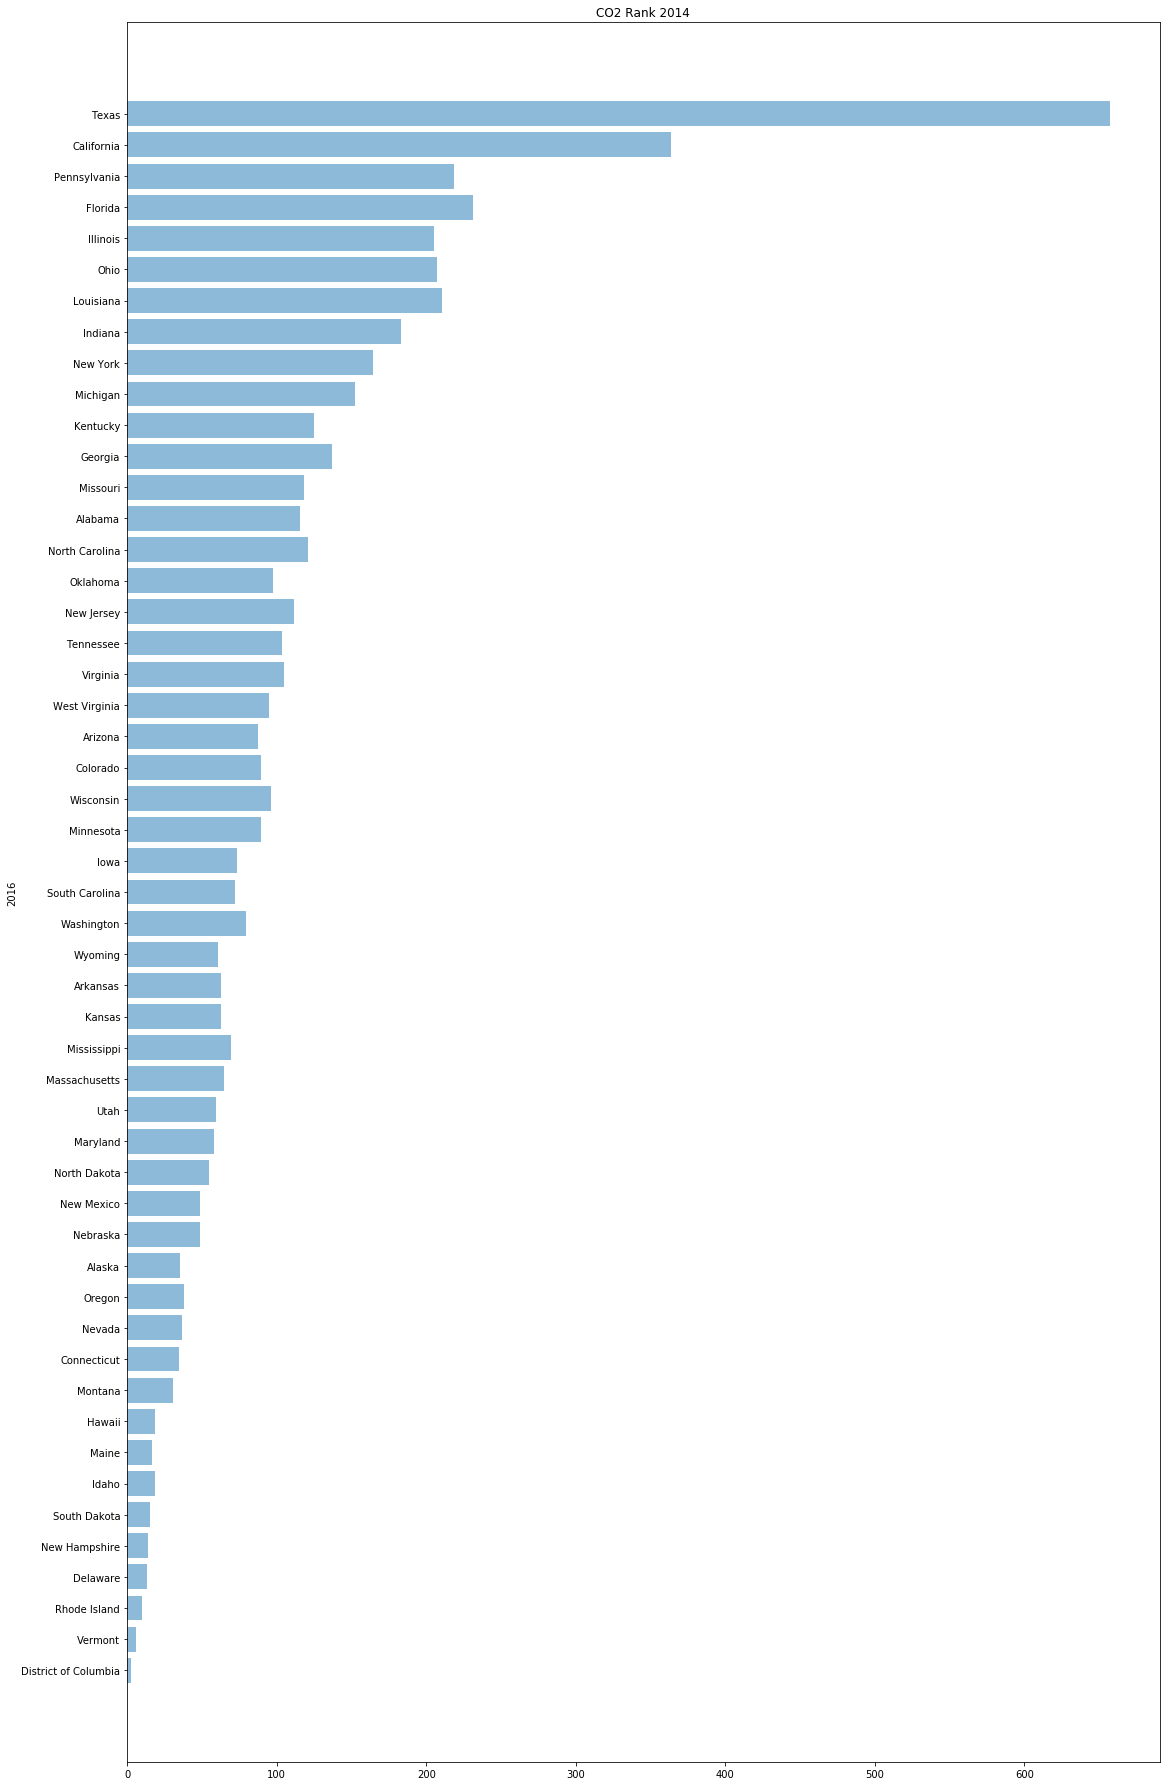

In [23]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_CO2_state_12sorted['State']))

plt.barh(y_pos, df_CO2_state_12sorted[2016], align='center', alpha=0.5)
plt.yticks(y_pos, df_CO2_state_12sorted['State'])
plt.ylabel(2016)
plt.title('CO2 Rank 2014')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

### The descending rank of awareness data in 2014

#### The descending rank of "happening" in 2014

In [24]:
df_a14sort_happening = df_YPCCC_2014_State_new.sort_values('happening')
df_a14sort_happening[['Statename', 'happening']].head(10)

Statename  happening
49  West Virginia         54
50        Wyoming         55
1         Alabama         56
28   North Dakota         56
17       Kentucky         56
2        Arkansas         57
36       Oklahoma         57
18      Louisiana         57
42      Tennessee         58
29       Nebraska         58

In [25]:
df_a14sort_happening[['Statename', 'happening']].tail(10)

Statename  happening
37                Oregon         67
47            Washington         68
46               Vermont         68
20              Maryland         68
31            New Jersey         68
19         Massachusetts         69
4             California         70
34              New York         72
11                Hawaii         75
7   District of Columbia         81

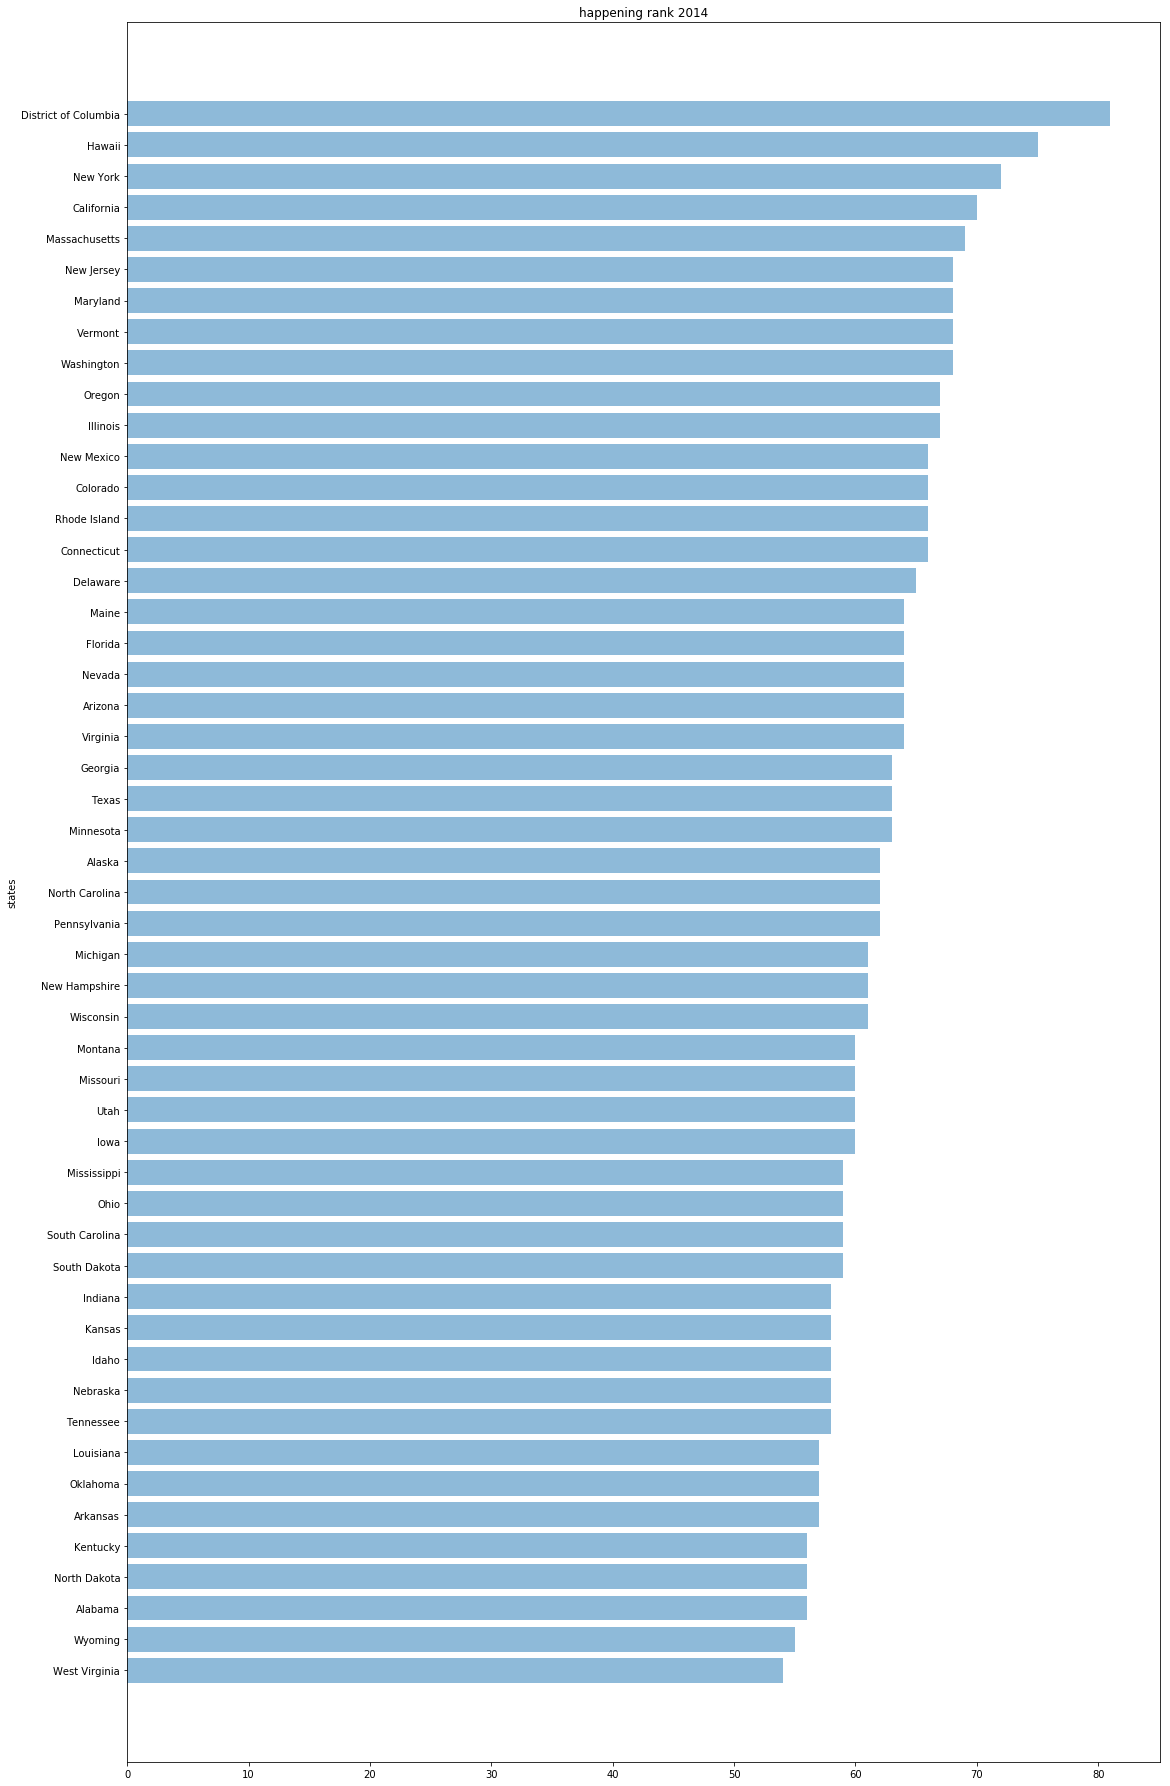

In [26]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a14sort_happening['Statename']))

plt.barh(y_pos, df_a14sort_happening['happening'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a14sort_happening['Statename'])
plt.ylabel('states')
plt.title('happening rank 2014')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "human" 2014

In [27]:
df_a14sort_human = df_YPCCC_2014_State_new.sort_values('human')
df_a14sort_human[['Statename', 'human']].head(10)

Statename  human
50        Wyoming     42
1         Alabama     43
28   North Dakota     43
49  West Virginia     43
2        Arkansas     44
36       Oklahoma     44
18      Louisiana     44
17       Kentucky     44
13          Idaho     44
44           Utah     45

In [28]:
df_a14sort_human[['Statename', 'human']].tail(10)

Statename  human
47            Washington     51
46               Vermont     52
20              Maryland     52
19         Massachusetts     52
31            New Jersey     52
32            New Mexico     52
34              New York     54
4             California     55
11                Hawaii     58
7   District of Columbia     61

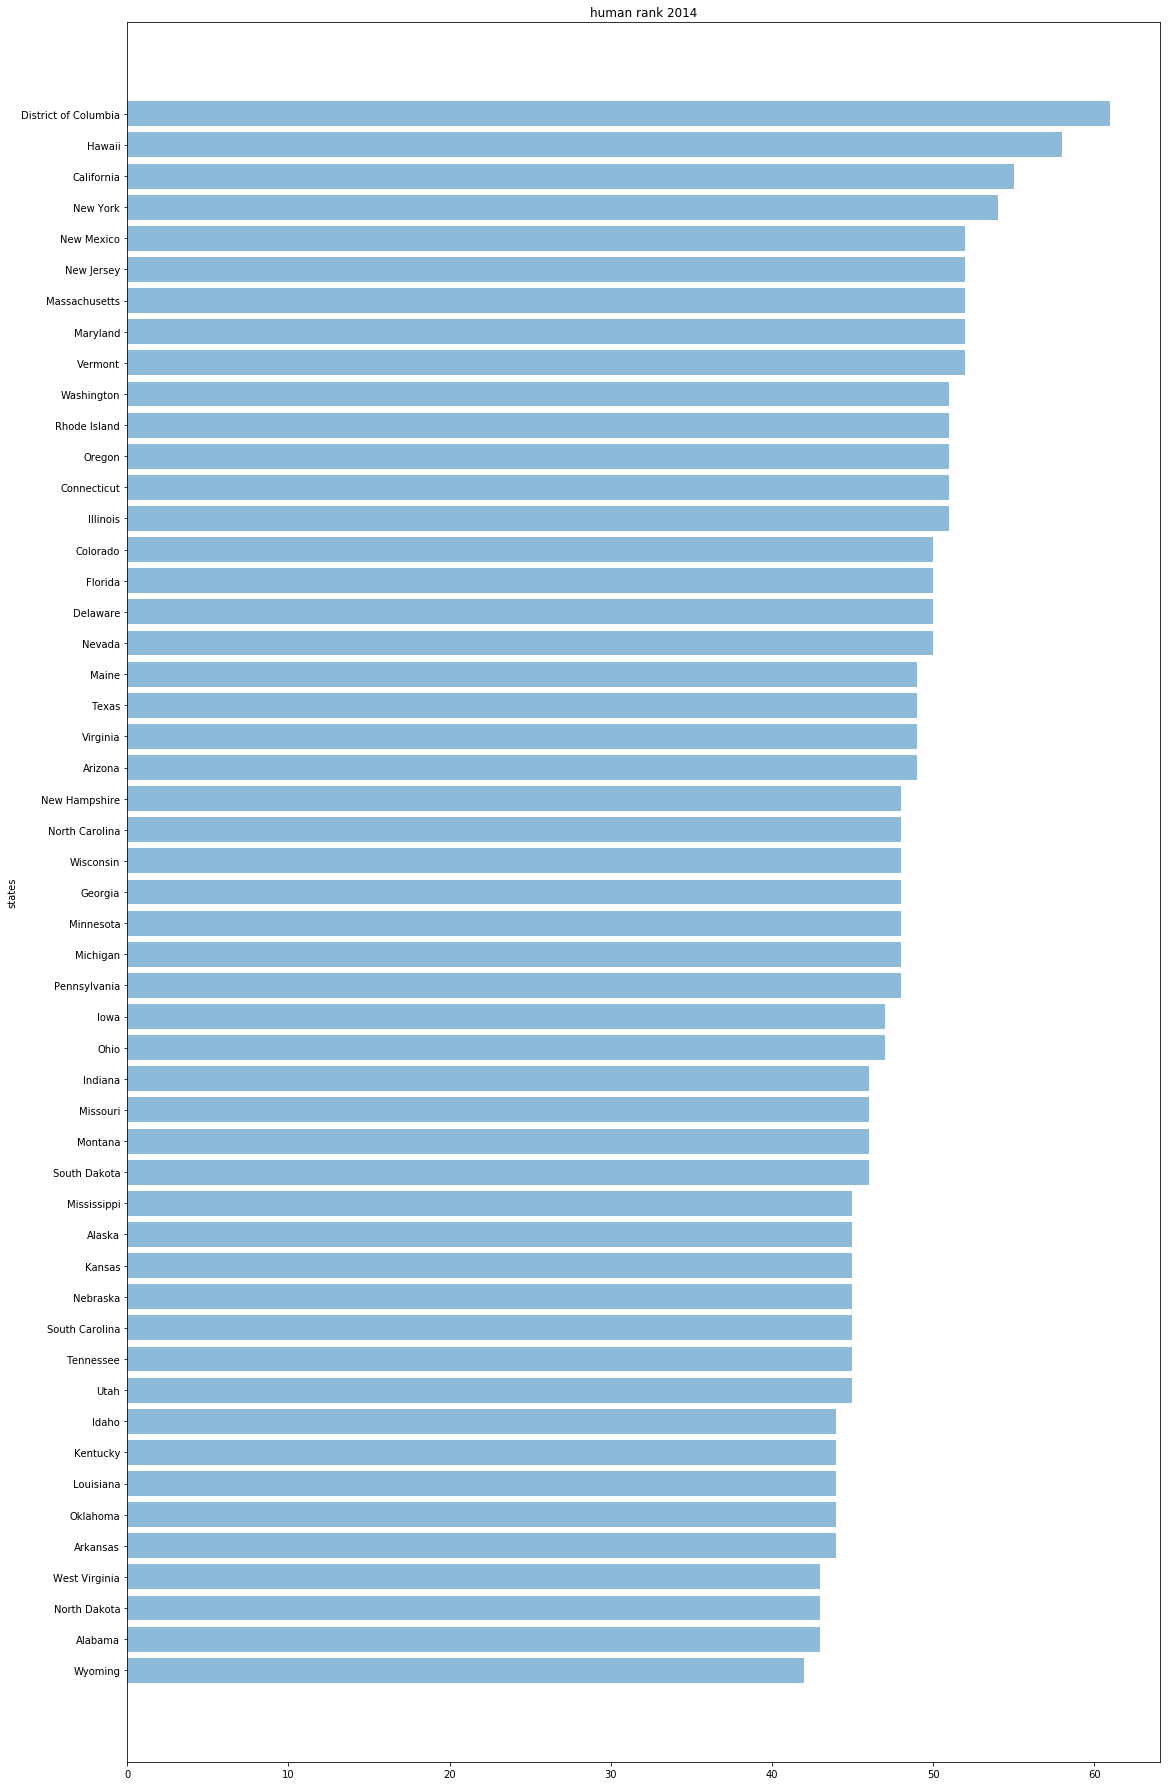

In [29]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a14sort_human['Statename']))

plt.barh(y_pos, df_a14sort_human['human'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a14sort_human['Statename'])
plt.ylabel('states')
plt.title('human rank 2014')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "worried" 2014

In [30]:
df_a14sort_worried = df_YPCCC_2014_State_new.sort_values('worried')
df_a14sort_worried[['Statename', 'worried']].head(10)

Statename  worried
50        Wyoming       41
49  West Virginia       42
28   North Dakota       43
1         Alabama       46
36       Oklahoma       46
18      Louisiana       46
17       Kentucky       46
15        Indiana       46
2        Arkansas       47
44           Utah       48

In [31]:
df_a14sort_worried[['Statename', 'worried']].tail(10)

Statename  worried
37                Oregon       57
46               Vermont       57
19         Massachusetts       58
47            Washington       58
20              Maryland       58
31            New Jersey       59
4             California       62
34              New York       63
11                Hawaii       66
7   District of Columbia       71

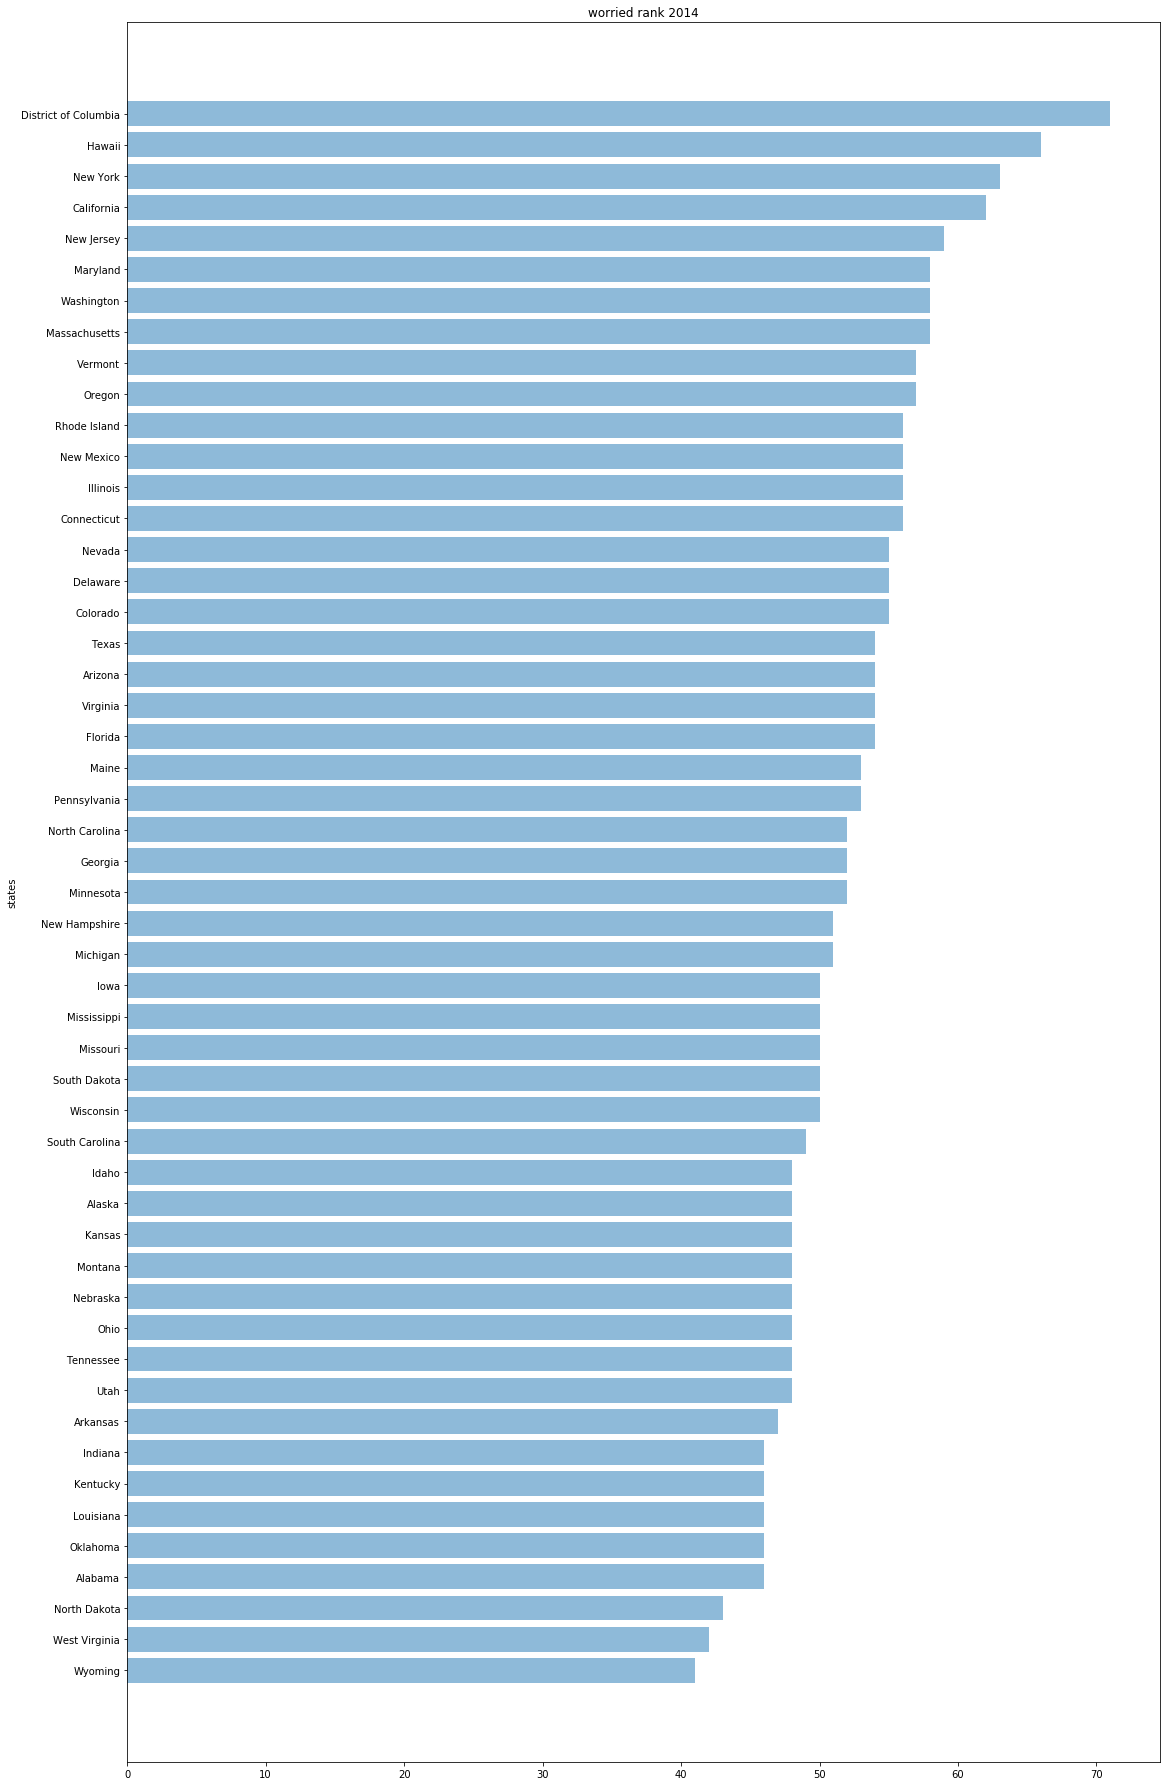

In [32]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a14sort_worried['Statename']))

plt.barh(y_pos, df_a14sort_worried['worried'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a14sort_worried['Statename'])
plt.ylabel('states')
plt.title('worried rank 2014')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "personal" 2014

In [33]:
df_a14sort_personal = df_YPCCC_2014_State_new.sort_values('personal')
df_a14sort_personal[['Statename', 'personal']].head(10)

Statename  personal
28   North Dakota        24
50        Wyoming        25
49  West Virginia        25
26        Montana        29
0          Alaska        29
17       Kentucky        30
15        Indiana        30
29       Nebraska        30
18      Louisiana        31
16         Kansas        31

In [34]:
df_a14sort_personal[['Statename', 'personal']].tail(10)

Statename  personal
3                Arizona        38
43                 Texas        38
9                Florida        38
32            New Mexico        38
20              Maryland        38
31            New Jersey        38
34              New York        40
4             California        42
11                Hawaii        43
7   District of Columbia        47

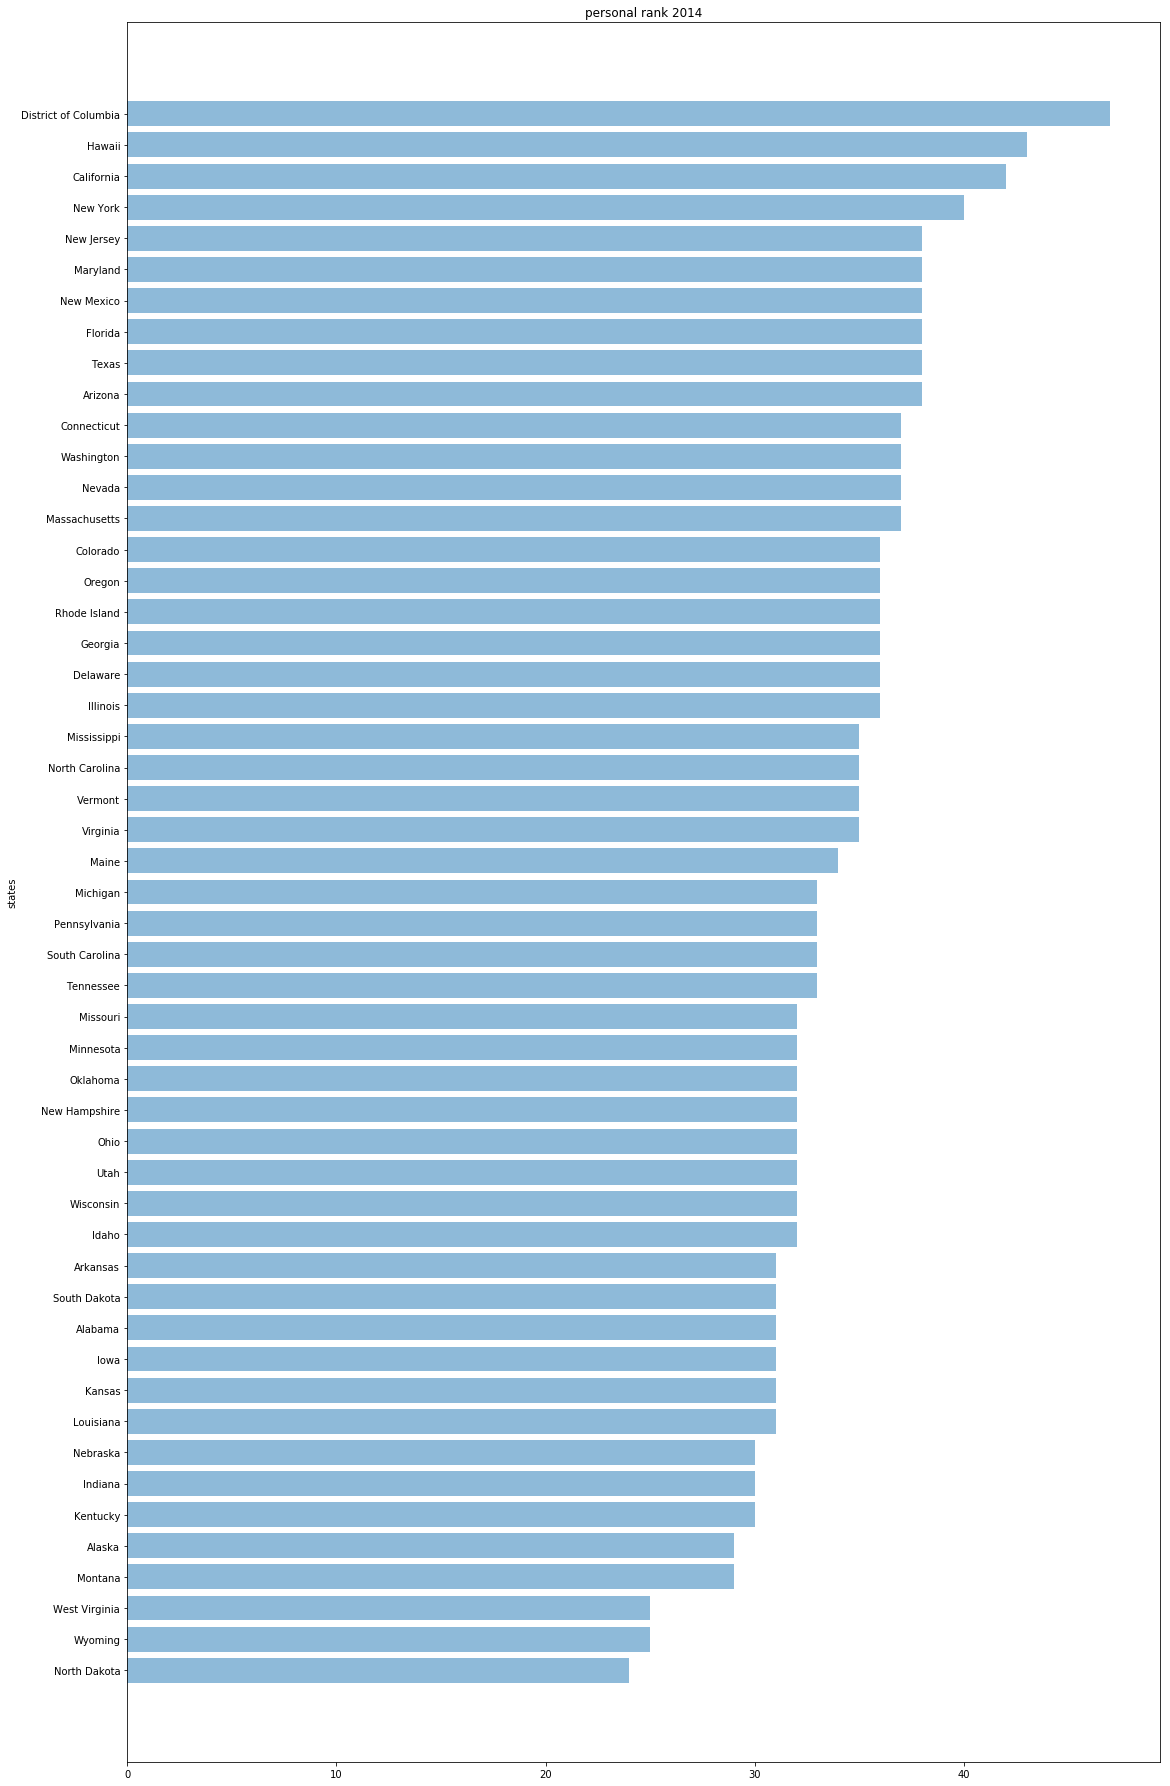

In [35]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a14sort_human['Statename']))

plt.barh(y_pos, df_a14sort_personal['personal'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a14sort_personal['Statename'])
plt.ylabel('states')
plt.title('personal rank 2014')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "CO2limits" 2014

In [36]:
df_a14sort_CO2limits = df_YPCCC_2014_State_new.sort_values('CO2limits')
df_a14sort_CO2limits[['Statename', 'CO2limits']].head(10)

Statename  CO2limits
50        Wyoming         43
49  West Virginia         43
28   North Dakota         48
0          Alaska         48
18      Louisiana         50
36       Oklahoma         52
17       Kentucky         53
1         Alabama         53
15        Indiana         56
44           Utah         58

In [37]:
df_a14sort_CO2limits[['Statename', 'CO2limits']].tail(10)

Statename  CO2limits
46               Vermont         69
47            Washington         69
6            Connecticut         70
14              Illinois         70
20              Maryland         70
4             California         72
31            New Jersey         73
34              New York         76
11                Hawaii         76
7   District of Columbia         80

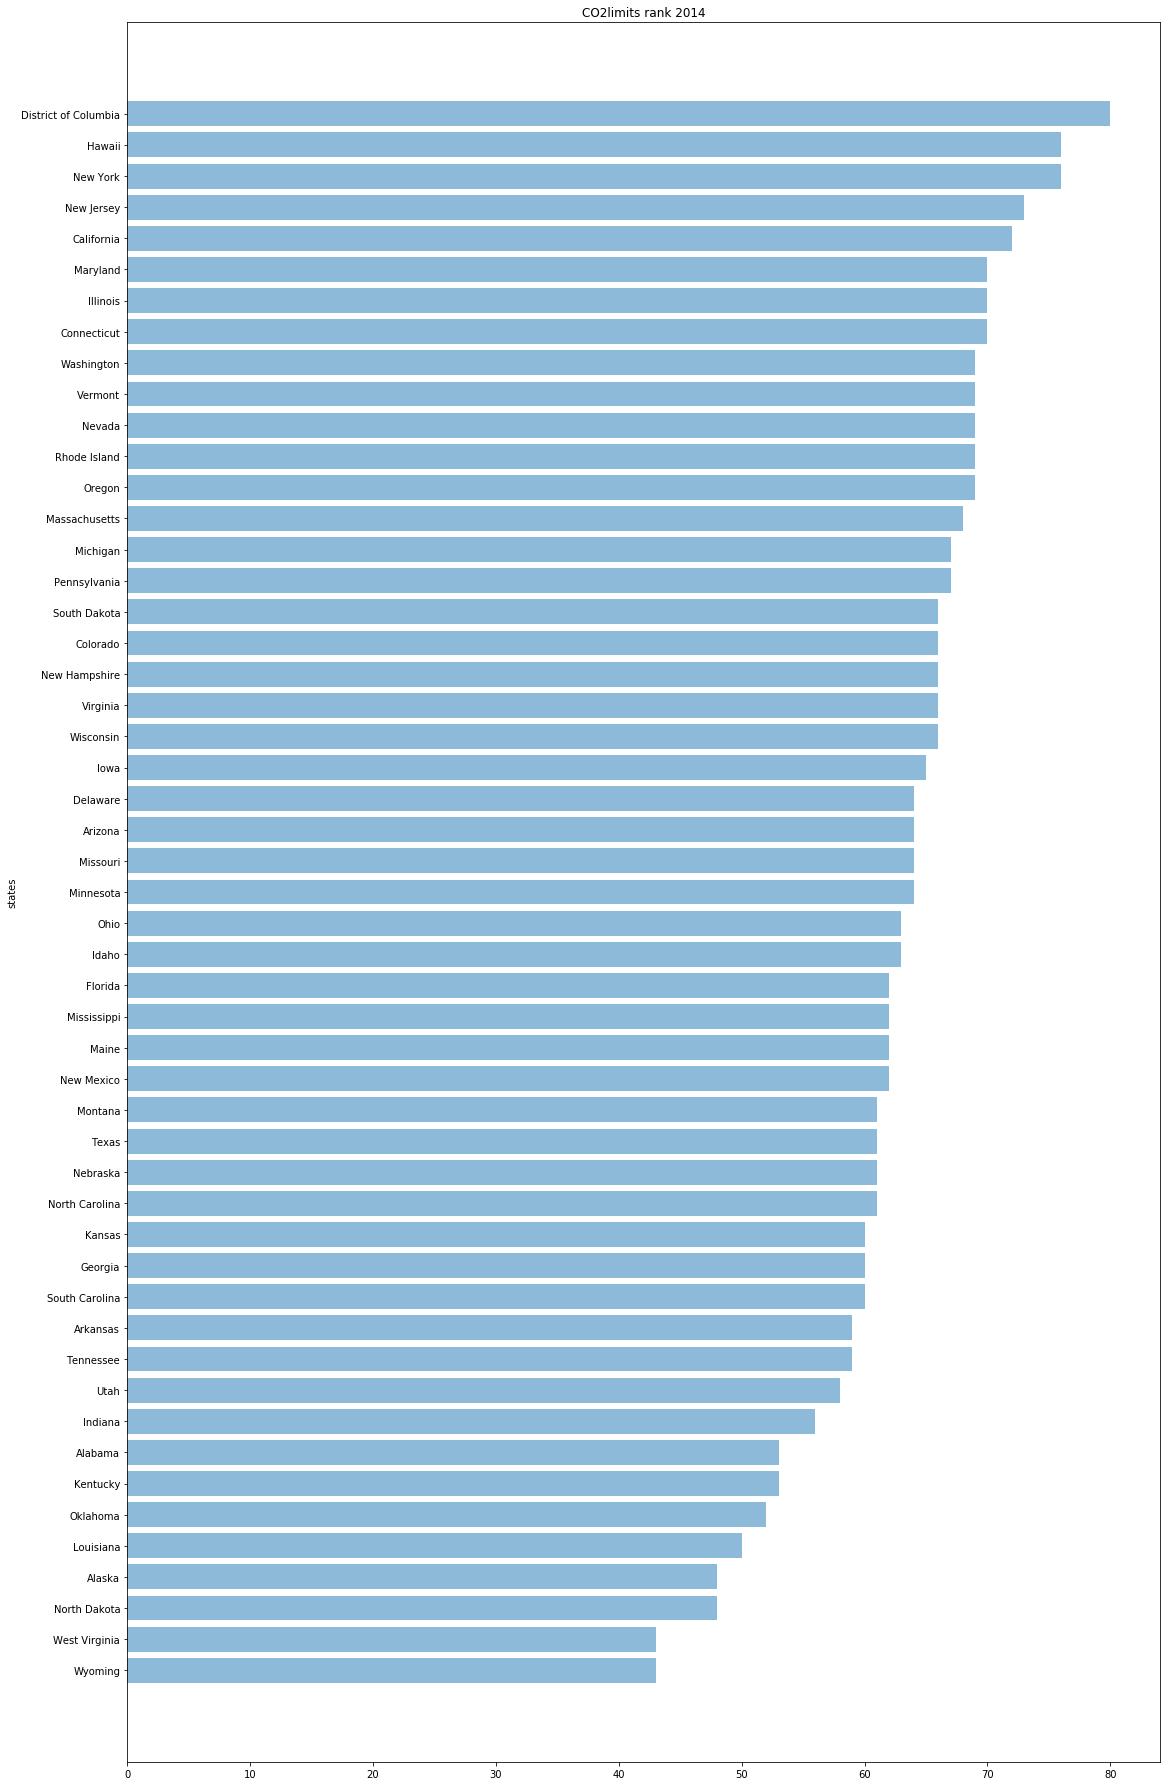

In [38]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a14sort_CO2limits['Statename']))

plt.barh(y_pos, df_a14sort_CO2limits['CO2limits'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a14sort_CO2limits['Statename'])
plt.ylabel('states')
plt.title('CO2limits rank 2014')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "regulate" 2014

In [39]:
df_a14sort_regulate = df_YPCCC_2014_State_new.sort_values('regulate')
df_a14sort_regulate[['Statename', 'regulate']].head(10)

Statename  regulate
50        Wyoming        64
28   North Dakota        67
49  West Virginia        67
0          Alaska        67
18      Louisiana        68
36       Oklahoma        68
1         Alabama        69
44           Utah        70
17       Kentucky        70
16         Kansas        71

In [40]:
df_a14sort_regulate[['Statename', 'regulate']].tail(10)

Statename  regulate
6            Connecticut        78
47            Washington        78
4             California        79
39          Rhode Island        79
19         Massachusetts        79
20              Maryland        79
46               Vermont        79
34              New York        80
11                Hawaii        81
7   District of Columbia        86

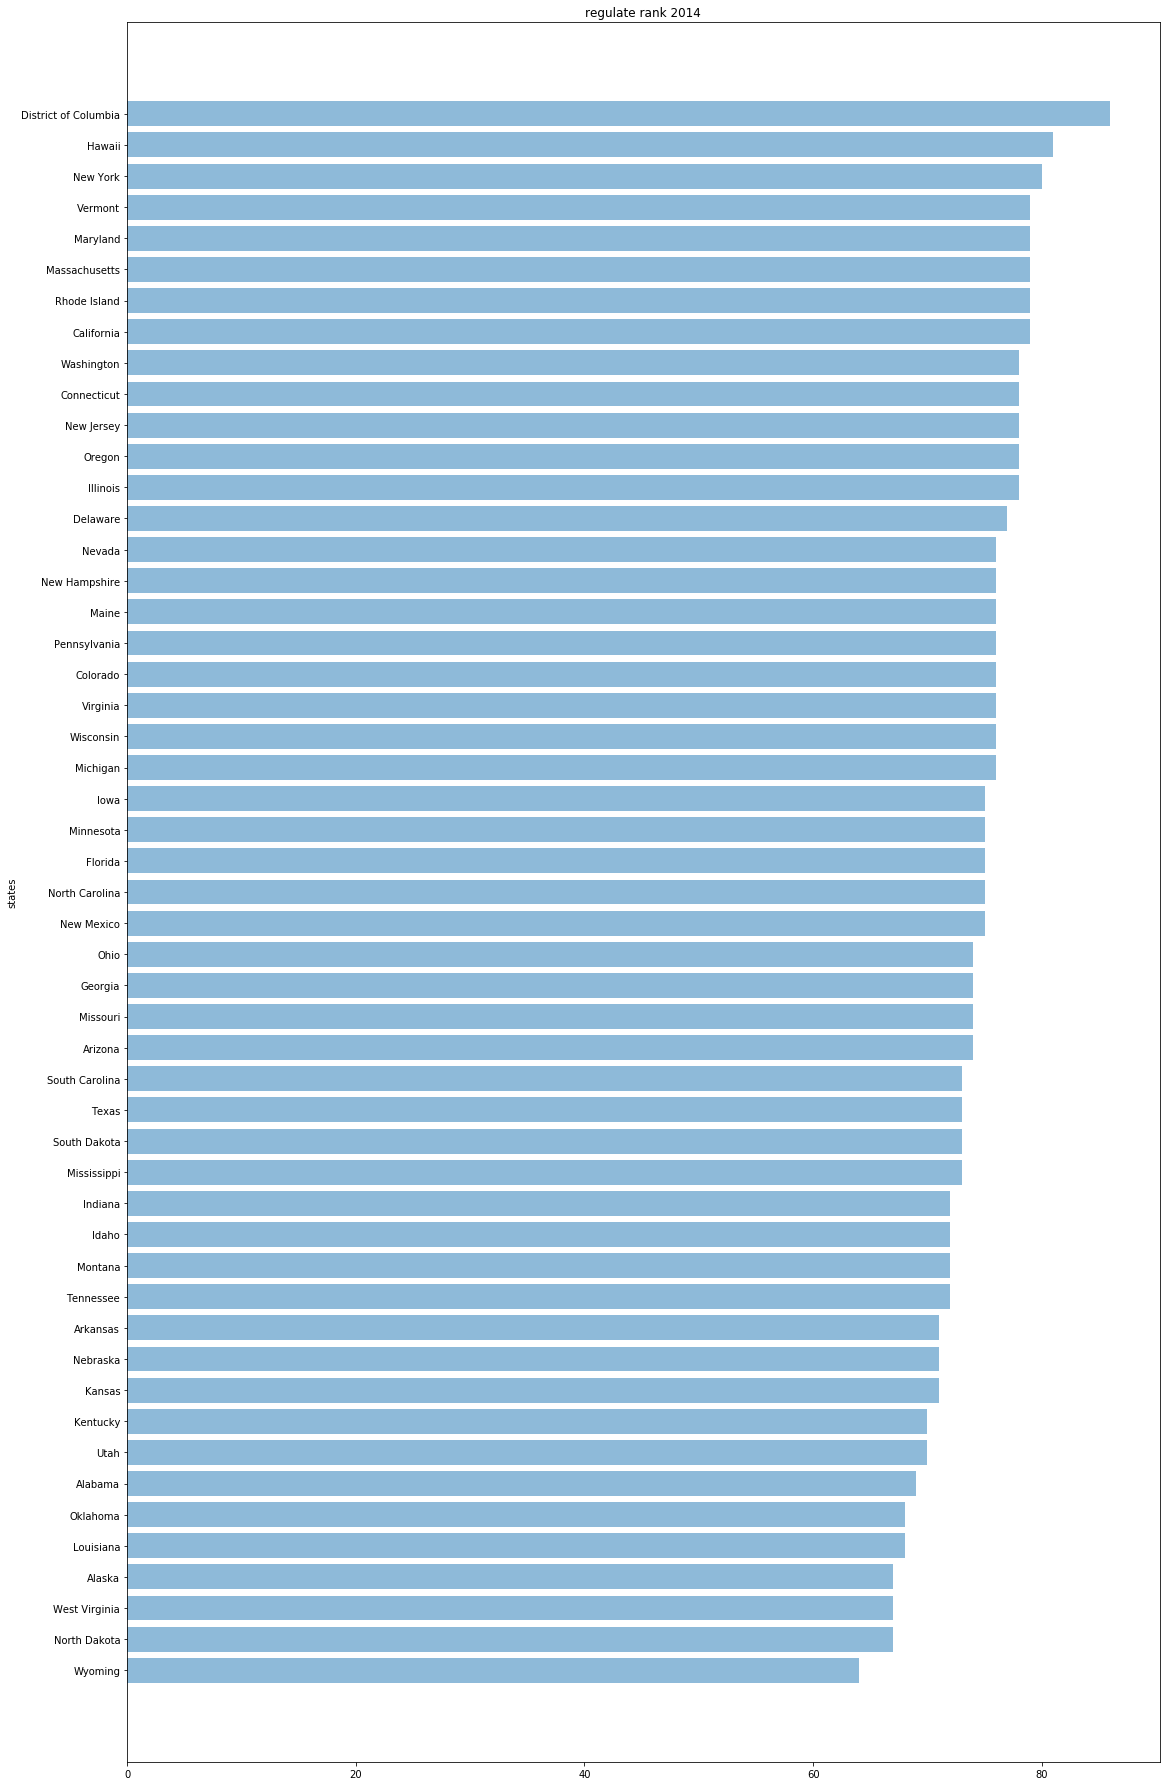

In [41]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a14sort_regulate['Statename']))

plt.barh(y_pos, df_a14sort_regulate['regulate'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a14sort_regulate['Statename'])
plt.ylabel('states')
plt.title('regulate rank 2014')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "fundrenewable" 2014

In [42]:
df_a14sort_fundrenewables = df_YPCCC_2014_State_new.sort_values('fundrenewables')
df_a14sort_fundrenewables[['Statename', 'fundrenewables']].head(10)

Statename  fundrenewables
1       Alabama              73
2      Arkansas              73
36     Oklahoma              73
18    Louisiana              73
25  Mississippi              74
44         Utah              74
42    Tennessee              74
13        Idaho              74
50      Wyoming              74
10      Georgia              75

In [43]:
df_a14sort_fundrenewables[['Statename', 'fundrenewables']].tail(10)

Statename  fundrenewables
31            New Jersey              79
4             California              79
23             Minnesota              79
20              Maryland              80
14              Illinois              80
19         Massachusetts              80
34              New York              80
46               Vermont              81
11                Hawaii              83
7   District of Columbia              86

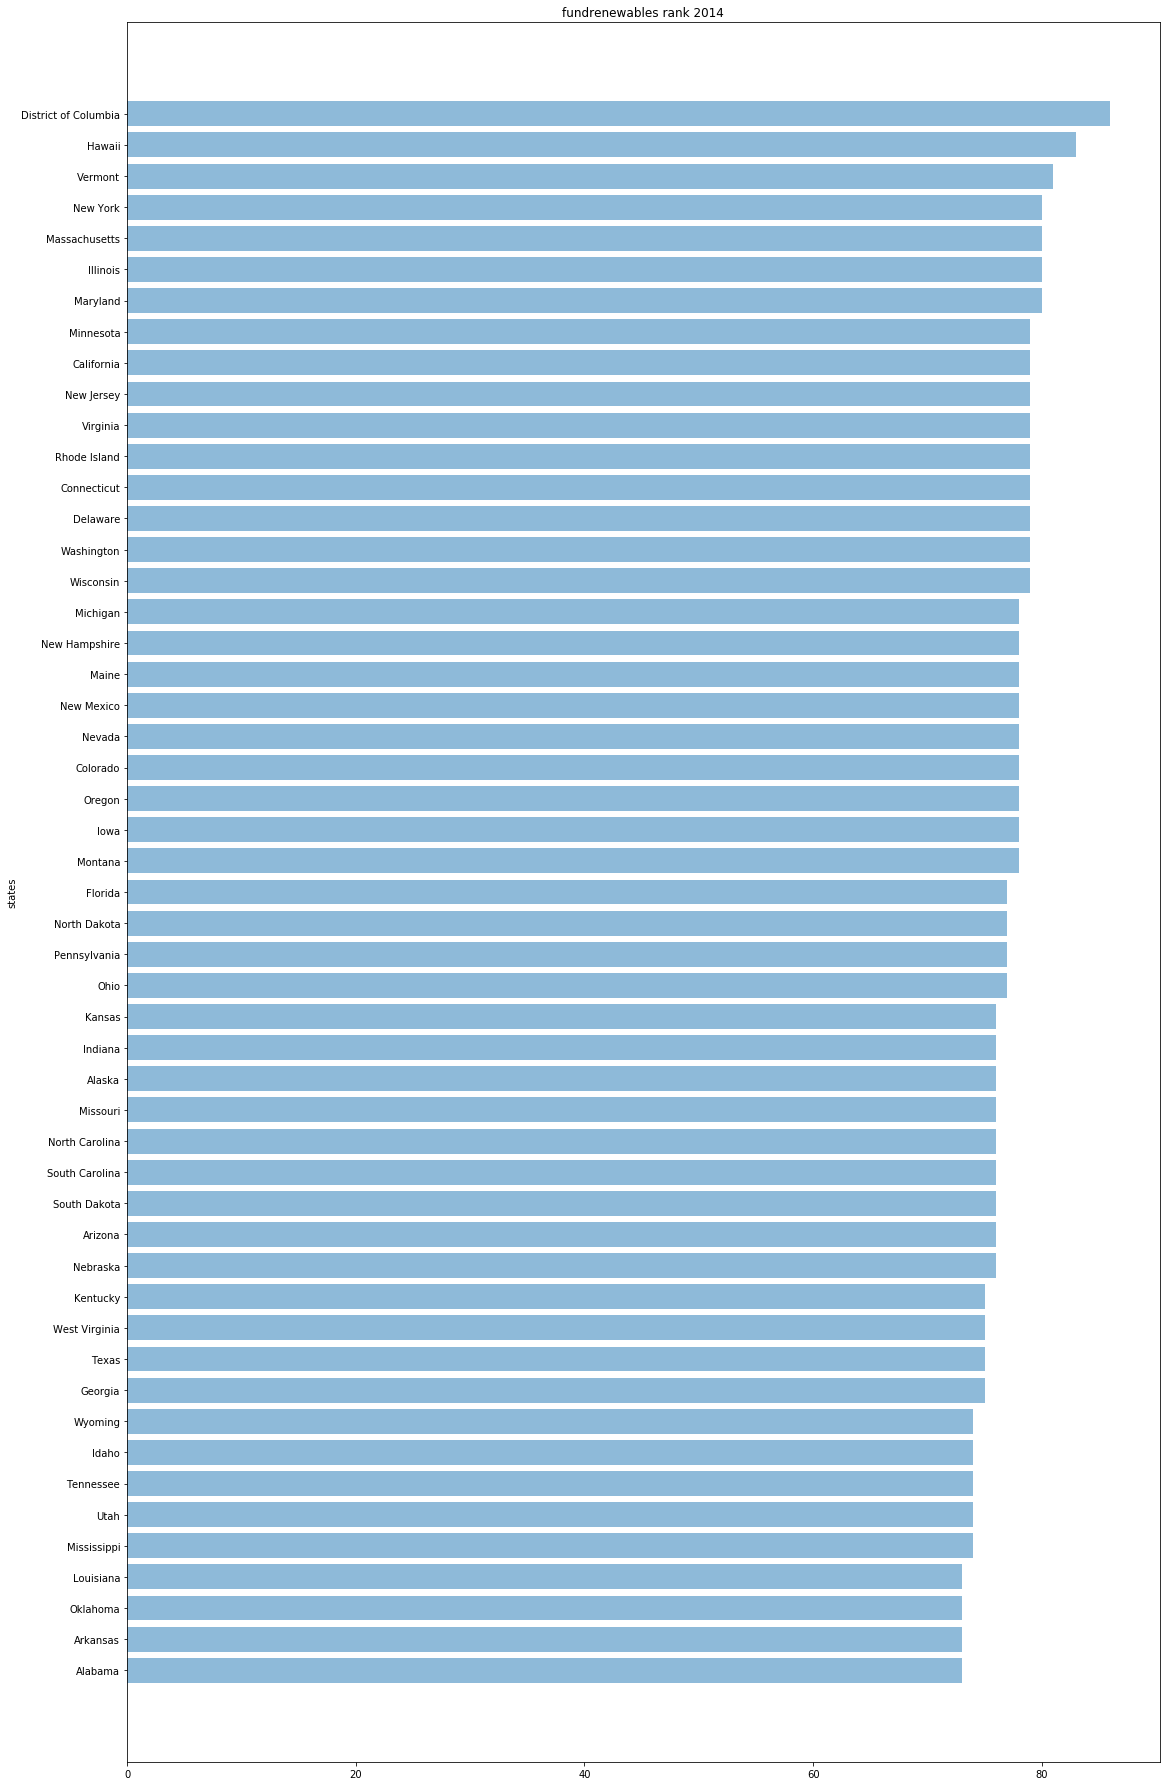

In [44]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a14sort_fundrenewables['Statename']))

plt.barh(y_pos, df_a14sort_fundrenewables['fundrenewables'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a14sort_fundrenewables['Statename'])
plt.ylabel('states')
plt.title('fundrenewables rank 2014')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

### The descending rank of awareness data in 2016

#### The descending rank of "happening" in 2016

In [45]:
df_a16sort_happening = df_YCOM_2016_state.sort_values('happening')
df_a16sort_happening[['GeoName', 'happening']].head(10)

GeoName  happening
49  West Virginia     60.476
51        Wyoming     60.921
35   North Dakota     62.190
18       Kentucky     62.392
45           Utah     63.071
37       Oklahoma     63.127
1         Alabama     63.450
4        Arkansas     64.120
15        Indiana     64.138
43      Tennessee     64.144

In [46]:
df_a16sort_happening[['GeoName', 'happening']].tail(10)

GeoName  happening
48            Washington     72.632
14              Illinois     72.649
46               Vermont     72.692
22         Massachusetts     73.947
31            New Jersey     75.110
21              Maryland     75.139
5             California     75.241
33              New York     77.018
12                Hawaii     78.490
9   District of Columbia     84.364

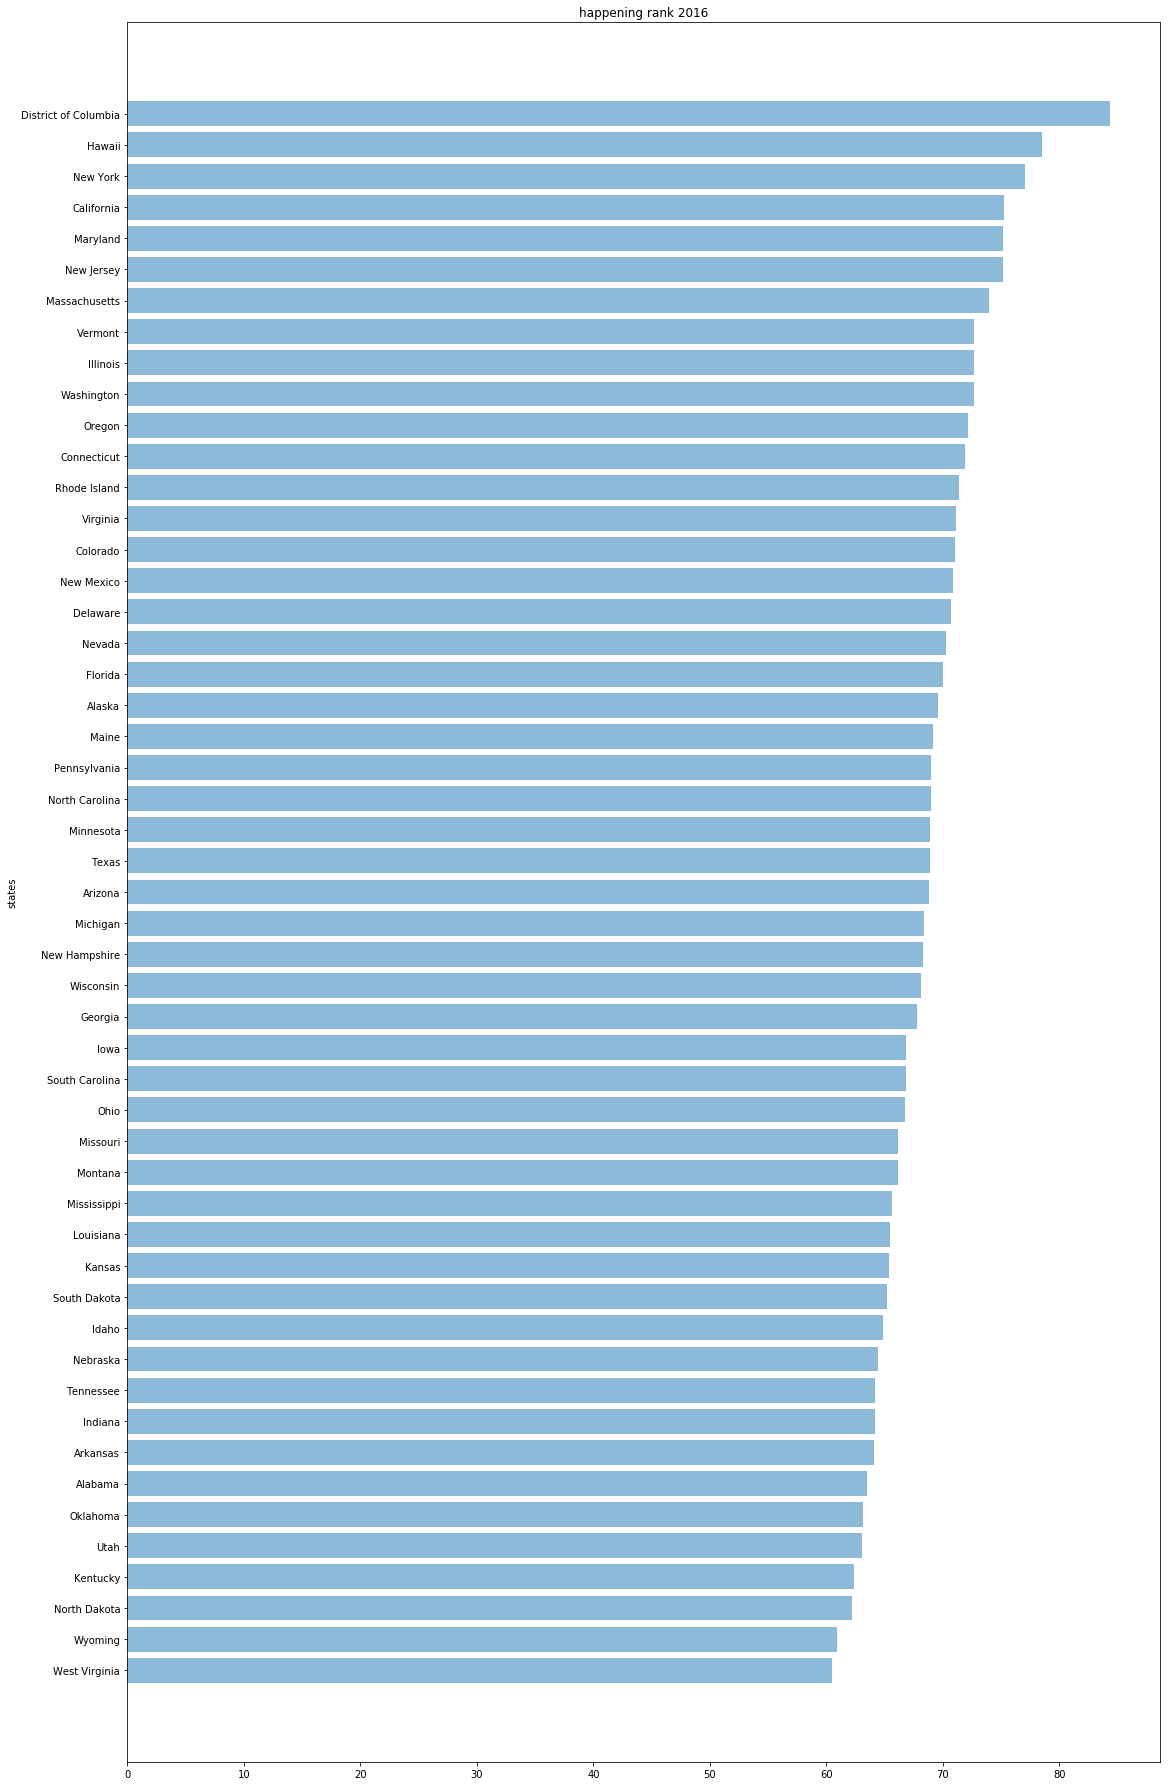

In [47]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a16sort_happening['GeoName']))

plt.barh(y_pos, df_a16sort_happening['happening'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a16sort_happening['GeoName'])
plt.ylabel('states')
plt.title('happening rank 2016')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "human" 2016

In [48]:
df_a16sort_human = df_YCOM_2016_state.sort_values('human')
df_a16sort_human[['GeoName', 'human']].head(10)

GeoName   human
51        Wyoming  41.971
45           Utah  42.528
49  West Virginia  44.072
35   North Dakota  45.712
18       Kentucky  45.918
37       Oklahoma  45.989
13          Idaho  46.844
4        Arkansas  47.318
28       Nebraska  47.554
1         Alabama  47.603

In [49]:
df_a16sort_human[['GeoName', 'human']].tail(10)

GeoName   human
22         Massachusetts  55.928
7            Connecticut  56.503
40          Rhode Island  56.514
46               Vermont  56.765
31            New Jersey  57.442
33              New York  57.575
21              Maryland  57.944
5             California  59.035
12                Hawaii  61.622
9   District of Columbia  66.792

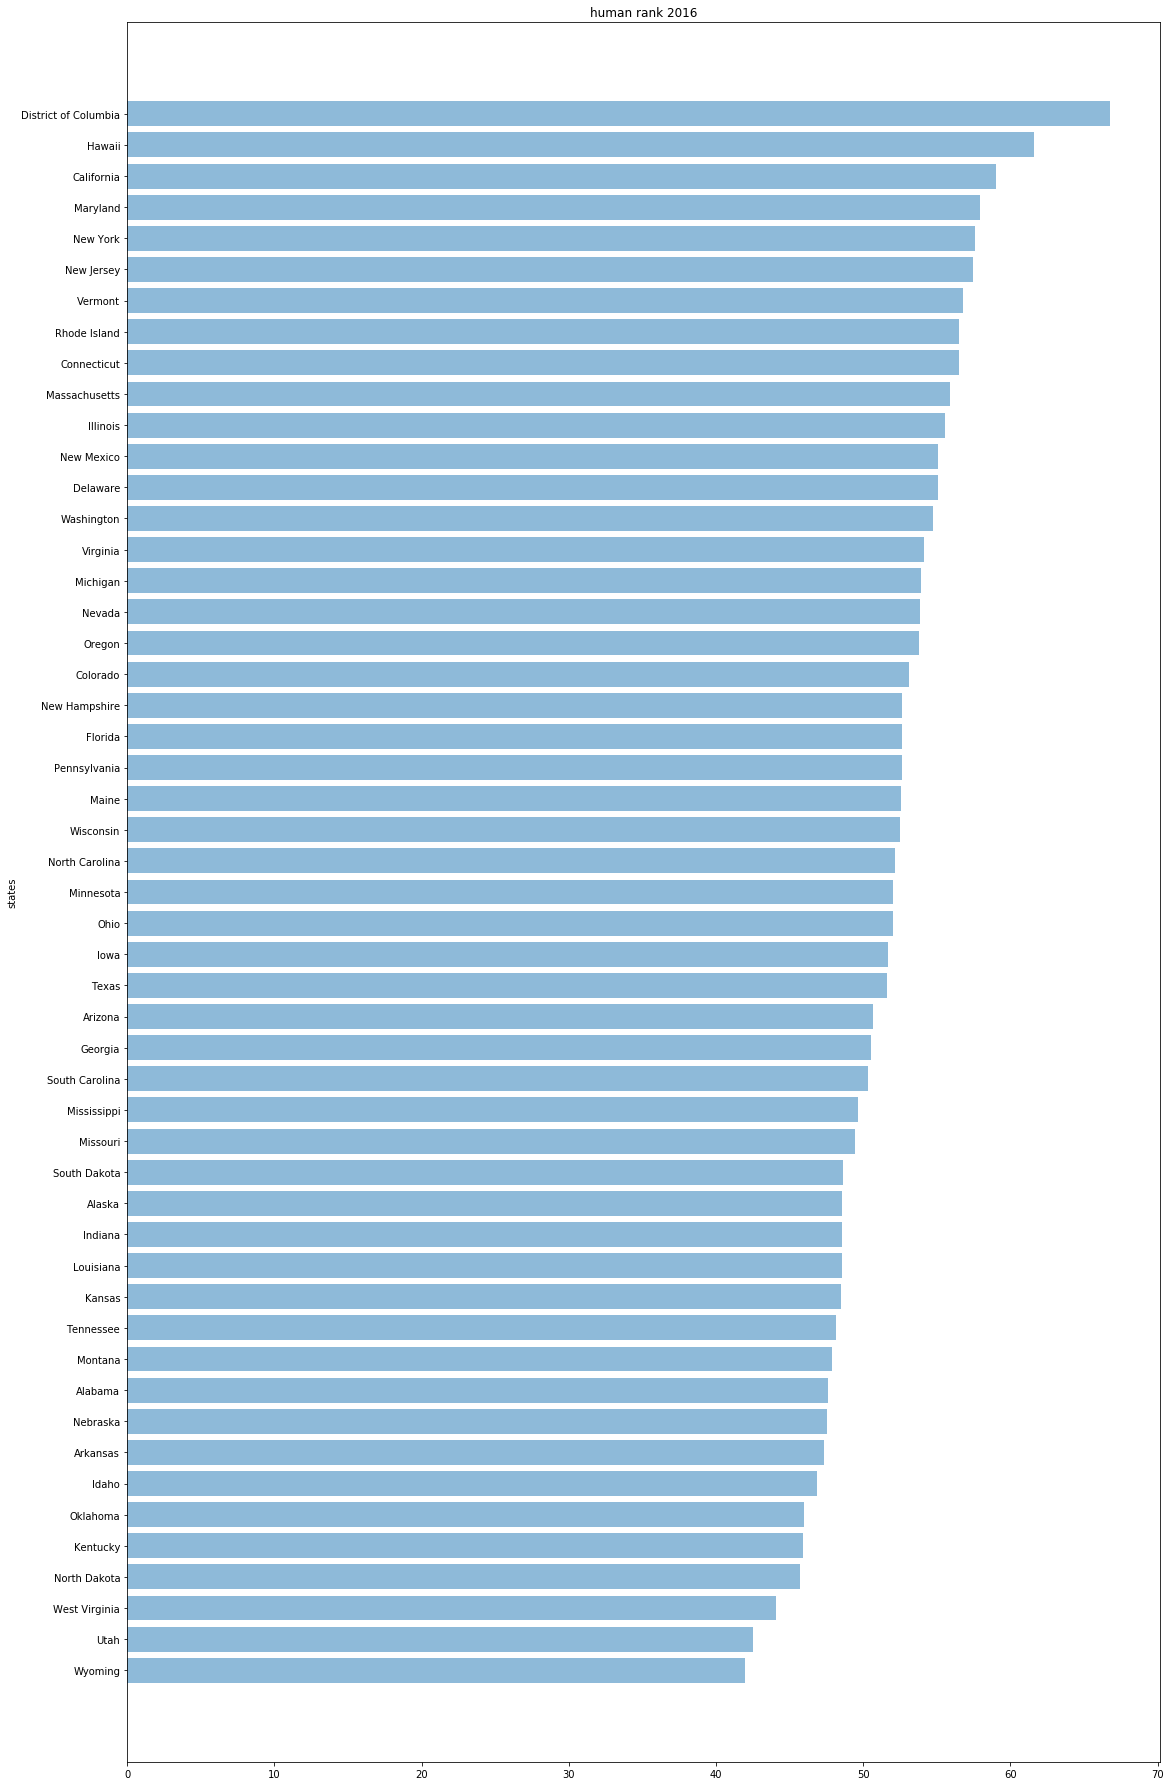

In [50]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a16sort_human['GeoName']))

plt.barh(y_pos, df_a16sort_human['human'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a16sort_human['GeoName'])
plt.ylabel('states')
plt.title('human rank 2016')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "worried" 2016

In [51]:
df_a16sort_worried = df_YCOM_2016_state.sort_values('worried')
df_a16sort_worried[['GeoName', 'worried']].head(10)

GeoName  worried
49  West Virginia   45.324
51        Wyoming   46.189
45           Utah   47.887
18       Kentucky   48.179
35   North Dakota   48.429
15        Indiana   49.340
37       Oklahoma   49.885
1         Alabama   50.584
28       Nebraska   51.052
43      Tennessee   51.170

In [52]:
df_a16sort_worried[['GeoName', 'worried']].tail(10)

GeoName  worried
40          Rhode Island   60.136
46               Vermont   60.665
7            Connecticut   61.396
22         Massachusetts   61.777
21              Maryland   63.227
31            New Jersey   64.546
5             California   65.256
33              New York   67.241
12                Hawaii   69.168
9   District of Columbia   74.292

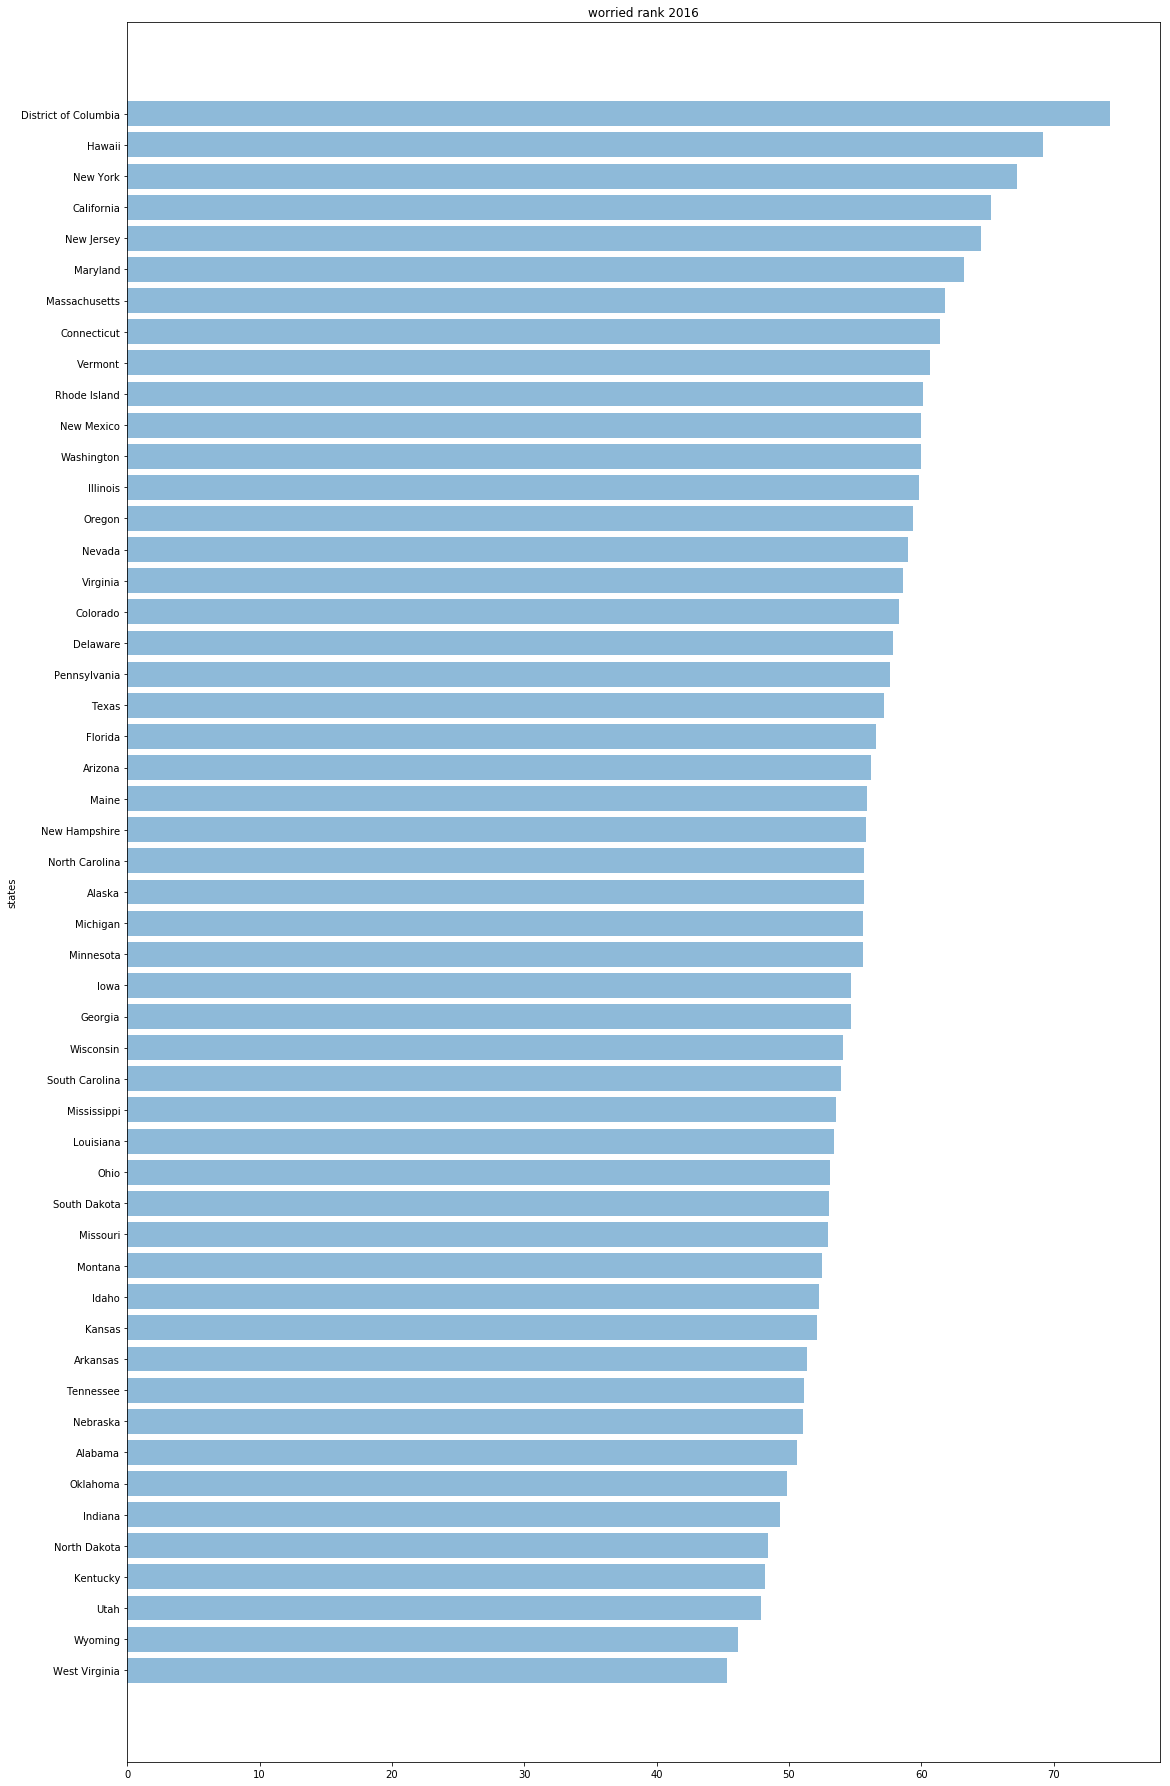

In [53]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a16sort_worried['GeoName']))

plt.barh(y_pos, df_a16sort_worried['worried'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a16sort_worried['GeoName'])
plt.ylabel('states')
plt.title('worried rank 2016')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "personal" 2016

In [54]:
df_a16sort_personal = df_YCOM_2016_state.sort_values('personal')
df_a16sort_personal[['GeoName', 'personal']].head(10)

GeoName  personal
35   North Dakota    28.443
51        Wyoming    28.734
49  West Virginia    30.052
27        Montana    32.298
28       Nebraska    33.037
42   South Dakota    33.389
16           Iowa    33.480
18       Kentucky    33.618
45           Utah    33.648
15        Indiana    33.877

In [55]:
df_a16sort_personal[['GeoName', 'personal']].tail(10)

GeoName  personal
29                Nevada    41.120
22         Massachusetts    41.766
44                 Texas    41.836
32            New Mexico    42.356
31            New Jersey    42.882
21              Maryland    43.110
33              New York    44.748
5             California    47.059
12                Hawaii    47.317
9   District of Columbia    51.474

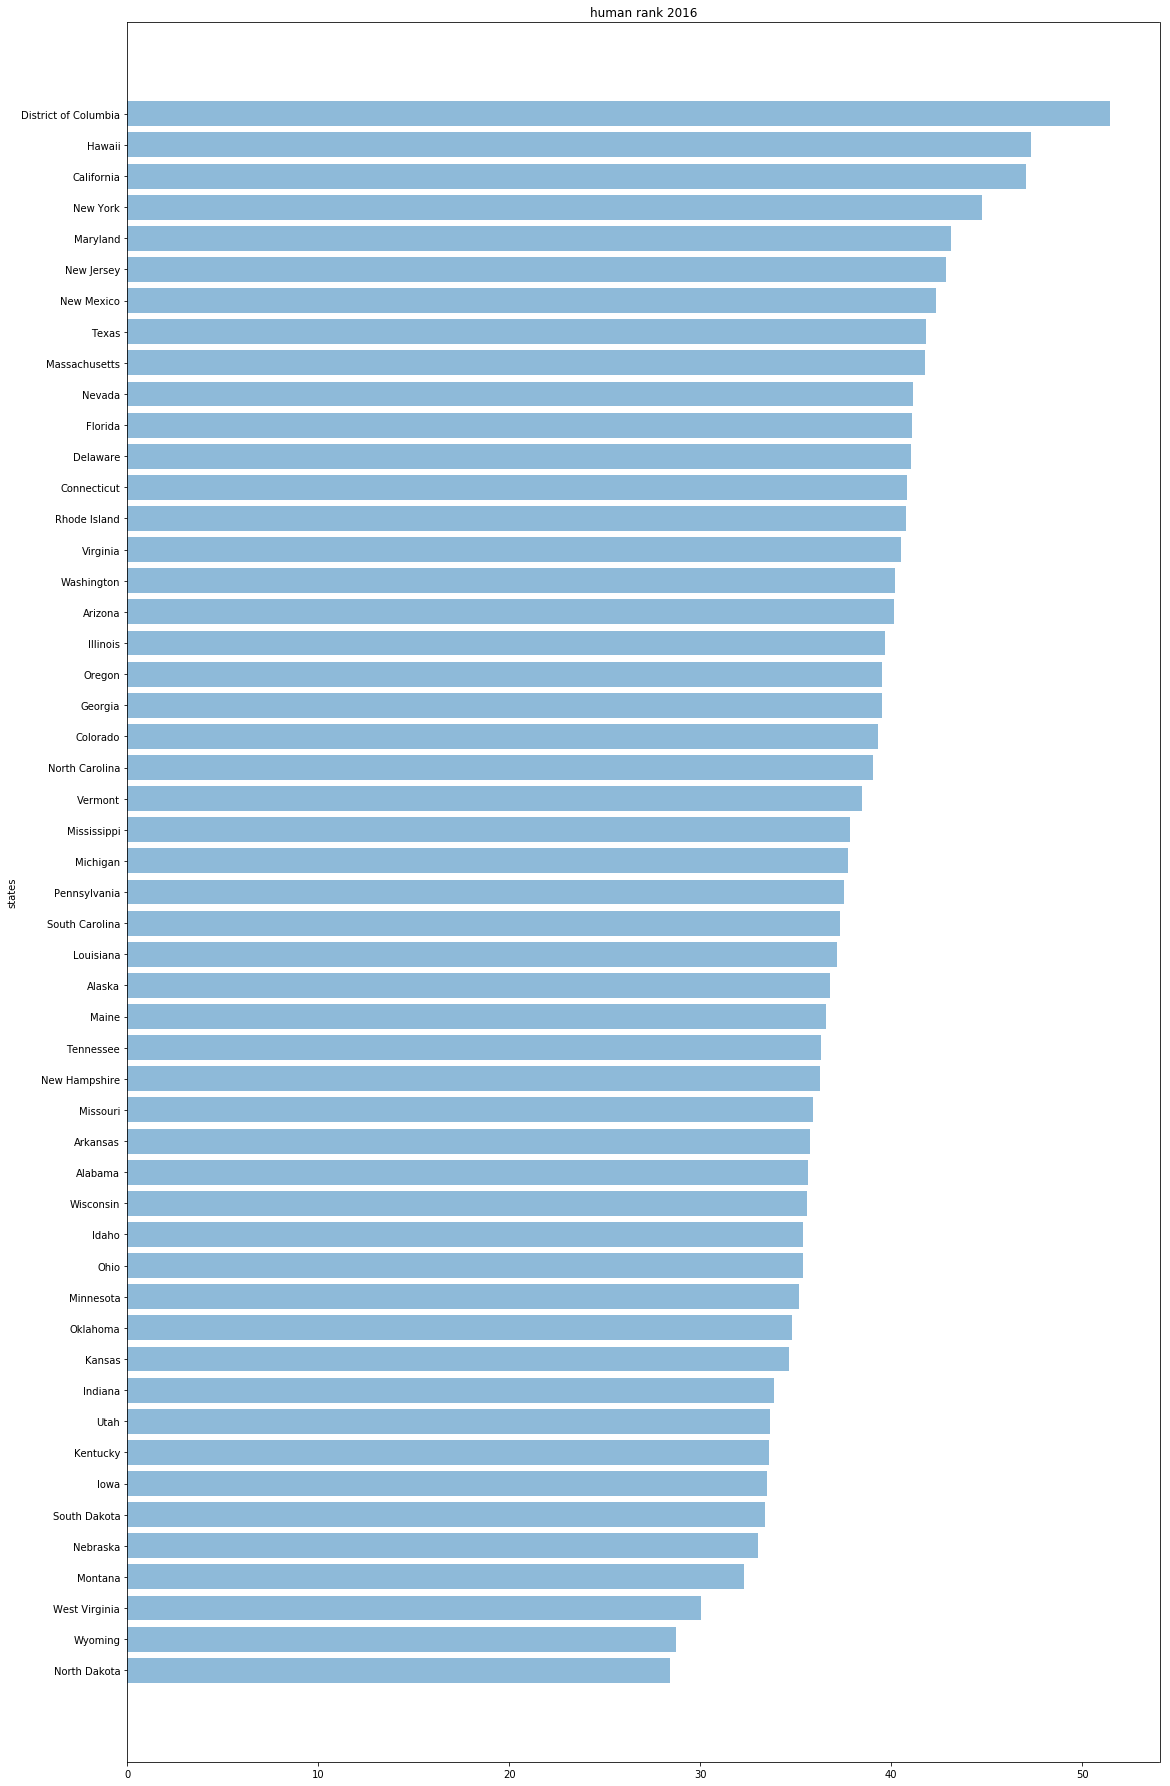

In [56]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a16sort_personal['GeoName']))

plt.barh(y_pos, df_a16sort_personal['personal'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a16sort_personal['GeoName'])
plt.ylabel('states')
plt.title('human rank 2016')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "CO2limits" 2016

In [57]:
df_a16sort_CO2limits = df_YCOM_2016_state.sort_values('CO2limits')
df_a16sort_CO2limits[['GeoName', 'CO2limits']].head(10)

GeoName  CO2limits
51        Wyoming     55.252
49  West Virginia     55.749
35   North Dakota     58.067
18       Kentucky     58.245
45           Utah     58.354
37       Oklahoma     61.548
43      Tennessee     61.871
15        Indiana     62.248
28       Nebraska     62.621
17         Kansas     62.802

In [58]:
df_a16sort_CO2limits[['GeoName', 'CO2limits']].tail(10)

GeoName  CO2limits
48            Washington     72.793
7            Connecticut     73.056
22         Massachusetts     73.522
5             California     73.740
14              Illinois     74.267
21              Maryland     75.136
31            New Jersey     78.132
33              New York     78.707
12                Hawaii     80.222
9   District of Columbia     84.652

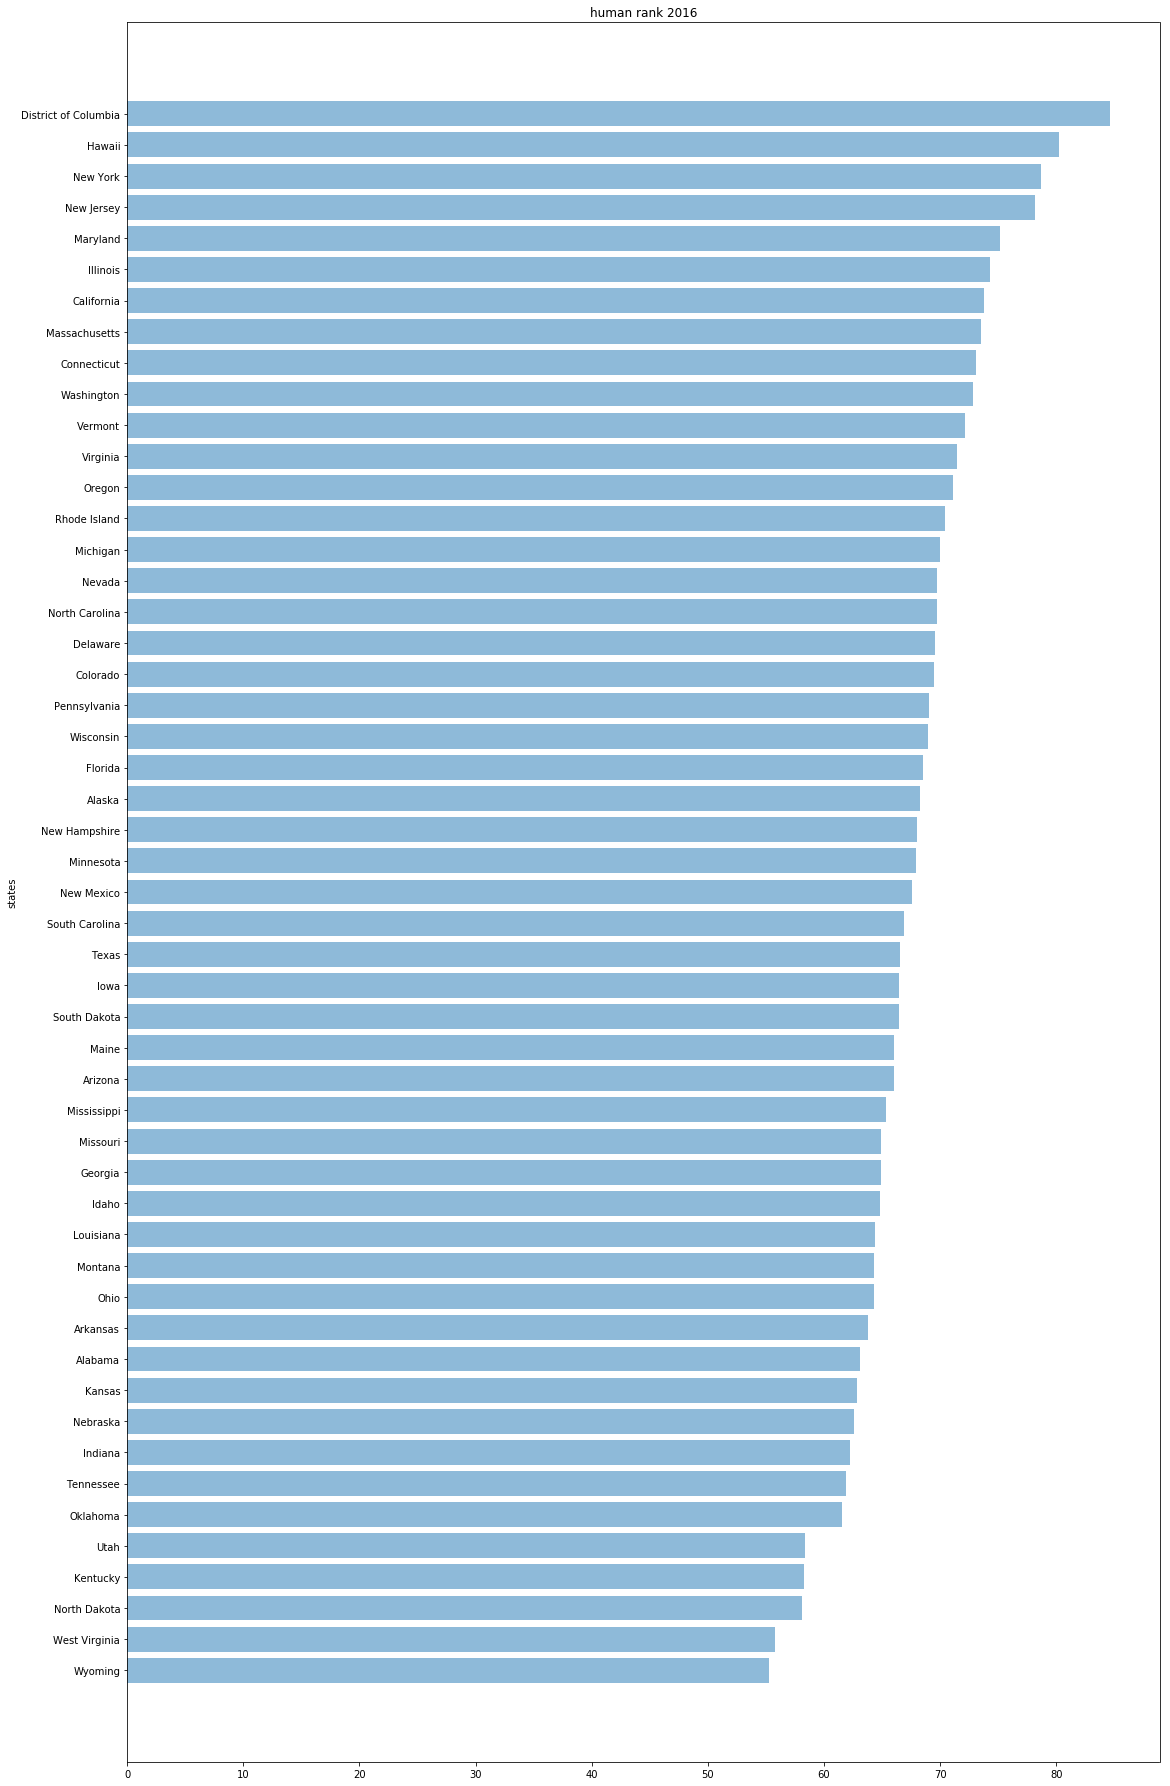

In [59]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a16sort_CO2limits['GeoName']))

plt.barh(y_pos, df_a16sort_CO2limits['CO2limits'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a16sort_CO2limits['GeoName'])
plt.ylabel('states')
plt.title('human rank 2016')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "regulate" 2016

In [60]:
df_a16sort_regulate = df_YCOM_2016_state.sort_values('regulate')
df_a16sort_regulate[['GeoName', 'regulate']].head(10)

GeoName  regulate
51        Wyoming    66.421
45           Utah    66.613
37       Oklahoma    68.476
49  West Virginia    68.690
35   North Dakota    69.251
18       Kentucky    69.808
1         Alabama    69.962
4        Arkansas    69.968
13          Idaho    70.049
17         Kansas    70.080

In [61]:
df_a16sort_regulate[['GeoName', 'regulate']].tail(10)

GeoName  regulate
40          Rhode Island    77.121
7            Connecticut    77.212
14              Illinois    77.768
21              Maryland    78.321
22         Massachusetts    78.481
46               Vermont    78.976
31            New Jersey    79.575
33              New York    80.606
12                Hawaii    81.075
9   District of Columbia    86.167

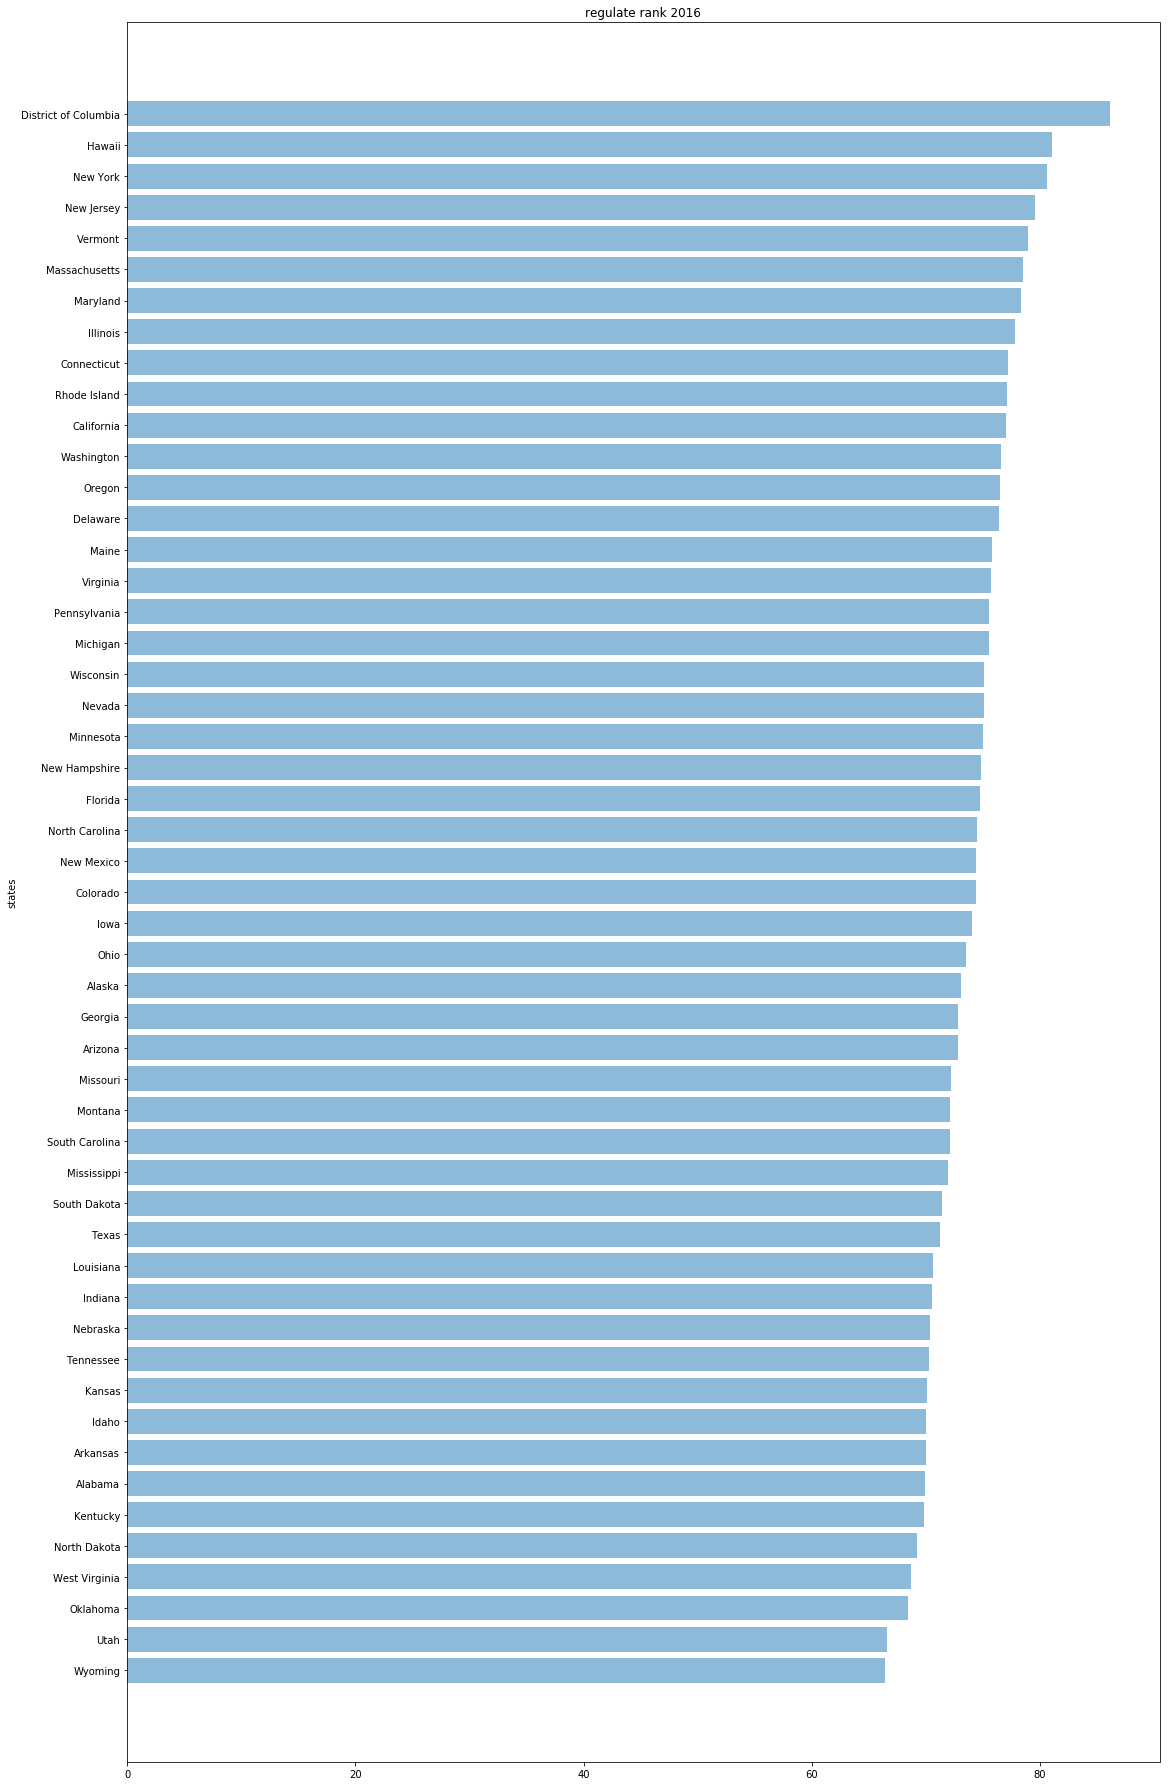

In [62]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a16sort_regulate['GeoName']))

plt.barh(y_pos, df_a16sort_regulate['regulate'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a16sort_regulate['GeoName'])
plt.ylabel('states')
plt.title('regulate rank 2016')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

#### The descending rank of "fundrenewable" 2016

In [63]:
df_a16sort_fundrenewables = df_YCOM_2016_state.sort_values('fundrenewables')
df_a16sort_fundrenewables[['GeoName', 'fundrenewables']].head(10)

GeoName  fundrenewables
37     Oklahoma          77.823
4      Arkansas          78.000
43    Tennessee          78.267
1       Alabama          78.627
19    Louisiana          78.716
44        Texas          79.033
18     Kentucky          79.128
45         Utah          79.349
25  Mississippi          79.595
13        Idaho          79.830

In [64]:
df_a16sort_fundrenewables[['GeoName', 'fundrenewables']].tail(10)

GeoName  fundrenewables
47              Virginia          83.679
16                  Iowa          83.906
7            Connecticut          84.096
22         Massachusetts          85.285
14              Illinois          85.456
33              New York          85.593
21              Maryland          85.811
46               Vermont          85.864
12                Hawaii          85.937
9   District of Columbia          90.270

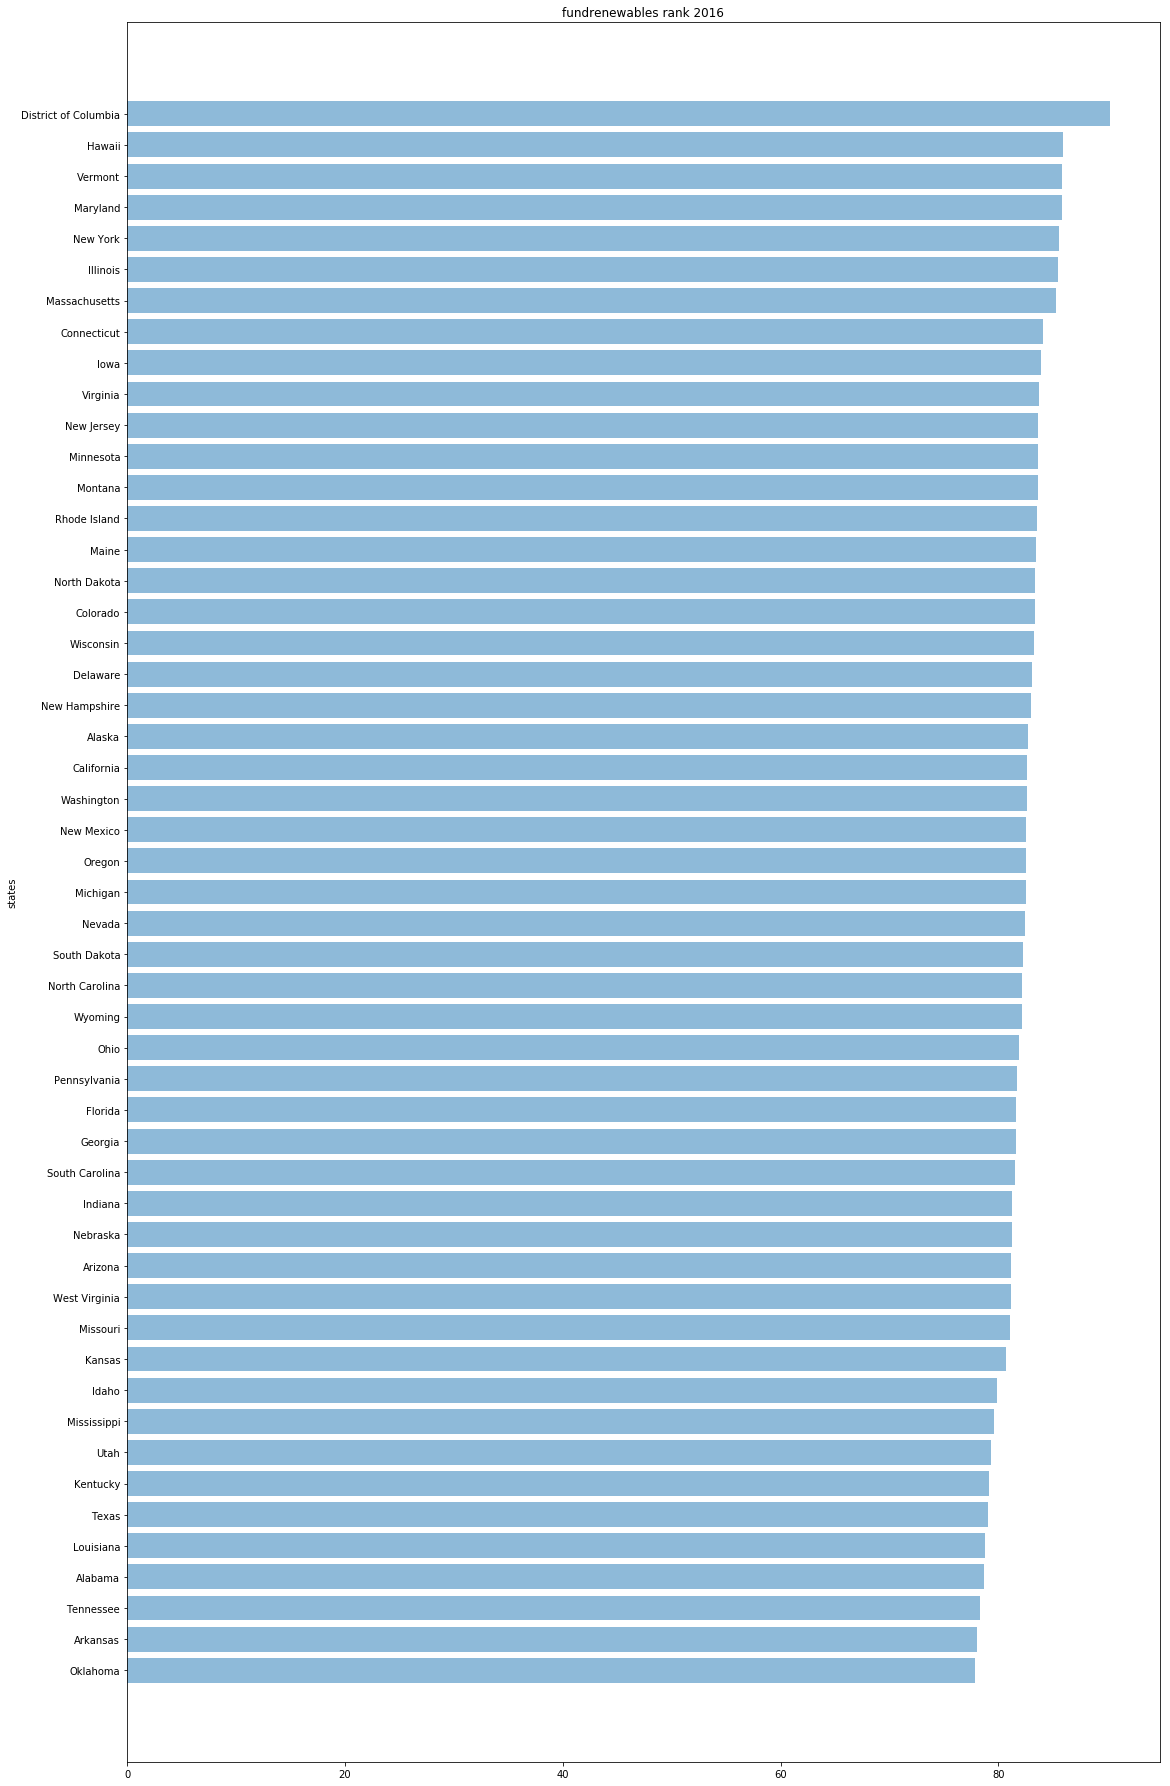

In [65]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
y_pos = np.arange(len(df_a16sort_fundrenewables['GeoName']))

plt.barh(y_pos, df_a16sort_fundrenewables['fundrenewables'], align='center', alpha=0.5)
plt.yticks(y_pos, df_a16sort_fundrenewables['GeoName'])
plt.ylabel('states')
plt.title('fundrenewables rank 2016')
fig = plt.gcf()
fig.set_size_inches(18.5, 32)
plt.show()

## Find the correlation between each awareness variable and carbon dioxide emission quantity in each state

### Merge the carbon dioxide emission data and awareness vaiebles data by state in 2014

In [66]:
df_YPCCC_2014_State_renamed = df_YPCCC_2014_State_new.rename(columns = {'Statename': 'State'})
State_Awareness_CO2 = pd.merge(df_YPCCC_2014_State_renamed, df_CO2_state_keep, on='State')
State_Awareness_CO2

State  TotalPop  happening  human  worried  personal  \
0                 Alaska    447543         62     45       48        29   
1                Alabama   3166424         56     43       46        31   
2               Arkansas   1921039         57     44       47        31   
3                Arizona   4149955         64     49       54        38   
4             California  24117317         70     55       62        42   
5               Colorado   3328869         66     50       55        36   
6            Connecticut   2431340         66     51       56        37   
7   District of Columbia    417432         81     61       71        47   
8               Delaware    603331         65     50       55        36   
9                Florida  13127624         64     50       54        38   
10               Georgia   6242508         63     48       52        36   
11                Hawaii    928132         75     58       66        43   
12                  Iowa   2013629         60     47       50        31   
13                 Idaho    986172         58     44       48        32   
14              Illinois   8459947         67     51       56        36   
15               Indiana   4229138         58     46       46        30   
16                Kansas   1838079         58     45       48        31   
17              Kentucky   2902296         56     44       46        30   
18             Louisiana   2940298         57     44       46        31   
19         Massachusetts   4465898         69     52       58        37   
20              Maryland   3875282         68     52       58        38   
21                 Maine    938624         64     49       53        34   
22              Michigan   6578519         61     48       51        33   
23             Minnesota   3525850         63     48       52        32   
24              Missouri   3973614         60     46       50        32   
25           Mississippi   1904849         59     45       50        35   
26               Montana    671337         60     46       48        29   
27        North Carolina   6324119         62     48       52        35   
28          North Dakota    442789         56     43       43        24   
29              Nebraska   1184668         58     45       48        30   
30         New Hampshire    907338         61     48       51        32   
31            New Jersey   5969516         68     52       59        38   
32            New Mexico   1333926         66     52       56        38   
33                Nevada   1791029         64     50       55        37   
34              New York  13101982         72     54       63        40   
35                  Ohio   7715893         59     47       48        32   
36              Oklahoma   2438321         57     44       46        32   
37                Oregon   2612044         67     51       57        36   
38          Pennsylvania   8658872         62     48       53        33   
39          Rhode Island    709683         66     51       56        36   
40        South Carolina   3075655         59     45       49        33   
41          South Dakota    531773         59     46       50        31   
42             Tennessee   4250890         58     45       48        33   
43                 Texas  15765048         63     49       54        38   
44                  Utah   1578143         60     45       48        32   
45              Virginia   5356571         64     49       54        35   
46               Vermont    431581         68     52       57        35   
47            Washington   4507469         68     51       58        37   
48             Wisconsin   3800291         61     48       50        32   
49         West Virginia   1292274         54     43       42        25   
50               Wyoming    371096         55     42       41        25   

    CO2limits  regulate  fundrenewables        2012        2014        2016  
0          48        67              76 

In [67]:
list(State_Awareness_CO2.columns)

['State',
 'TotalPop',
 'happening',
 'human',
 'worried',
 'personal',
 'CO2limits',
 'regulate',
 'fundrenewables',
 2012,
 2014,
 2016]

In [68]:
columns2014 = ['State','TotalPop','happening','human','worried','personal','CO2limits','regulate',
               'fundrenewables', 2014]
State_Awareness_CO2_2014 = State_Awareness_CO2[columns2014]
State_Awareness_CO2_2014 = State_Awareness_CO2_2014.rename(index = str, columns = {2014: "twothousandfourteen"})
State_Awareness_CO2_2014

State  TotalPop  happening  human  worried  personal  \
0                 Alaska    447543         62     45       48        29   
1                Alabama   3166424         56     43       46        31   
2               Arkansas   1921039         57     44       47        31   
3                Arizona   4149955         64     49       54        38   
4             California  24117317         70     55       62        42   
5               Colorado   3328869         66     50       55        36   
6            Connecticut   2431340         66     51       56        37   
7   District of Columbia    417432         81     61       71        47   
8               Delaware    603331         65     50       55        36   
9                Florida  13127624         64     50       54        38   
10               Georgia   6242508         63     48       52        36   
11                Hawaii    928132         75     58       66        43   
12                  Iowa   2013629         60     47       50        31   
13                 Idaho    986172         58     44       48        32   
14              Illinois   8459947         67     51       56        36   
15               Indiana   4229138         58     46       46        30   
16                Kansas   1838079         58     45       48        31   
17              Kentucky   2902296         56     44       46        30   
18             Louisiana   2940298         57     44       46        31   
19         Massachusetts   4465898         69     52       58        37   
20              Maryland   3875282         68     52       58        38   
21                 Maine    938624         64     49       53        34   
22              Michigan   6578519         61     48       51        33   
23             Minnesota   3525850         63     48       52        32   
24              Missouri   3973614         60     46       50        32   
25           Mississippi   1904849         59     45       50        35   
26               Montana    671337         60     46       48        29   
27        North Carolina   6324119         62     48       52        35   
28          North Dakota    442789         56     43       43        24   
29              Nebraska   1184668         58     45       48        30   
30         New Hampshire    907338         61     48       51        32   
31            New Jersey   5969516         68     52       59        38   
32            New Mexico   1333926         66     52       56        38   
33                Nevada   1791029         64     50       55        37   
34              New York  13101982         72     54       63        40   
35                  Ohio   7715893         59     47       48        32   
36              Oklahoma   2438321         57     44       46        32   
37                Oregon   2612044         67     51       57        36   
38          Pennsylvania   8658872         62     48       53        33   
39          Rhode Island    709683         66     51       56        36   
40        South Carolina   3075655         59     45       49        33   
41          South Dakota    531773         59     46       50        31   
42             Tennessee   4250890         58     45       48        33   
43                 Texas  15765048         63     49       54        38   
44                  Utah   1578143         60     45       48        32   
45              Virginia   5356571         64     49       54        35   
46               Vermont    431581         68     52       57        35   
47            Washington   4507469         68     51       58        37   
48             Wisconsin   3800291         61     48       50        32   
49         West Virginia   1292274         54     43       42        25   
50               Wyoming    371096         55     42       41        25   

    CO2limits  regulate  fundrenewables  twothousandfourteen  
0          48        67              76            35.7

### Merge the carbon dioxide emission data and awareness vaiebles data by state in 2016

In [69]:
df_YCOM_2016_State_renamed = df_YCOM_2016_state.rename(columns = {'GeoName': 'State'})
State_Awareness_CO2_2016 = pd.merge(df_YCOM_2016_State_renamed, df_CO2_state_keep, on='State')
State_Awareness_CO2_2016

State  happening   human  worried  personal  CO2limits  \
0                Alabama     63.450  47.603   50.584    35.646     63.122   
1                 Alaska     69.588  48.562   55.695    36.780     68.231   
2                Arizona     68.827  50.661   56.186    40.135     66.001   
3               Arkansas     64.120  47.318   51.360    35.748     63.744   
4             California     75.241  59.035   65.256    47.059     73.740   
5               Colorado     71.004  53.143   58.291    39.322     69.434   
6            Connecticut     71.904  56.503   61.396    40.810     73.056   
7               Delaware     70.691  55.080   57.848    41.023     69.576   
8   District of Columbia     84.364  66.792   74.292    51.474     84.652   
9                Florida     70.047  52.608   56.594    41.069     68.481   
10               Georgia     67.744  50.565   54.666    39.505     64.886   
11                Hawaii     78.490  61.622   69.168    47.317     80.222   
12                 Idaho     64.889  46.844   52.254    35.374     64.861   
13              Illinois     72.649  55.534   59.809    39.689     74.267   
14               Indiana     64.138  48.545   49.340    33.877     62.248   
15                  Iowa     66.872  51.706   54.680    33.480     66.472   
16                Kansas     65.328  48.464   52.132    34.632     62.802   
17              Kentucky     62.392  45.918   48.179    33.618     58.245   
18             Louisiana     65.452  48.529   53.423    37.164     64.391   
19                 Maine     69.178  52.548   55.915    36.586     66.052   
20              Maryland     75.139  57.944   63.227    43.110     75.136   
21         Massachusetts     73.947  55.928   61.777    41.766     73.522   
22              Michigan     68.353  53.897   55.587    37.713     69.942   
23             Minnesota     68.931  52.050   55.586    35.150     67.924   
24           Mississippi     65.657  49.634   53.549    37.840     65.301   
25              Missouri     66.107  49.443   52.948    35.915     64.890   
26               Montana     66.106  47.858   52.526    32.298     64.333   
27              Nebraska     64.448  47.554   51.052    33.037     62.621   
28                Nevada     70.286  53.868   59.006    41.120     69.729   
29         New Hampshire     68.292  52.670   55.842    36.247     67.991   
30            New Jersey     75.110  57.442   64.546    42.882     78.132   
31            New Mexico     70.893  55.117   60.015    42.356     67.538   
32              New York     77.018  57.575   67.241    44.748     78.707   
33        North Carolina     68.932  52.180   55.709    39.052     69.689   
34          North Dakota     62.190  45.712   48.429    28.443     58.067   
35                  Ohio     66.772  52.019   53.144    35.359     64.263   
36              Oklahoma     63.127  45.989   49.885    34.798     61.548   
37                Oregon     72.137  53.786   59.386    39.543     71.099   
38          Pennsylvania     68.996  52.608   57.636    37.529     69.020   
39          Rhode Island     71.347  56.514   60.136    40.787     70.426   
40        South Carolina     66.856  50.341   53.957    37.331     66.876   
41          South Dakota     65.227  48.620   53.060    33.389     66.427   
42             Tennessee     64.144  48.149   51.170    36.346     61.871   
43                 Texas     68.907  51.626   57.163    41.836     66.557   
44                  Utah     63.071  42.528   47.887    33.648     58.354   
45               Vermont     72.692  56.765   60.665    38.488     72.135   
46              Virginia     71.148  54.106   58.619    40.524     71.459   
47            Washington     72.632  54.714   59.993    40.185     72.793   
48         West Virginia     60.476  44.072   45.324    30.052     55.749   
49             Wisconsin     68.125  52.500   54.059    35.587     68.986   
50               Wyoming     60.921  41.971   46.189    28.734     55.252   

    regulate  

In [70]:
list(State_Awareness_CO2_2016.columns)

['State',
 'happening',
 'human',
 'worried',
 'personal',
 'CO2limits',
 'regulate',
 'fundrenewables',
 2012,
 2014,
 2016]

In [71]:
State_Awareness_CO2_2016col = ['State','happening','human','worried','personal','CO2limits','regulate',
                               'fundrenewables', 2016]
State_Awareness_CO2_2016 = State_Awareness_CO2_2016[State_Awareness_CO2_2016col]
State_Awareness_CO2_2016 = State_Awareness_CO2_2016.rename(index = str, columns = {2016: "twothousandsixteen"})
State_Awareness_CO2_2016

State  happening   human  worried  personal  CO2limits  \
0                Alabama     63.450  47.603   50.584    35.646     63.122   
1                 Alaska     69.588  48.562   55.695    36.780     68.231   
2                Arizona     68.827  50.661   56.186    40.135     66.001   
3               Arkansas     64.120  47.318   51.360    35.748     63.744   
4             California     75.241  59.035   65.256    47.059     73.740   
5               Colorado     71.004  53.143   58.291    39.322     69.434   
6            Connecticut     71.904  56.503   61.396    40.810     73.056   
7               Delaware     70.691  55.080   57.848    41.023     69.576   
8   District of Columbia     84.364  66.792   74.292    51.474     84.652   
9                Florida     70.047  52.608   56.594    41.069     68.481   
10               Georgia     67.744  50.565   54.666    39.505     64.886   
11                Hawaii     78.490  61.622   69.168    47.317     80.222   
12                 Idaho     64.889  46.844   52.254    35.374     64.861   
13              Illinois     72.649  55.534   59.809    39.689     74.267   
14               Indiana     64.138  48.545   49.340    33.877     62.248   
15                  Iowa     66.872  51.706   54.680    33.480     66.472   
16                Kansas     65.328  48.464   52.132    34.632     62.802   
17              Kentucky     62.392  45.918   48.179    33.618     58.245   
18             Louisiana     65.452  48.529   53.423    37.164     64.391   
19                 Maine     69.178  52.548   55.915    36.586     66.052   
20              Maryland     75.139  57.944   63.227    43.110     75.136   
21         Massachusetts     73.947  55.928   61.777    41.766     73.522   
22              Michigan     68.353  53.897   55.587    37.713     69.942   
23             Minnesota     68.931  52.050   55.586    35.150     67.924   
24           Mississippi     65.657  49.634   53.549    37.840     65.301   
25              Missouri     66.107  49.443   52.948    35.915     64.890   
26               Montana     66.106  47.858   52.526    32.298     64.333   
27              Nebraska     64.448  47.554   51.052    33.037     62.621   
28                Nevada     70.286  53.868   59.006    41.120     69.729   
29         New Hampshire     68.292  52.670   55.842    36.247     67.991   
30            New Jersey     75.110  57.442   64.546    42.882     78.132   
31            New Mexico     70.893  55.117   60.015    42.356     67.538   
32              New York     77.018  57.575   67.241    44.748     78.707   
33        North Carolina     68.932  52.180   55.709    39.052     69.689   
34          North Dakota     62.190  45.712   48.429    28.443     58.067   
35                  Ohio     66.772  52.019   53.144    35.359     64.263   
36              Oklahoma     63.127  45.989   49.885    34.798     61.548   
37                Oregon     72.137  53.786   59.386    39.543     71.099   
38          Pennsylvania     68.996  52.608   57.636    37.529     69.020   
39          Rhode Island     71.347  56.514   60.136    40.787     70.426   
40        South Carolina     66.856  50.341   53.957    37.331     66.876   
41          South Dakota     65.227  48.620   53.060    33.389     66.427   
42             Tennessee     64.144  48.149   51.170    36.346     61.871   
43                 Texas     68.907  51.626   57.163    41.836     66.557   
44                  Utah     63.071  42.528   47.887    33.648     58.354   
45               Vermont     72.692  56.765   60.665    38.488     72.135   
46              Virginia     71.148  54.106   58.619    40.524     71.459   
47            Washington     72.632  54.714   59.993    40.185     72.793   
48         West Virginia     60.476  44.072   45.324    30.052     55.749   
49             Wisconsin     68.125  52.500   54.059    35.587     68.986   
50               Wyoming     60.921  41.971   46.189    28.734     55.252   

    regulate  

## Correlations

## Correlation of awareness variables and  carbon dioxide emission in 2014

The correlation of each awareness data variable witht the carbon dioxide emission in 2014

In [72]:
corrs_2014 = State_Awareness_CO2_2014.corr()
corrs_2014[['twothousandfourteen']]

twothousandfourteen
TotalPop                        0.822288
happening                      -0.054149
human                           0.003872
worried                        -0.003218
personal                        0.126693
CO2limits                      -0.049631
regulate                       -0.060083
fundrenewables                 -0.197974
twothousandfourteen             1.000000

### Visualizing the correlation in 2014
1. A scatter point of the correlation between "the awareness of whether climate change is happening" and "the carbon dioxide emission" in 2014 

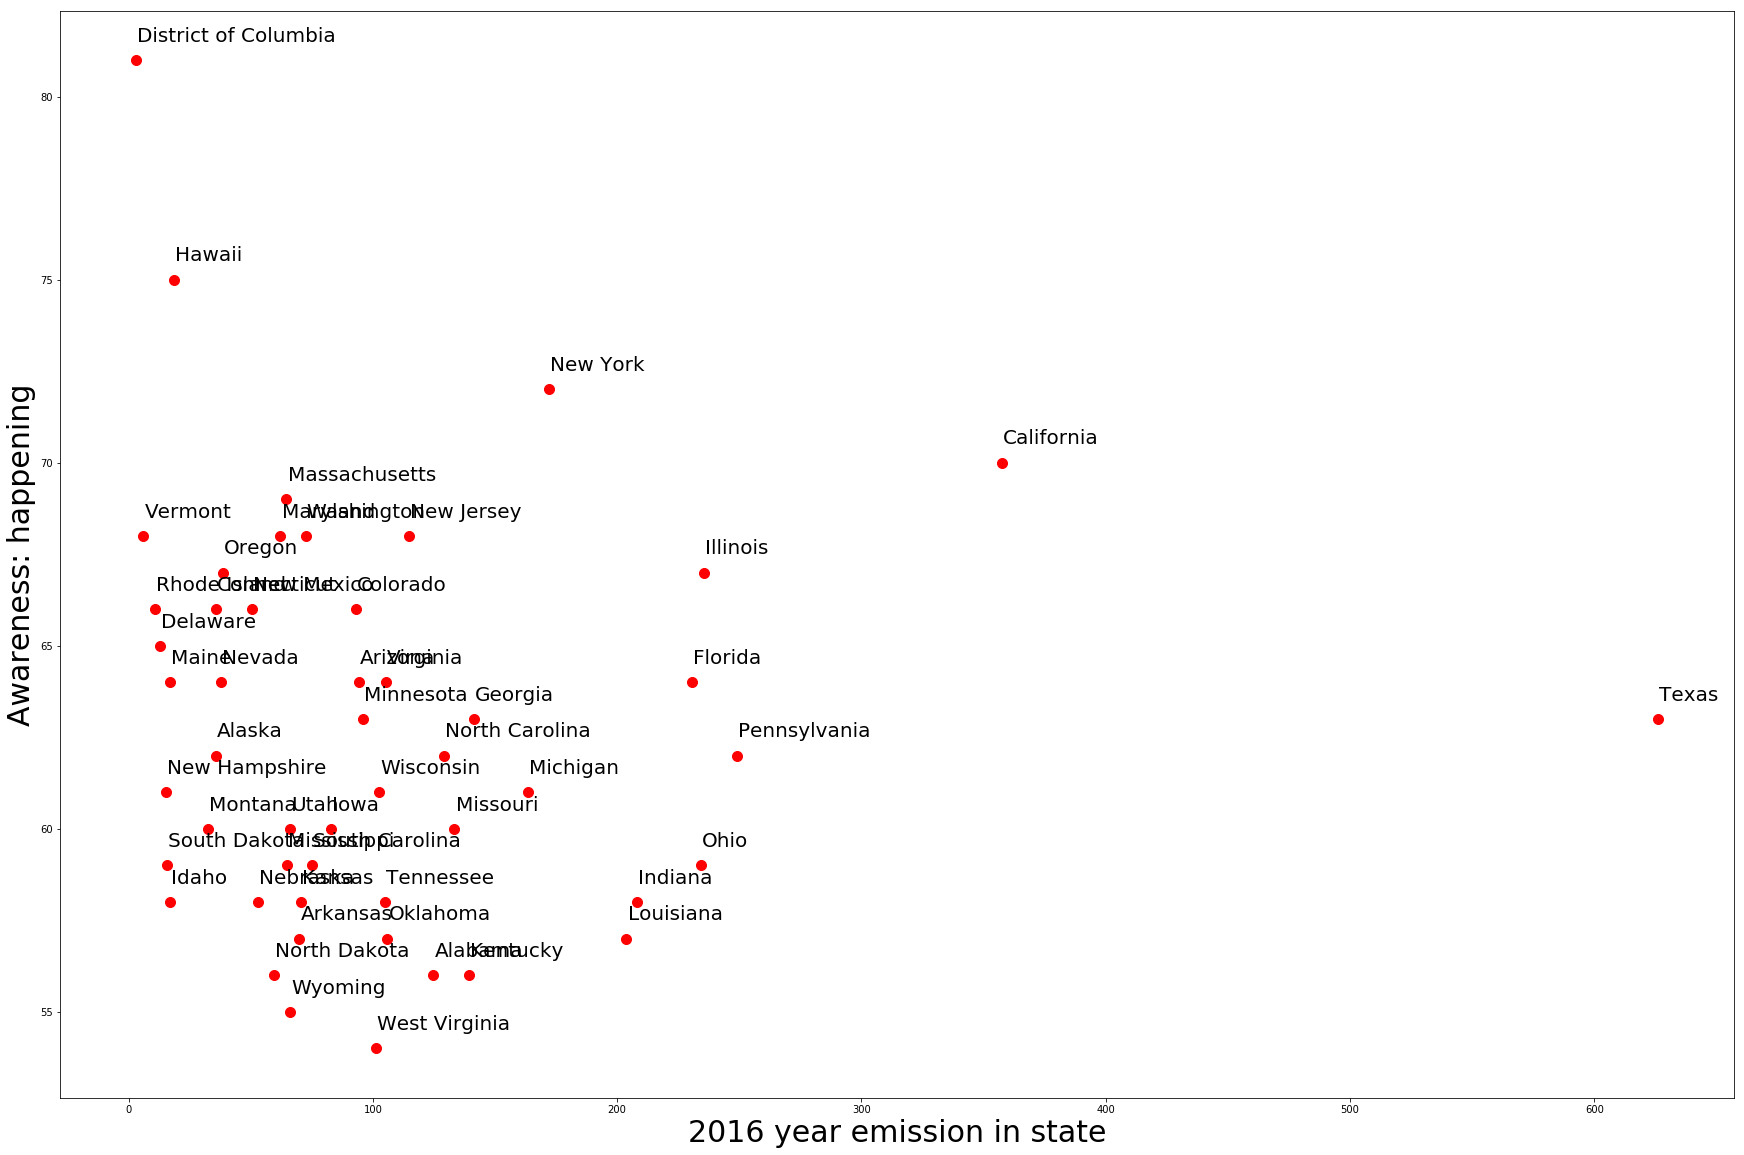

In [73]:
x = State_Awareness_CO2_2014['twothousandfourteen']
y = State_Awareness_CO2_2014['happening']
types = State_Awareness_CO2_2014['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: happening', fontsize = 30)

## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

2. A scatter point of the correlation between "the awareness of whether human causeses climate change " and "the carbon dioxide emission" in 2014 

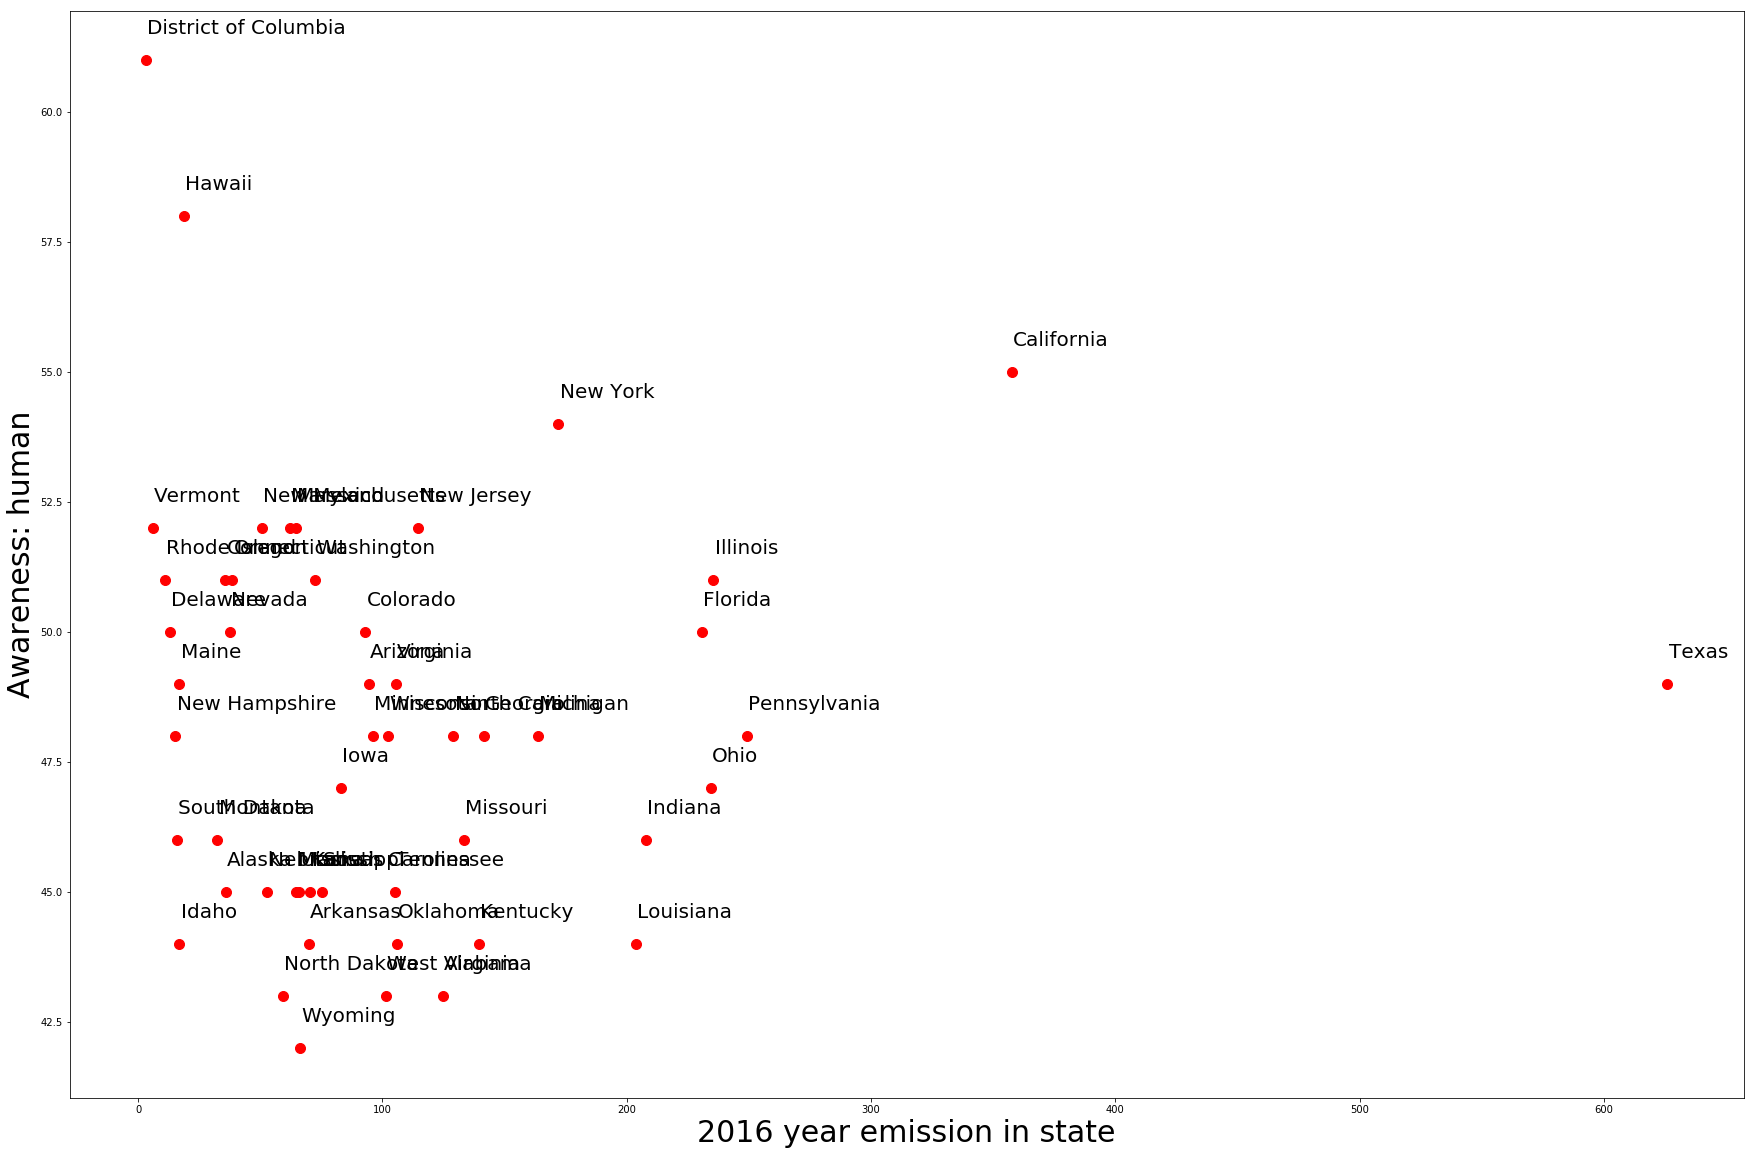

In [74]:
x = State_Awareness_CO2_2014['twothousandfourteen']
y = State_Awareness_CO2_2014['human']
types = State_Awareness_CO2_2014['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: human', fontsize = 30)

## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

3. A scatter point of the correlation between "the awareness of whether people worry about climate change" and "the carbon dioxide emission" in 2014 

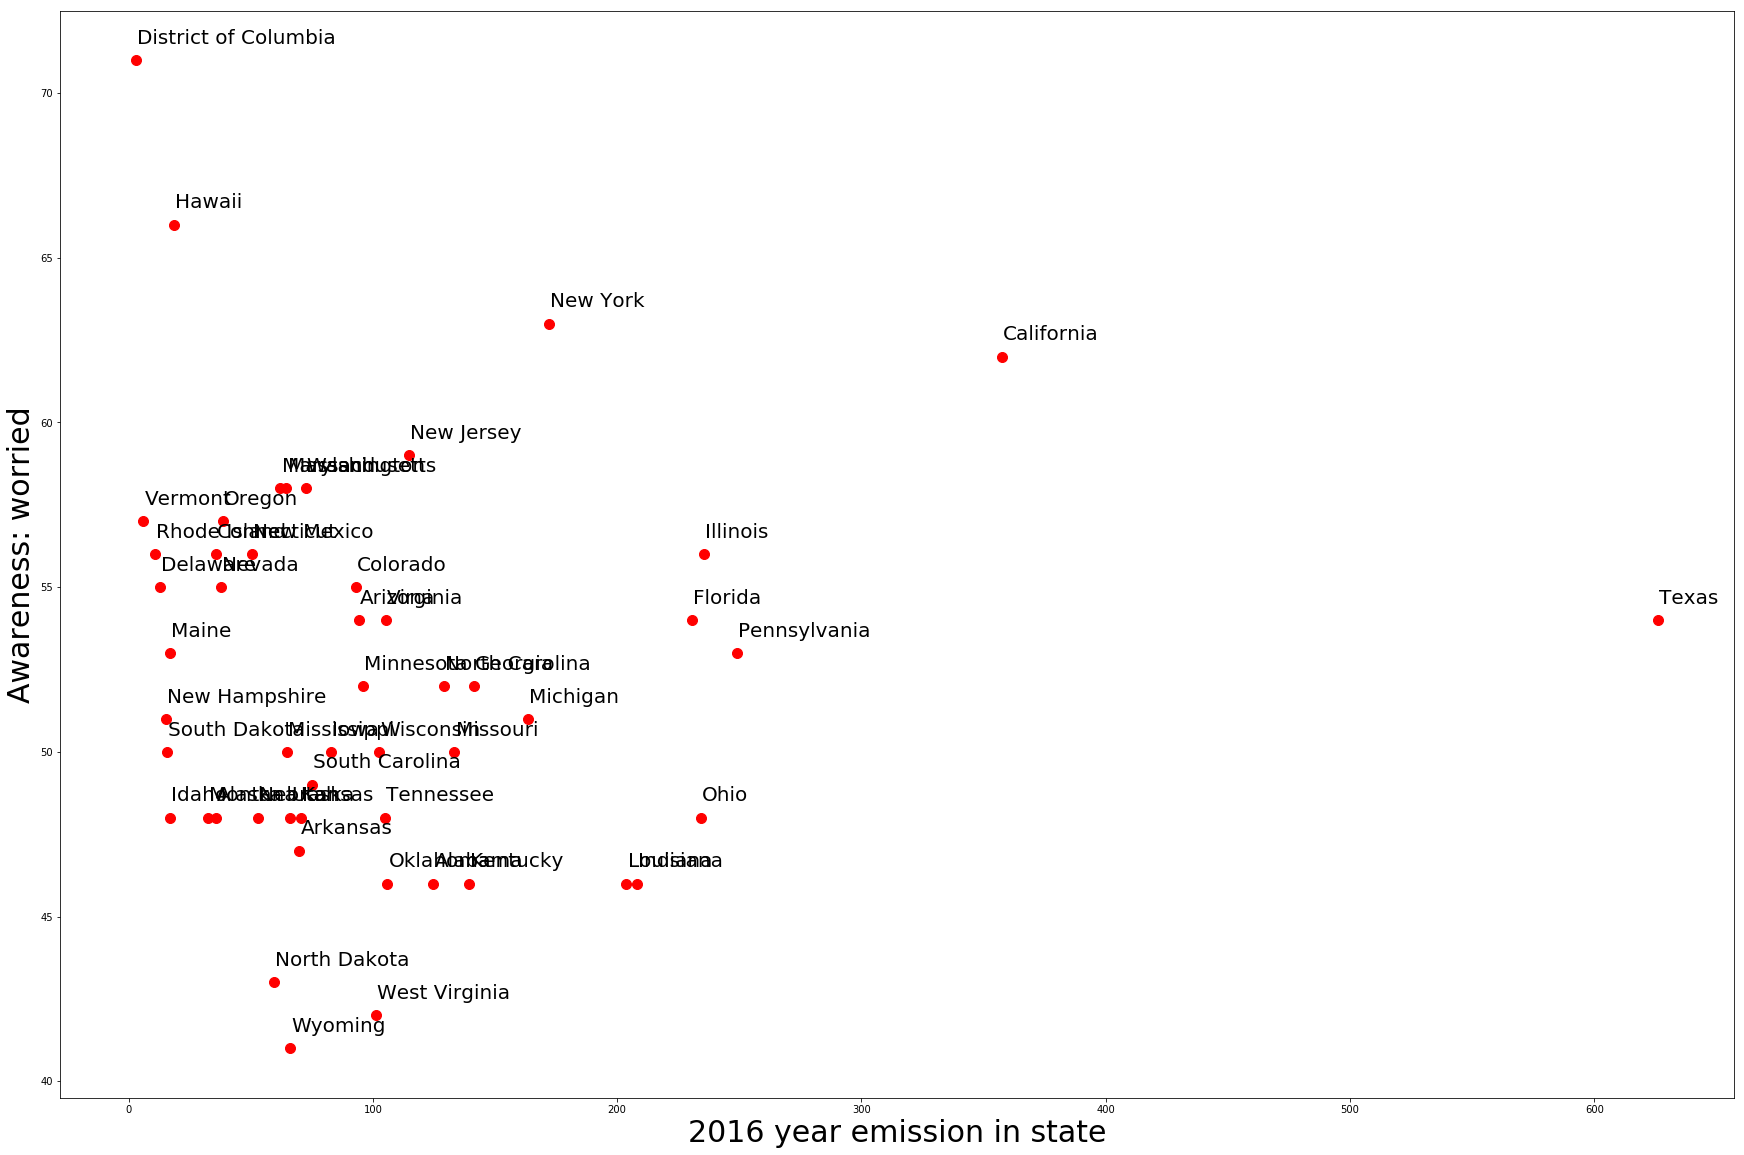

In [75]:
x = State_Awareness_CO2_2014['twothousandfourteen']
y = State_Awareness_CO2_2014['worried']
types = State_Awareness_CO2_2014['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: worried', fontsize = 30)

## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

4. A scatter point of the correlation between "the awareness of whether ???? " and "the carbon dioxide emission" in 2014 
(to be finished)

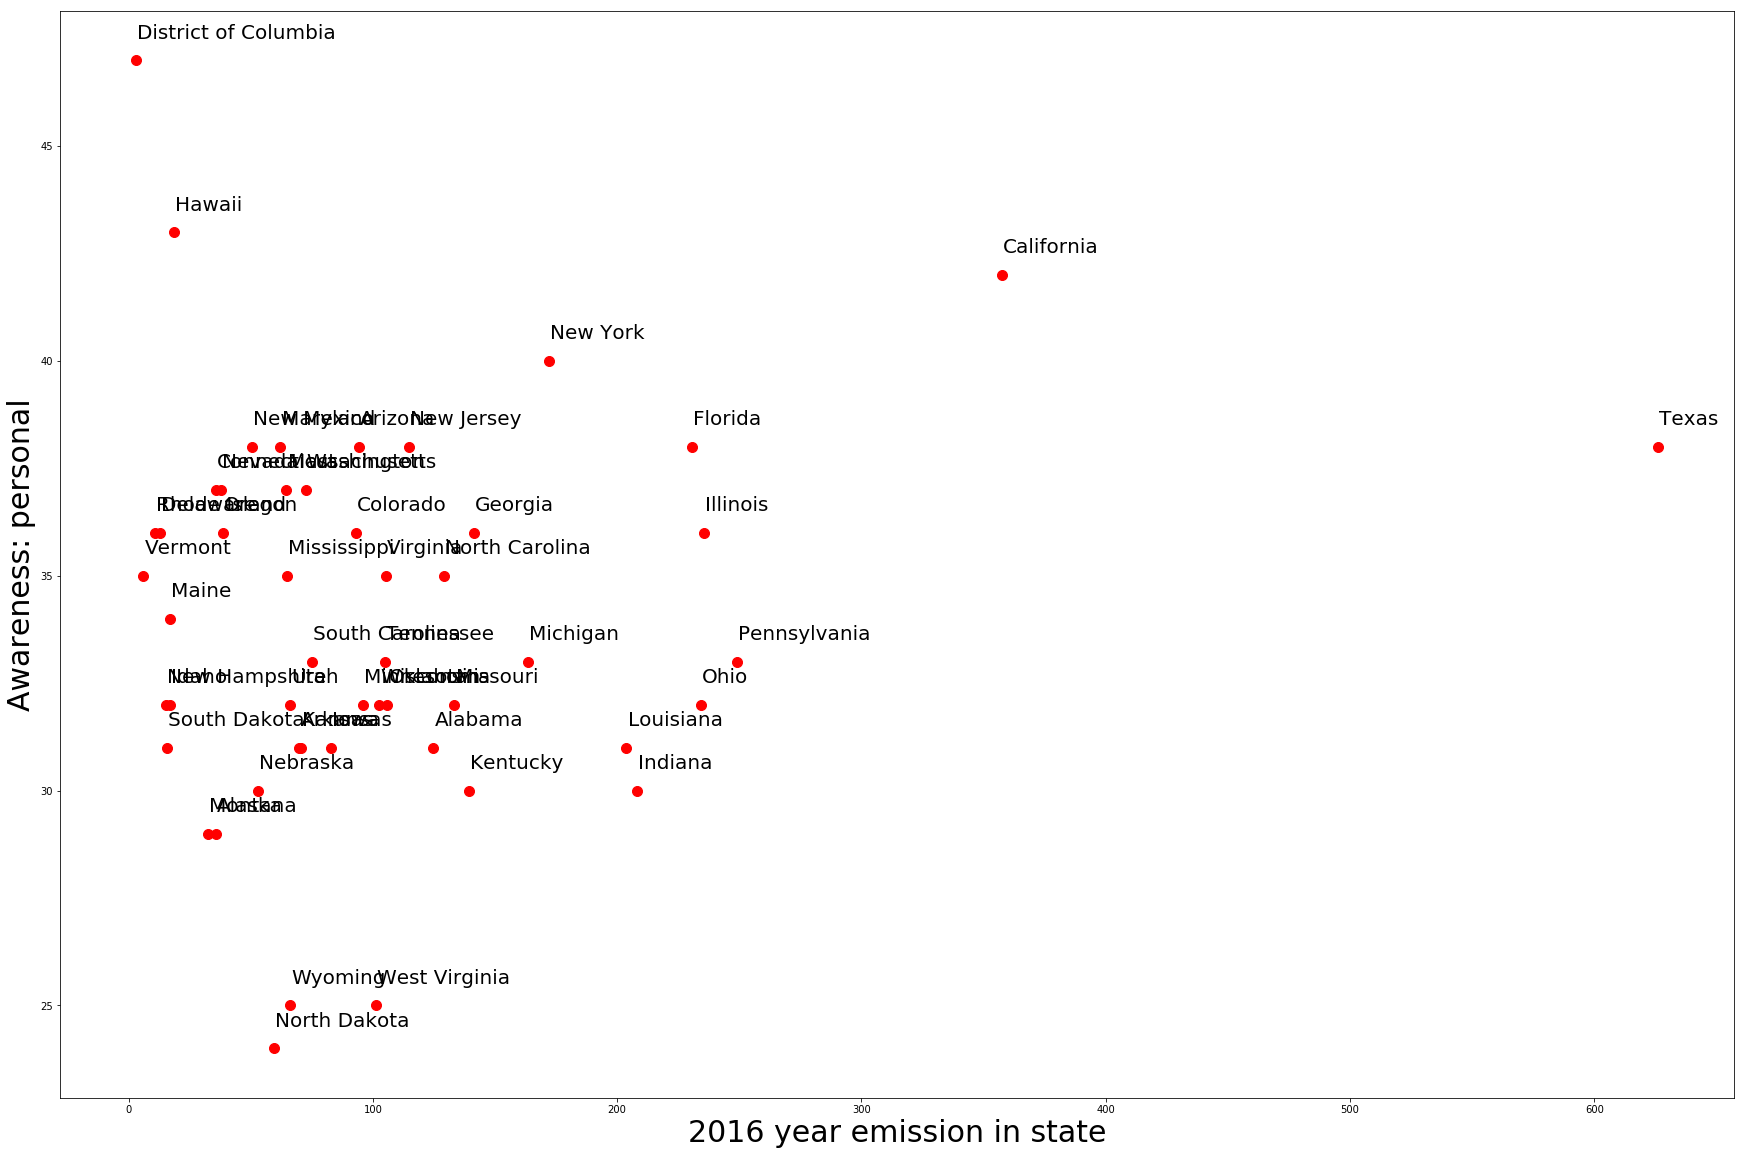

In [76]:
x = State_Awareness_CO2_2014['twothousandfourteen']
y = State_Awareness_CO2_2014['personal']
types = State_Awareness_CO2_2014['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: personal', fontsize = 30)

## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

5. A scatter point of the correlation between "the awareness of whether we should limit the carbon dioxide emission " and "the carbon dioxide emission" in 2014 
(to be confrim)

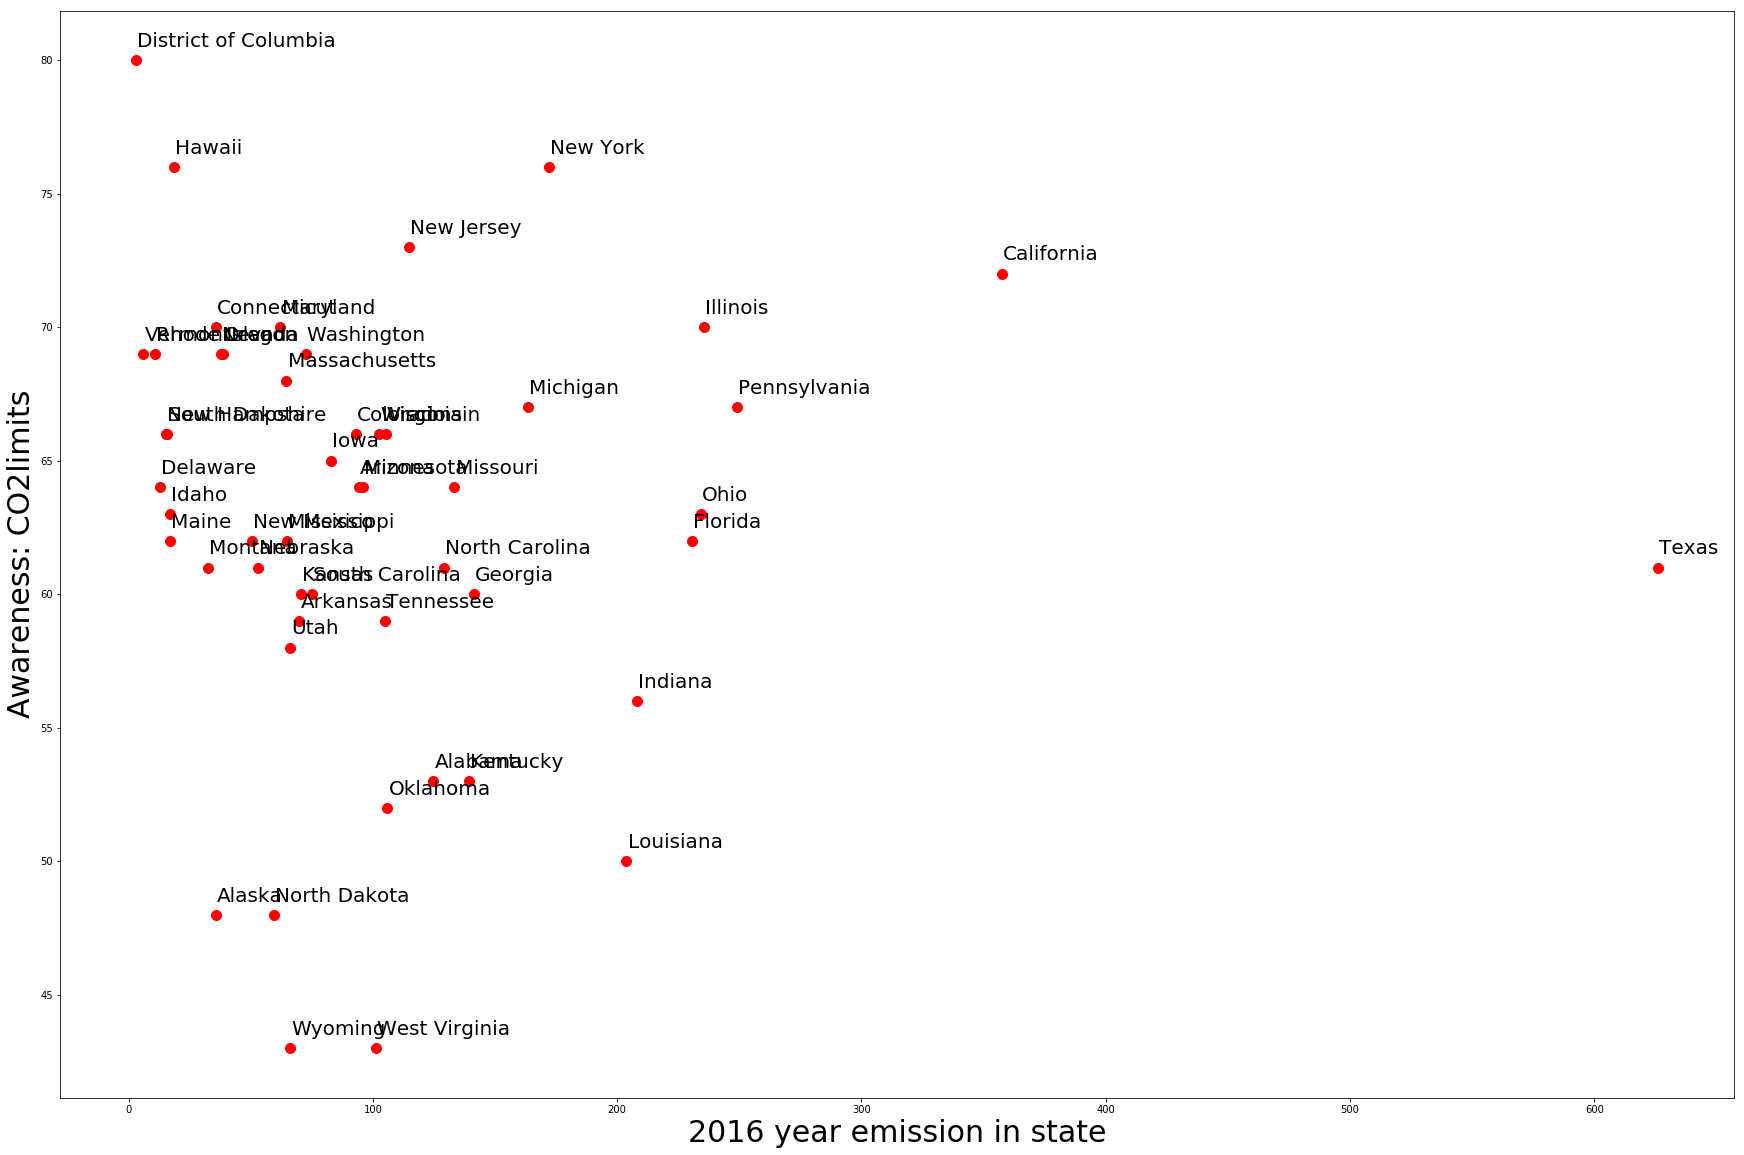

In [77]:
x = State_Awareness_CO2_2014['twothousandfourteen']
y = State_Awareness_CO2_2014['CO2limits']
types = State_Awareness_CO2_2014['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: CO2limits', fontsize = 30)

## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

6. A scatter point of the correlation between "the awareness of whether we should regulate the carbon emission" and "the carbon dioxide emission" in 2014 

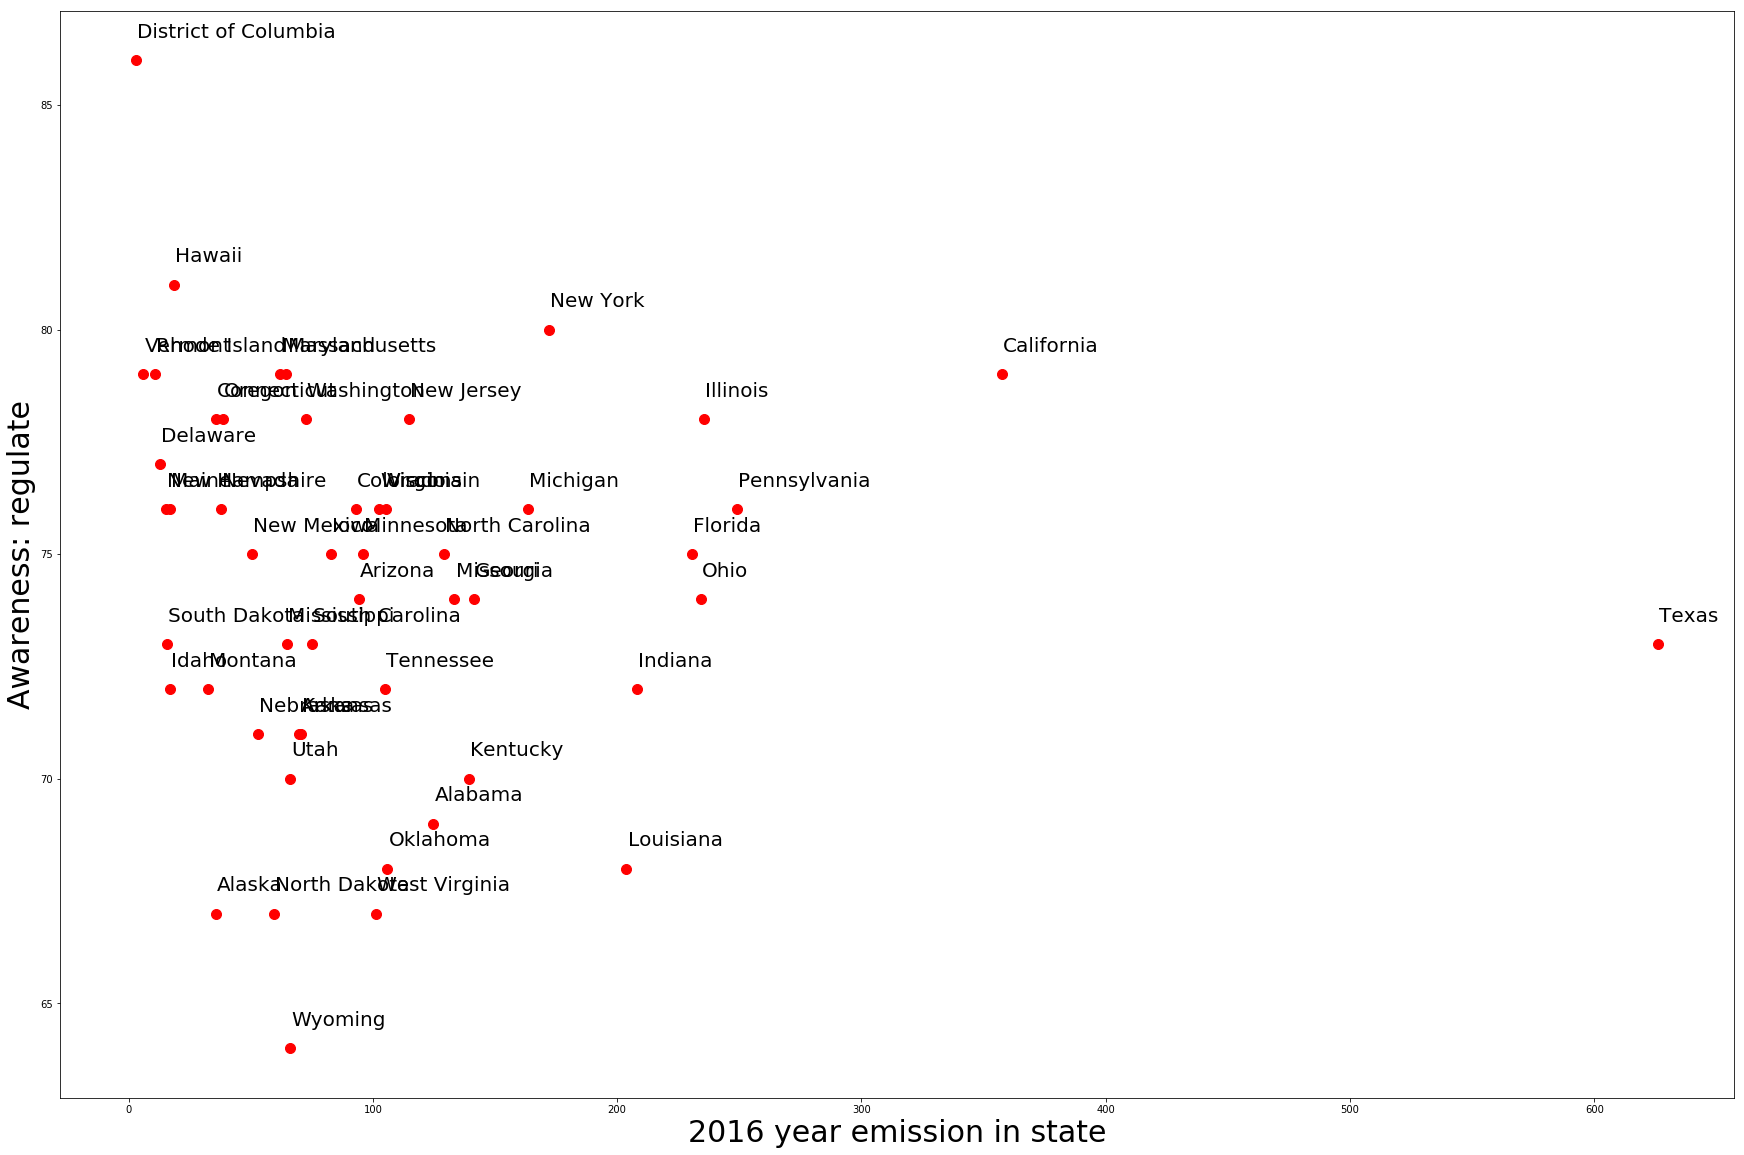

In [78]:
x = State_Awareness_CO2_2014['twothousandfourteen']
y = State_Awareness_CO2_2014['regulate']
types = State_Awareness_CO2_2014['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: regulate', fontsize = 30)

## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

7. A scatter point of the correlation between "the awareness of whether we should fund renewable resources" and "the carbon dioxide emission" in 2014 

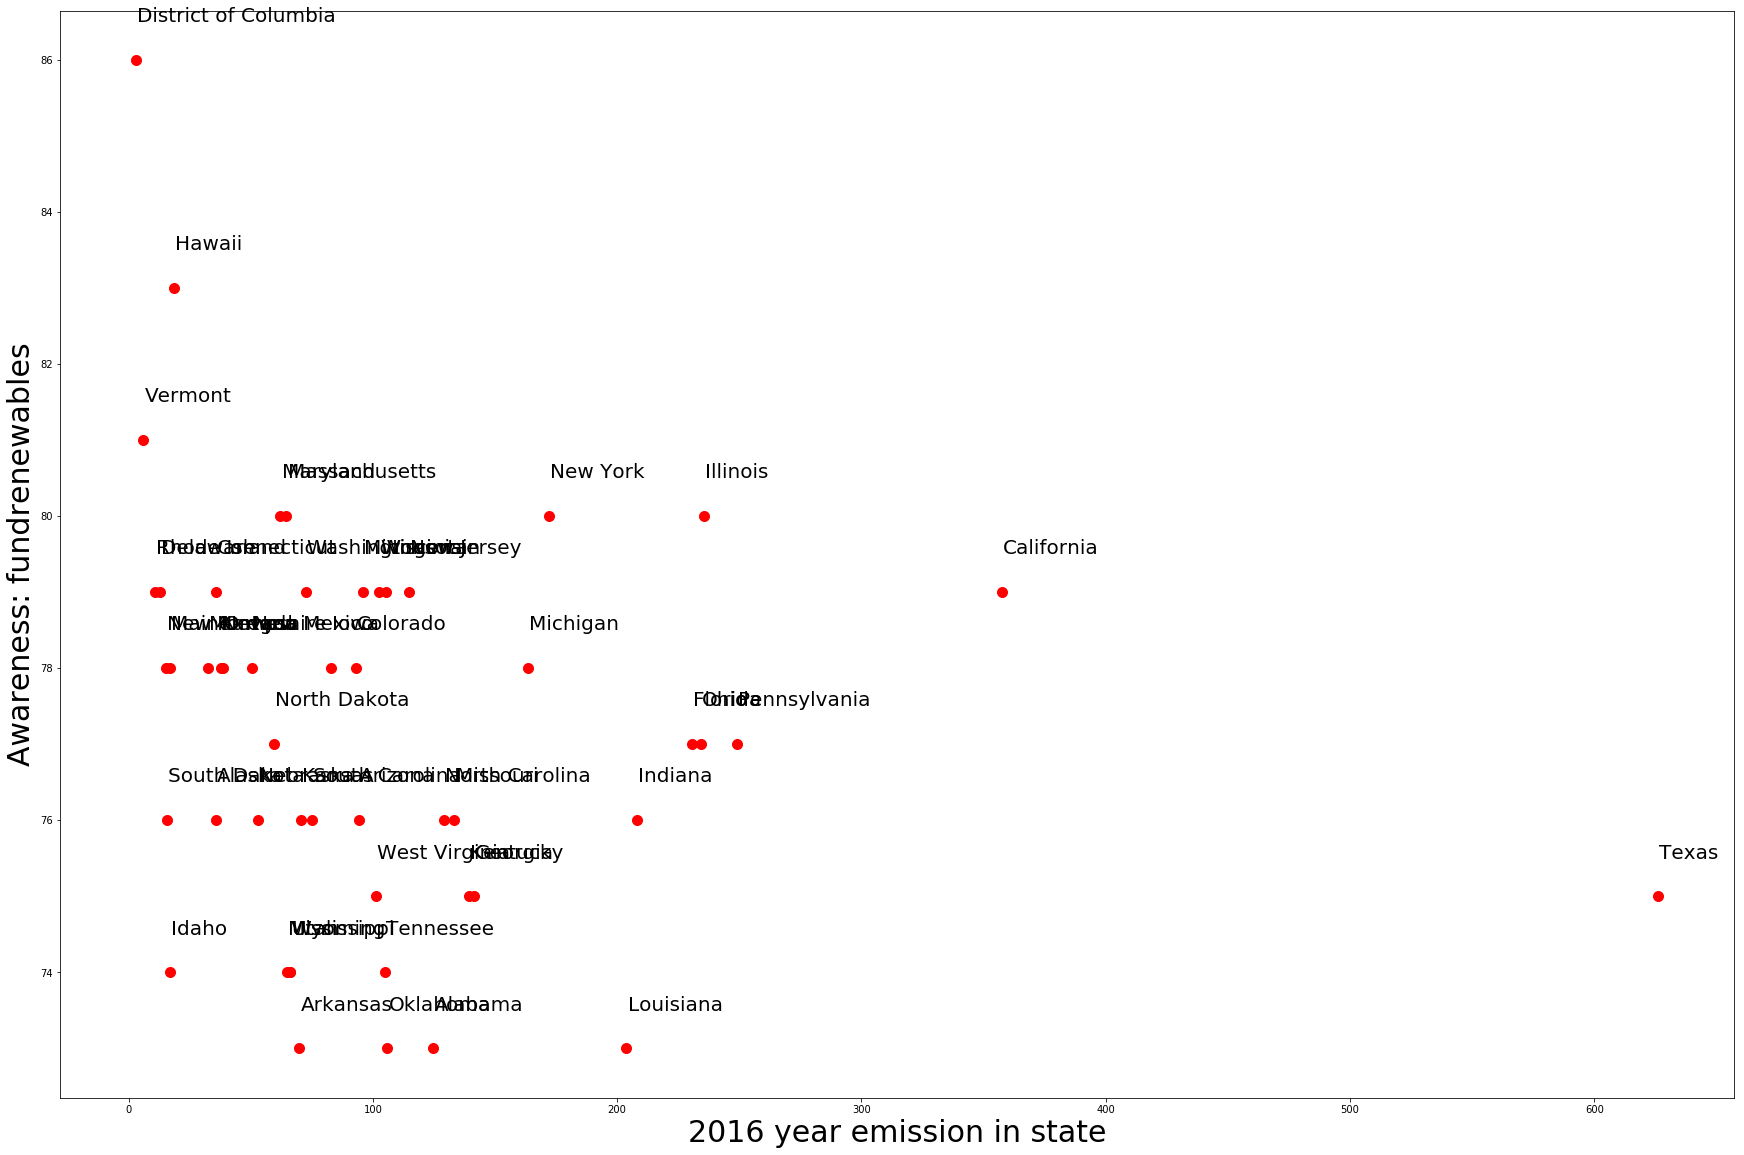

In [79]:
x = State_Awareness_CO2_2014['twothousandfourteen']
y = State_Awareness_CO2_2014['fundrenewables']
types = State_Awareness_CO2_2014['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: fundrenewables', fontsize = 30)

## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

## Correlation of awareness variables and  carbon dioxide emission in 2016

The correlation of each awareness data variable witht the carbon dioxide emission in 2016

In [80]:
corrs_2016 = State_Awareness_CO2_2016.corr()
corrs_2016[['twothousandsixteen']]

twothousandsixteen
happening                    -0.007807
human                         0.005604
worried                       0.010455
personal                      0.163041
CO2limits                    -0.025026
regulate                     -0.098343
fundrenewables               -0.288561
twothousandsixteen            1.000000

### Visualizing the correlation in 2016

1. A scatter point of the correlation between "the awareness of whether climate change is happening" and "the carbon dioxide emission" in 2016

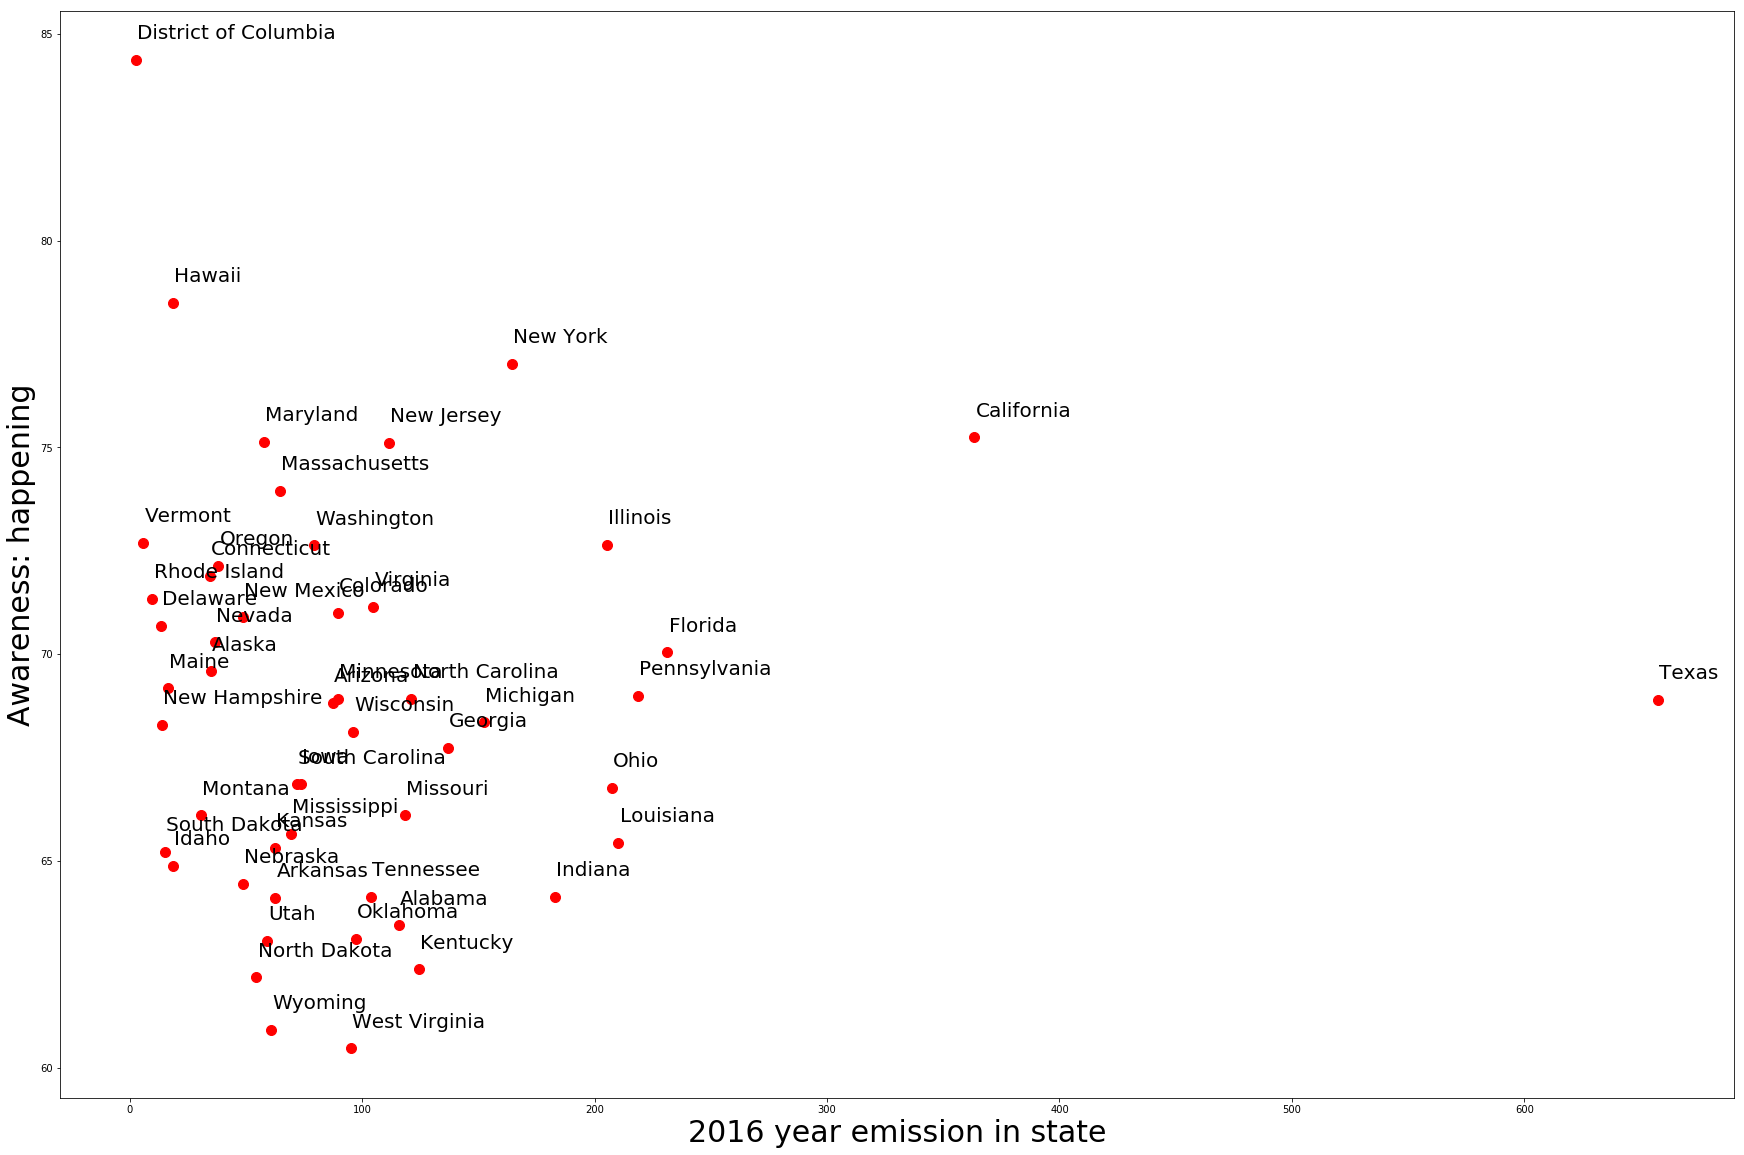

In [81]:
x = State_Awareness_CO2_2016['twothousandsixteen']
y = State_Awareness_CO2_2016['happening']
types = State_Awareness_CO2_2016['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: happening', fontsize = 30)

## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

2. A scatter point of the correlation between "the awareness of whether human causeses climate change " and "the carbon dioxide emission" in 2016

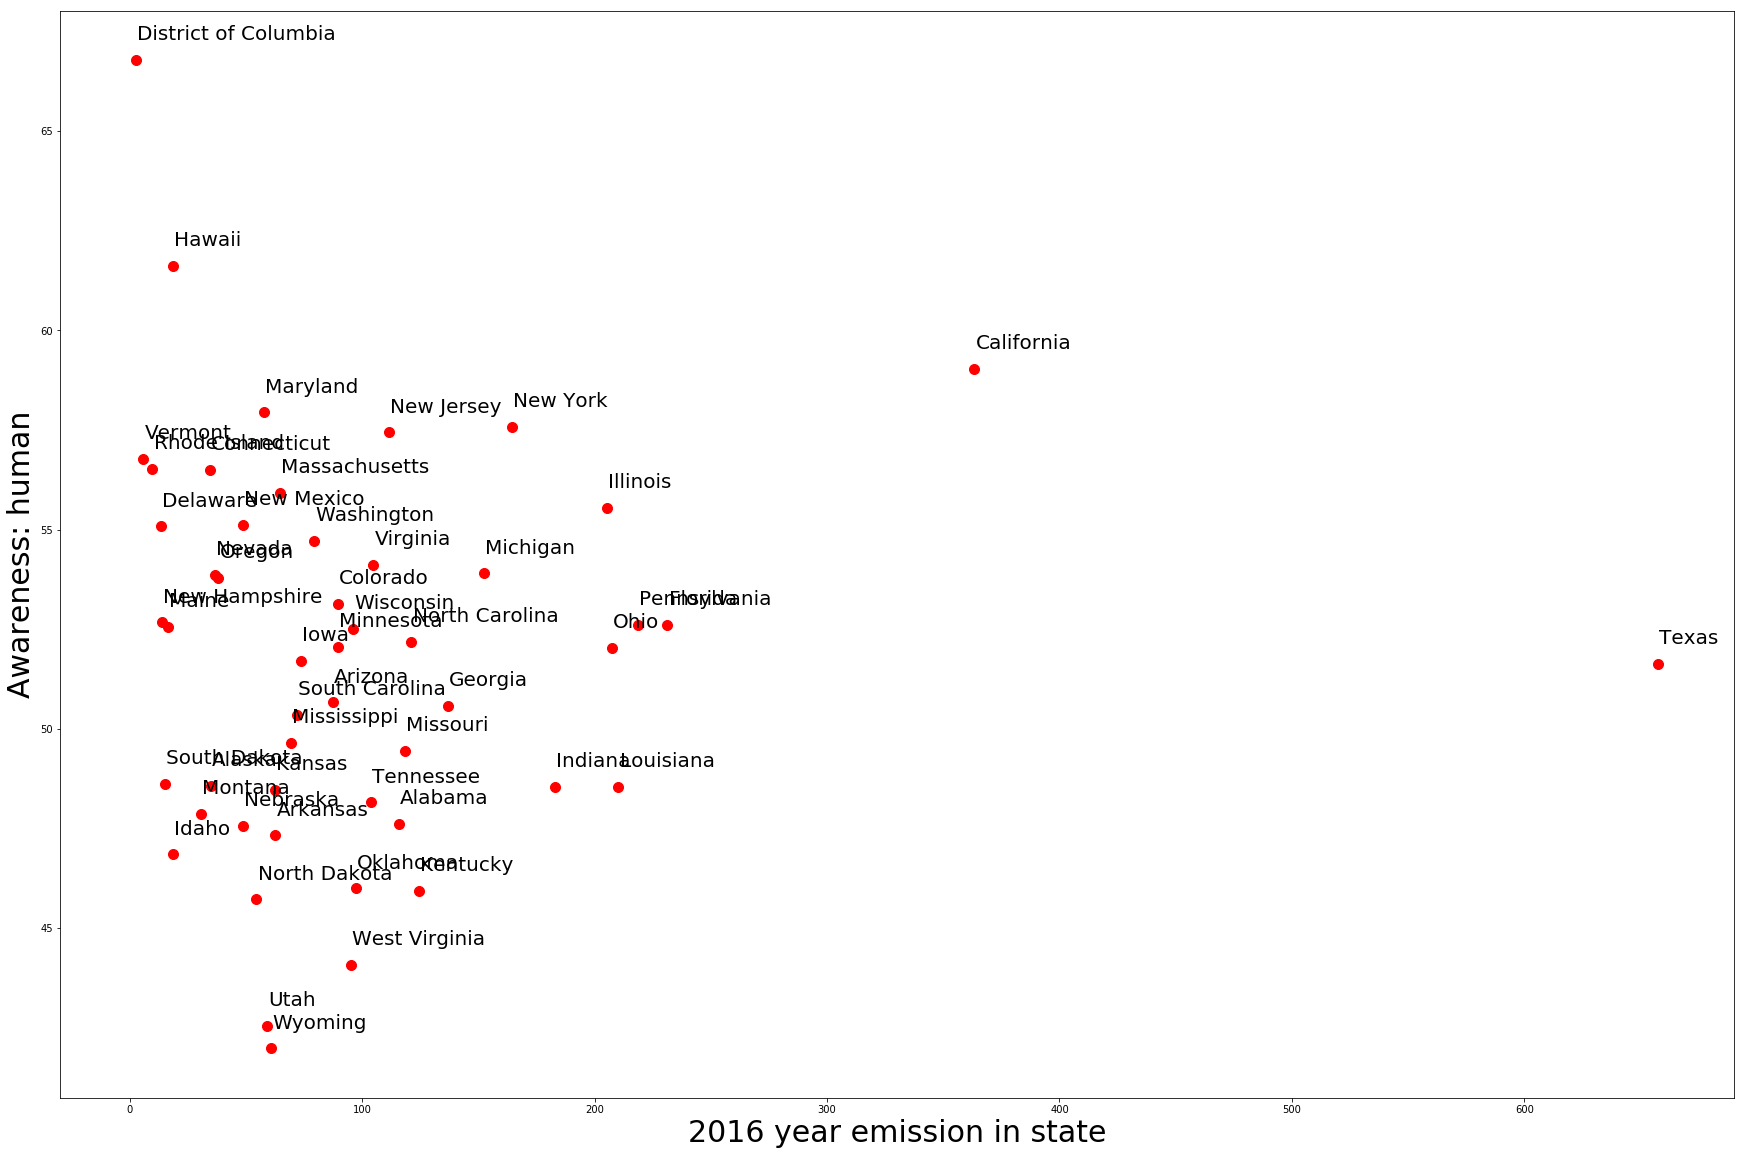

In [82]:
x = State_Awareness_CO2_2016['twothousandsixteen']
y = State_Awareness_CO2_2016['human']
types = State_Awareness_CO2_2016['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: human', fontsize = 30)
## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

3. A scatter point of the correlation between "the awareness of whether people worry about climate change" and "the carbon dioxide emission" in 2016

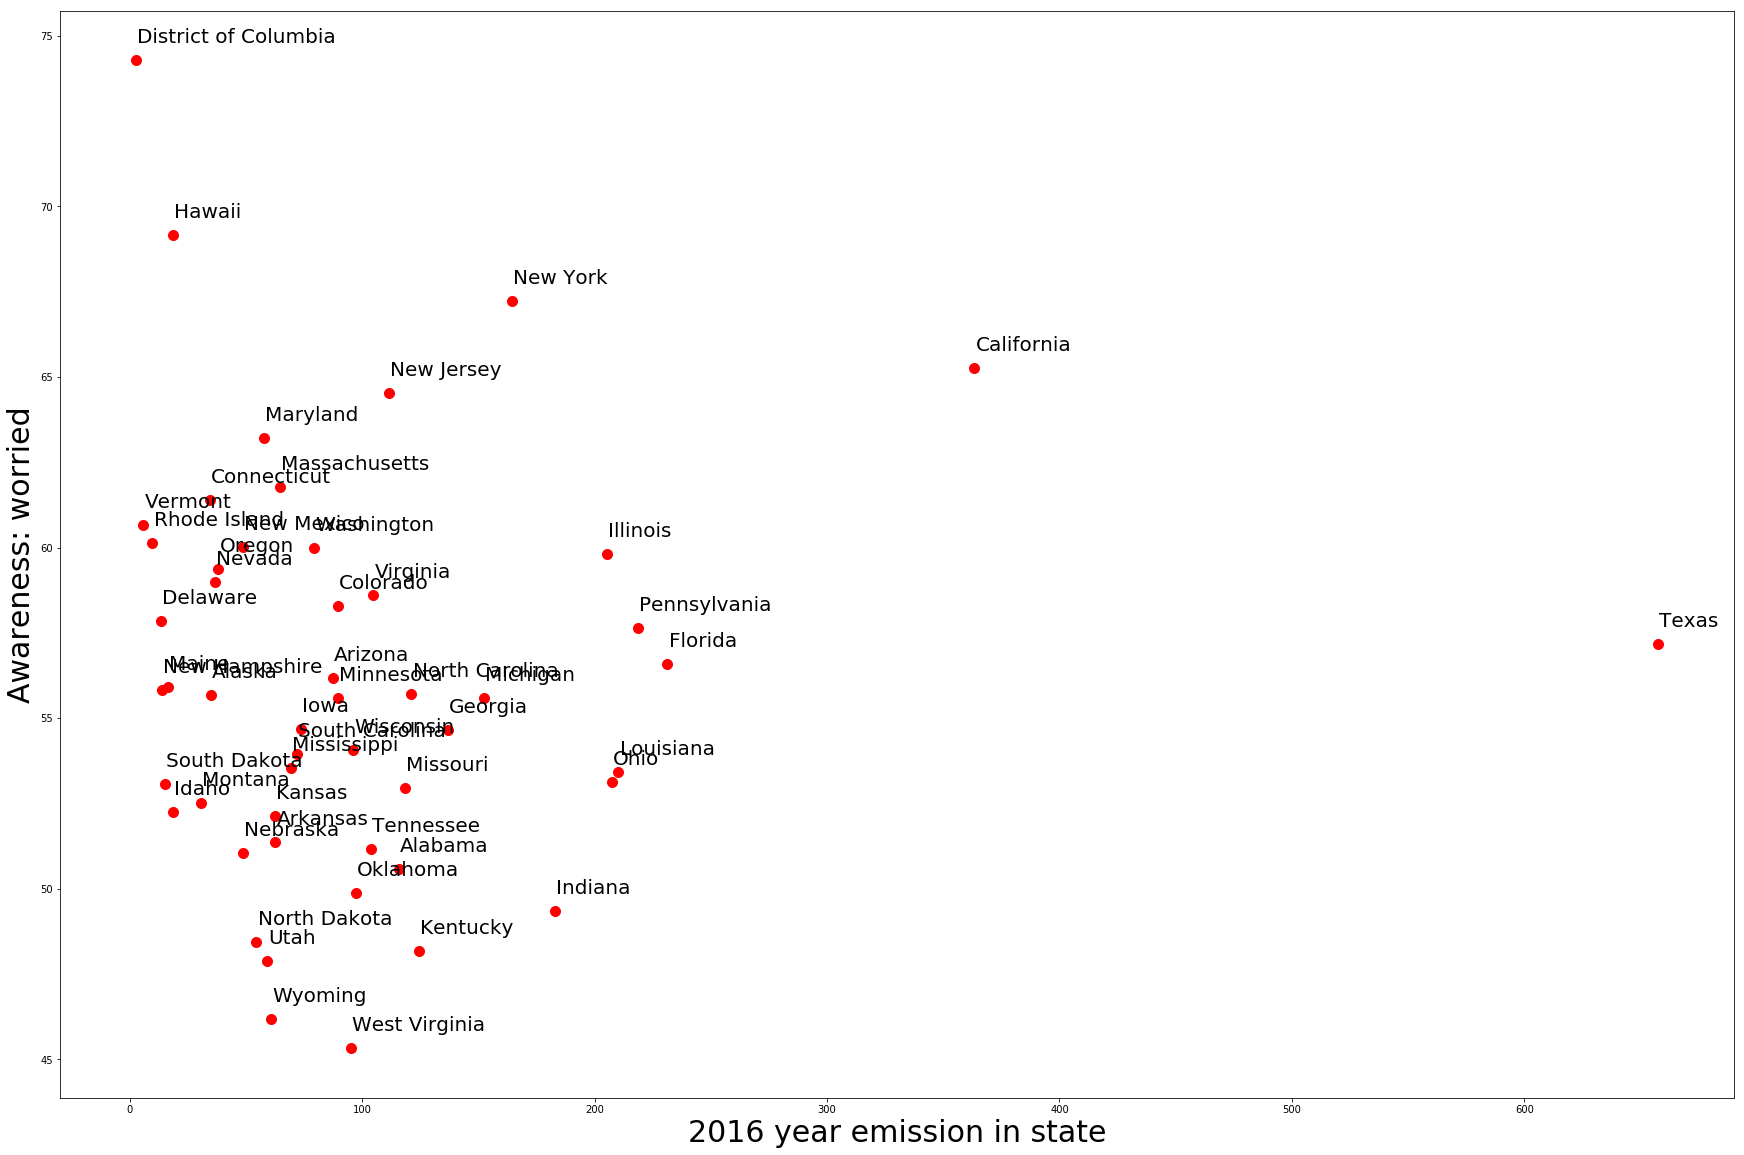

In [83]:
x = State_Awareness_CO2_2016['twothousandsixteen']
y = State_Awareness_CO2_2016['worried']
types = State_Awareness_CO2_2016['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: worried', fontsize = 30)
## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

4. A scatter point of the correlation between "the awareness of whether ???? " and "the carbon dioxide emission" in 2014 
(to be finished)

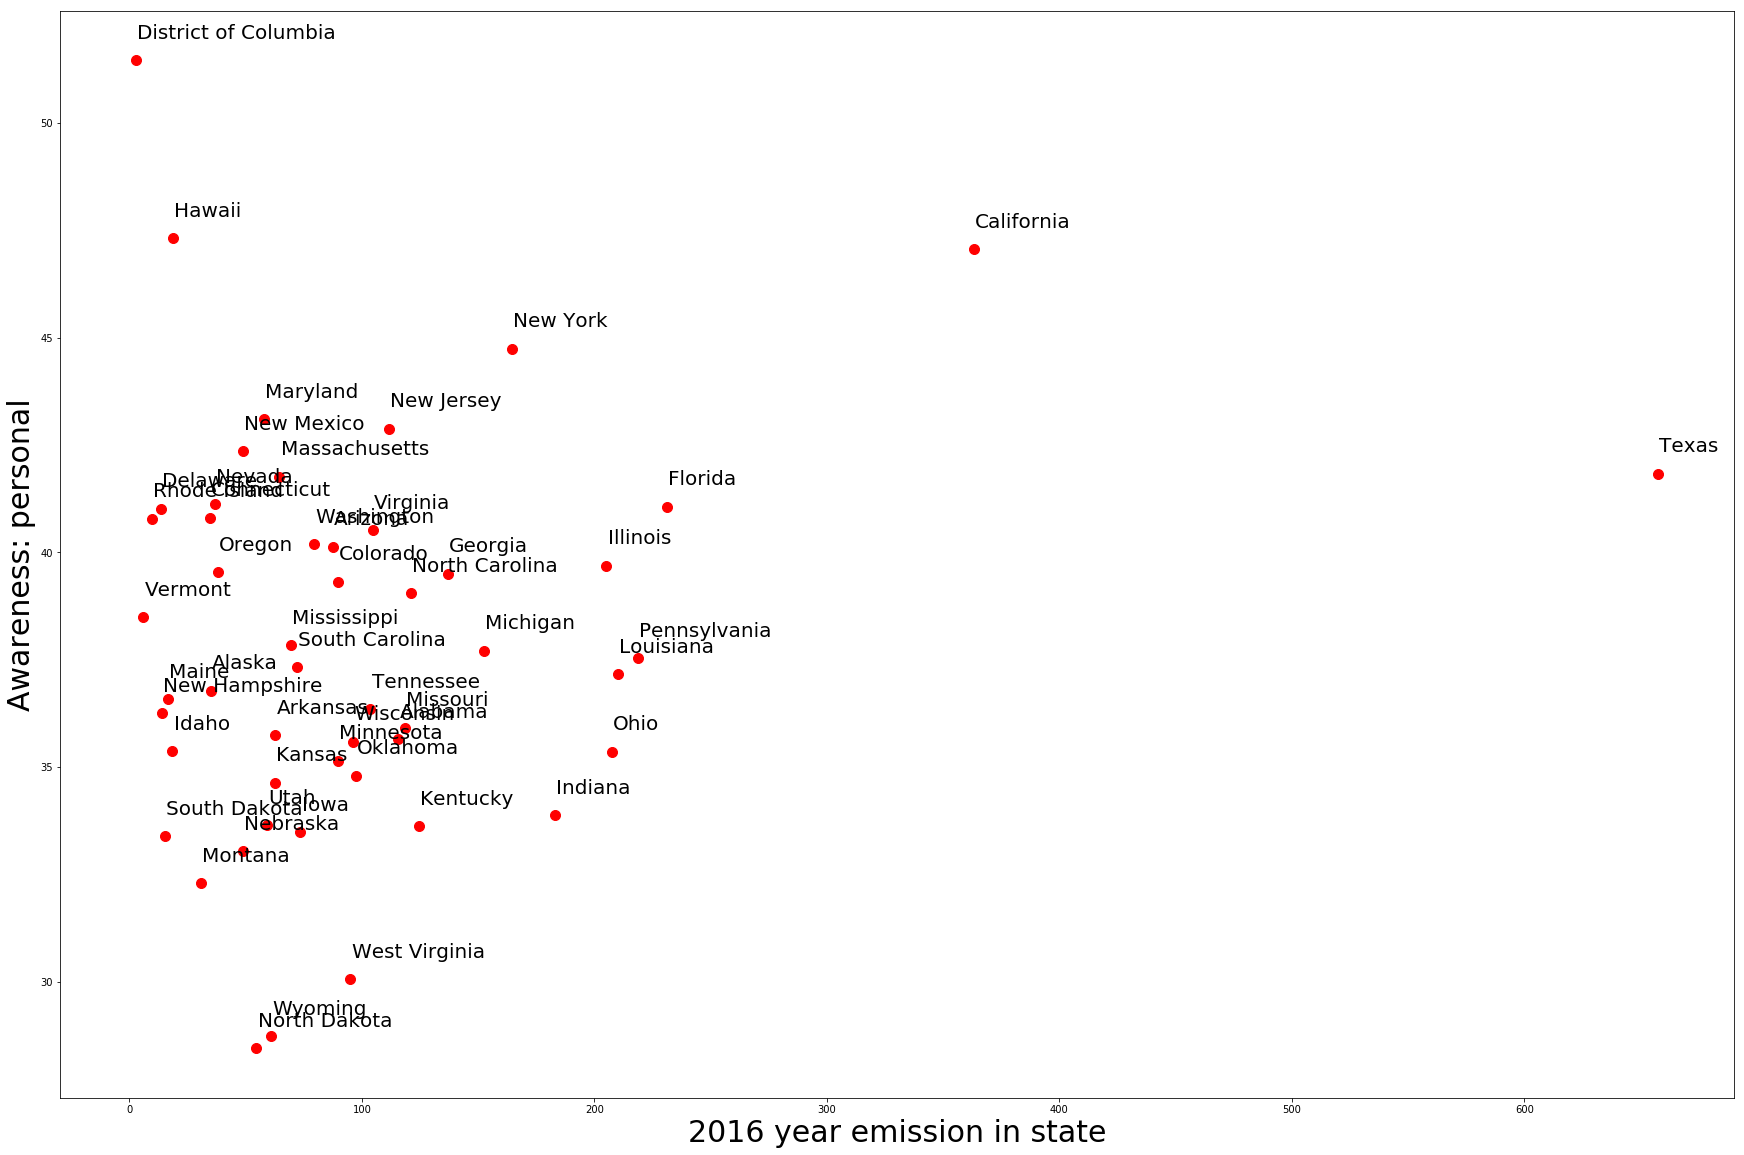

In [84]:
x = State_Awareness_CO2_2016['twothousandsixteen']
y = State_Awareness_CO2_2016['personal']
types = State_Awareness_CO2_2016['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: personal', fontsize = 30)
    
## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

5. A scatter point of the correlation between "the awareness of whether we should limit the carbon dioxide emission " and "the carbon dioxide emission" in 2014 
(to be confrim)

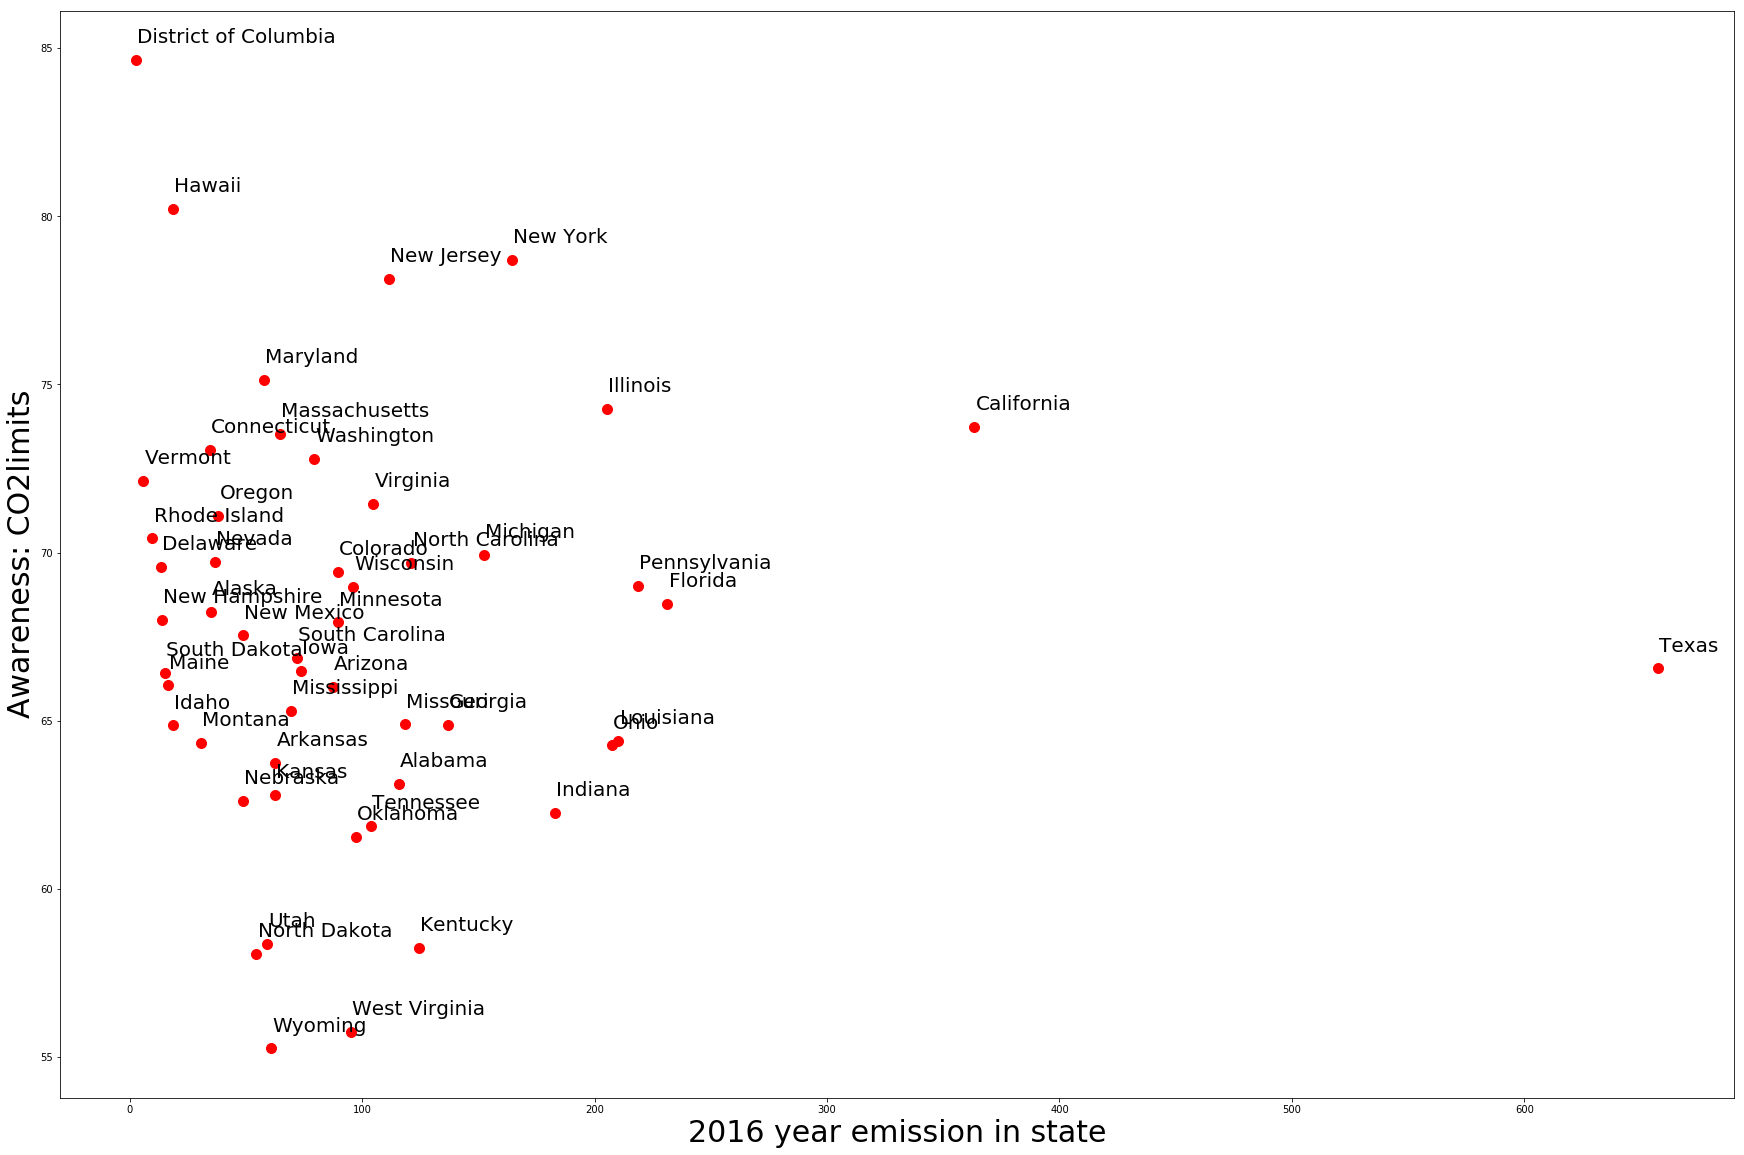

In [85]:
x = State_Awareness_CO2_2016['twothousandsixteen']
y = State_Awareness_CO2_2016['CO2limits']
types = State_Awareness_CO2_2016['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: CO2limits', fontsize = 30)
## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

6. A scatter point of the correlation between "the awareness of whether we should regulate the carbon emission" and "the carbon dioxide emission" in 2016

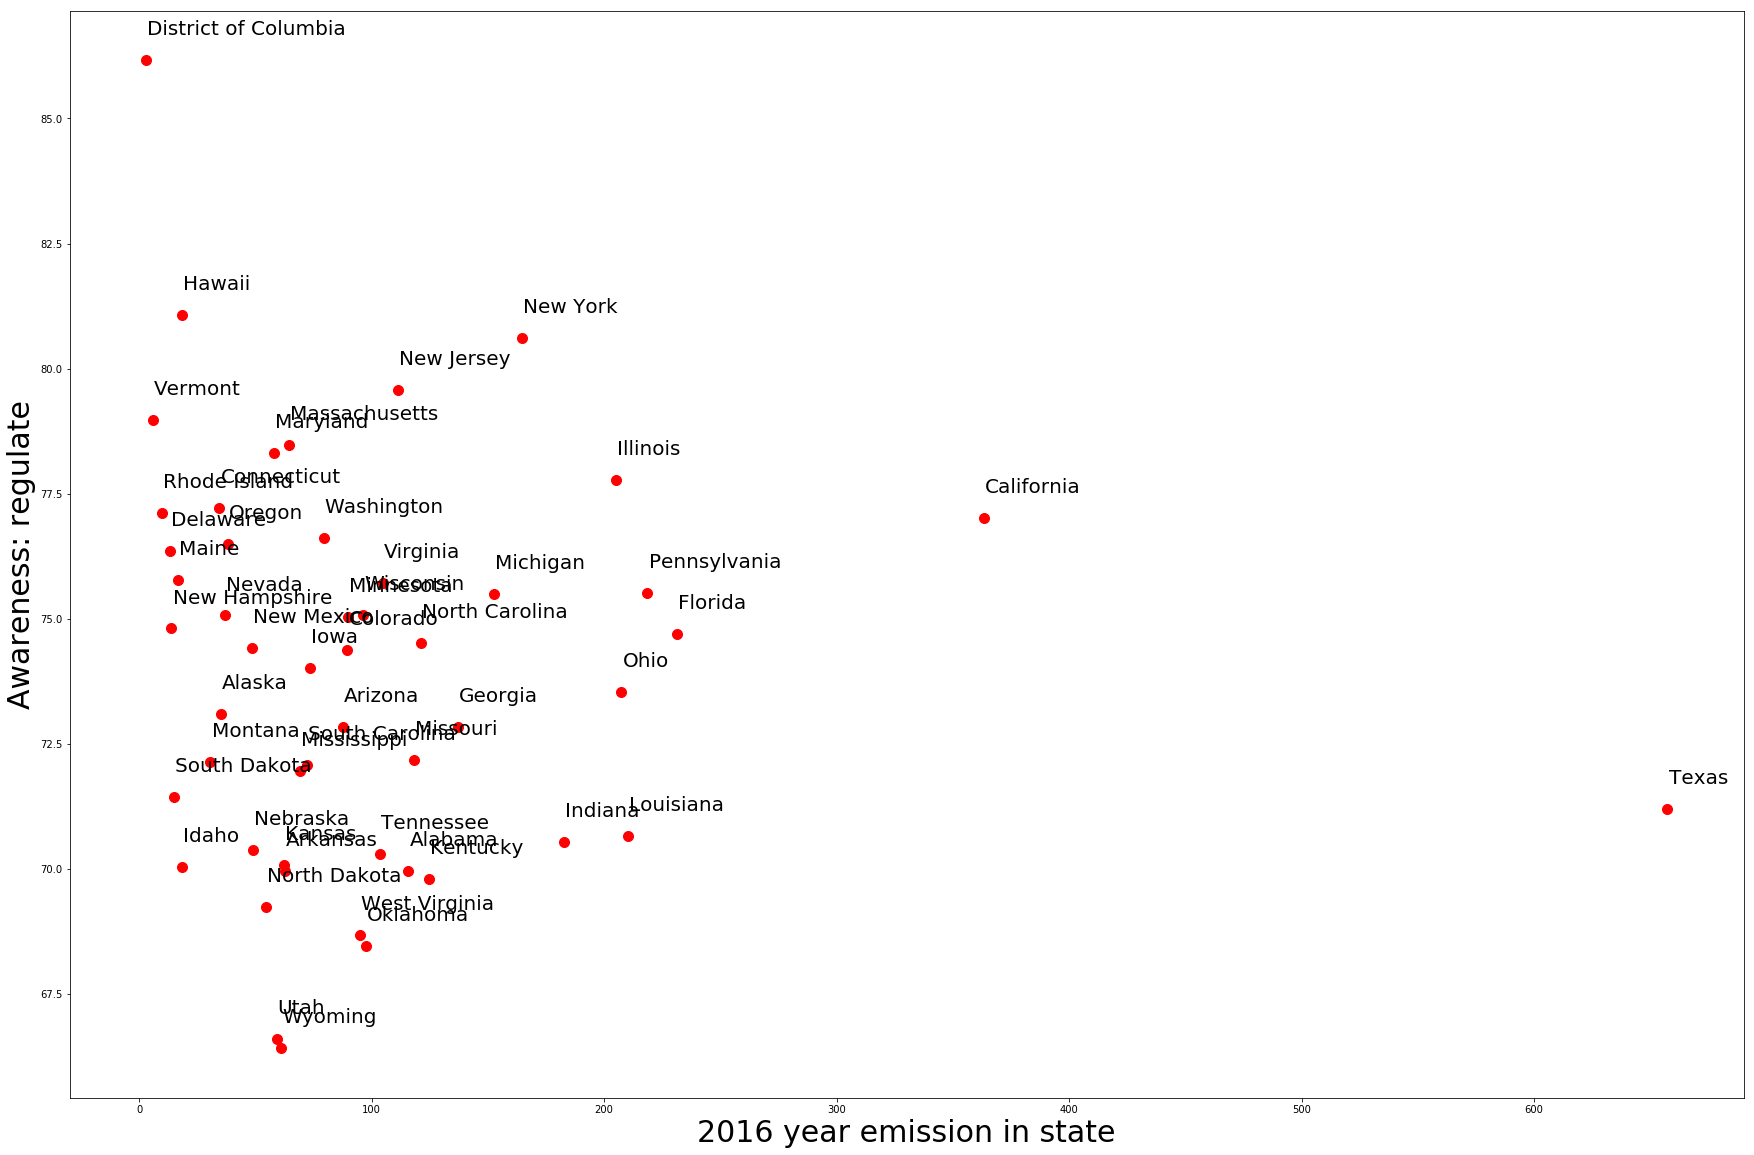

In [86]:
x = State_Awareness_CO2_2016['twothousandsixteen']
y = State_Awareness_CO2_2016['regulate']
types = State_Awareness_CO2_2016['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: regulate', fontsize = 30)

## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

7. A scatter point of the correlation between "the awareness of whether we should fund renewable resources" and "the carbon dioxide emission" in 2016

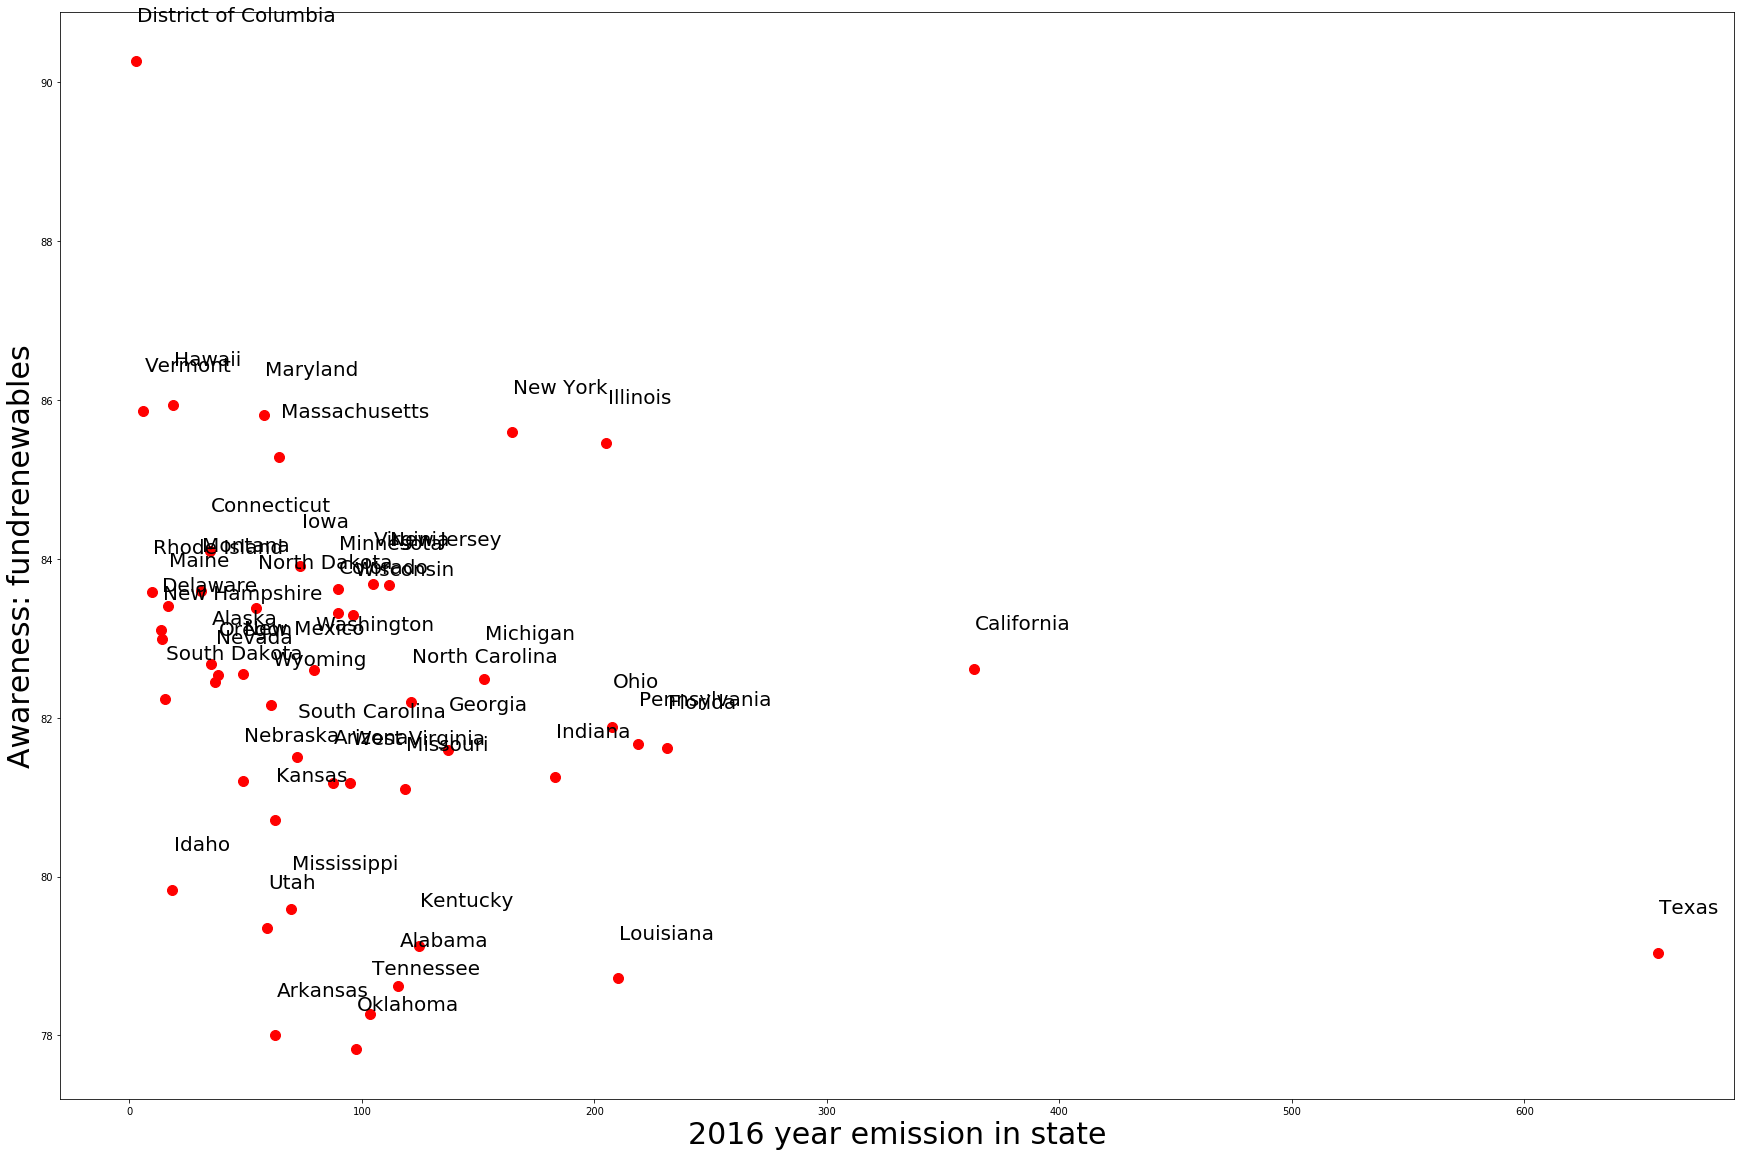

In [87]:
x = State_Awareness_CO2_2016['twothousandsixteen']
y = State_Awareness_CO2_2016['fundrenewables']
types = State_Awareness_CO2_2016['State']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 20)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 20)
    plt.xlabel('2016 year emission in state', fontsize = 30)
    plt.ylabel('Awareness: fundrenewables', fontsize = 30)
## adjust the size of the size
plt.gcf().set_size_inches((30, 20))
plt.show()

### Linear Model

#### 2014

In [88]:
outcome_1,predictors_1 = patsy.dmatrices("twothousandfourteen ~ happening + human + worried + personal + CO2limits + regulate + fundrenewables", State_Awareness_CO2_2014)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                             OLS Regression Results                            
Dep. Variable:     twothousandfourteen   R-squared:                       0.267
Model:                             OLS   Adj. R-squared:                  0.147
Method:                  Least Squares   F-statistic:                     2.232
Date:                 Tue, 04 Jun 2019   Prob (F-statistic):             0.0499
Time:                         01:02:01   Log-Likelihood:                -301.69
No. Observations:                   51   AIC:                             619.4
Df Residuals:                       43   BIC:                             634.8
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1681.7303    919.2

#### 2016

In [89]:
outcome_1,predictors_1 = patsy.dmatrices("twothousandsixteen ~ happening + human + worried + personal + CO2limits + regulate + fundrenewables", State_Awareness_CO2_2016)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:     twothousandsixteen   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     2.448
Date:                Tue, 04 Jun 2019   Prob (F-statistic):             0.0332
Time:                        01:02:01   Log-Likelihood:                -301.63
No. Observations:                  51   AIC:                             619.3
Df Residuals:                      43   BIC:                             634.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2446.3831    938.030      2.

## Data cleaning for GDP per capita of states in 2014, 2016 and 2018

#### Read and clean the GDP data

In [94]:
df_gdp_states = pd.read_csv('Datasets/GDP_Per_Capita_by_States.csv',  sep=',',header = 4, index_col = False)
df_gdp_states

GeoFips               GeoName  \
0                                               00000         United States   
1                                               01000               Alabama   
2                                               02000                Alaska   
3                                               04000               Arizona   
4                                               05000              Arkansas   
5                                               06000            California   
6                                               08000              Colorado   
7                                               09000           Connecticut   
8                                               10000              Delaware   
9                                               11000  District of Columbia   
10                                              12000               Florida   
11                                              13000               Georgia   
12                                              15000                Hawaii   
13                                              16000                 Idaho   
14                                              17000              Illinois   
15                                              18000               Indiana   
16                                              19000                  Iowa   
17                                              20000                Kansas   
18                                              21000              Kentucky   
19                                              22000             Louisiana   
20                                              23000                 Maine   
21                                              24000              Maryland   
22                                              25000         Massachusetts   
23                                              26000              Michigan   
24                                              27000             Minnesota   
25                                              28000           Mississippi   
26                                              29000              Missouri   
27                                              30000               Montana   
28                                              31000              Nebraska   
29                                              32000                Nevada   
..                                                ...                   ...   
33                                              36000              New York   
34                                              37000        North Carolina   
35                                              38000          North Dakota   
36                                              39000                  Ohio   
37                                              40000              Oklahoma   
38                                              41000                Oregon   
39                                              42000          Pennsylvania   
40                                              44000          Rhode Island   
41                                              45000        South Carolina   
42                                              46000          South Dakota   
43                                              47000             Tennessee   
44                                              48000                 Texas   
45                                              49000                  Utah   
46                                              50000               Vermont   
47                                              51000              Virginia   
48                                              53000            Washington   
49                                              54000         West Virginia   
50                                              55000             Wisconsin   
51                                              56000               Wyoming   
52               

In [95]:
df_gdp_states = df_gdp_states.dropna()
df_gdp_states

GeoFips               GeoName      2014      2016      2018
0    00000         United States   53080.0   54660.0   56749.0
1    01000               Alabama   38479.0   38977.0   40279.0
2    02000                Alaska   72265.0   70947.0   70936.0
3    04000               Arizona   40602.0   41564.0   43096.0
4    05000              Arkansas   37977.0   38051.0   38467.0
5    06000            California   59804.0   63731.0   67698.0
6    08000              Colorado   55130.0   56926.0   59057.0
7    09000           Connecticut   66084.0   67468.0   67784.0
8    10000              Delaware   68297.0   67127.0   66023.0
9    11000  District of Columbia  173523.0  173856.0  176534.0
10   12000               Florida   40499.0   41882.0   43052.0
11   13000               Georgia   46088.0   48058.0   49663.0
12   15000                Hawaii   52658.0   55148.0   56880.0
13   16000                 Idaho   37614.0   38959.0   39843.0
14   17000              Illinois   56965.0   57989.0   59980.0
15   18000               Indiana   47479.0   47507.0   48738.0
16   19000                  Iowa   52973.0   53934.0   54101.0
17   20000                Kansas   49348.0   50923.0   52297.0
18   21000              Kentucky   40719.0   40920.0   41659.0
19   22000             Louisiana   49921.0   48849.0   49606.0
20   23000                 Maine   40141.0   41091.0   42356.0
21   24000              Maryland   56848.0   59133.0   60886.0
22   25000         Massachusetts   67046.0   70005.0   72635.0
23   26000              Michigan   43351.0   45088.0   46858.0
24   27000             Minnesota   56534.0   57504.0   59057.0
25   28000           Mississippi   33247.0   33504.0   34029.0
26   29000              Missouri   45040.0   44882.0   46064.0
27   30000               Montana   42169.0   42477.0   42173.0
28   31000              Nebraska   57000.0   57833.0   58141.0
29   32000                Nevada   45995.0   47361.0   48189.0
30   33000         New Hampshire   52110.0   54041.0   55744.0
31   34000            New Jersey   59212.0   60527.0   62263.0
32   35000            New Mexico   42649.0   43468.0   44187.0
33   36000              New York   68589.0   70680.0   73531.0
34   37000        North Carolina   45665.0   46564.0   47778.0
35   38000          North Dakota   76357.0   67279.0   67308.0
36   39000                  Ohio   49157.0   49987.0   51456.0
37   40000              Oklahoma   48491.0   48162.0   48954.0
38   41000                Oregon   45910.0   48964.0   50996.0
39   42000          Pennsylvania   51981.0   53621.0   55602.0
40   44000          Rhode Island   49439.0   50125.0   50827.0
41   45000        South Carolina   37995.0   39221.0   39883.0
42   46000          South Dakota   51938.0   52642.0   51997.0
43   47000             Tennessee   44570.0   46101.0   47695.0
44   48000                 Texas   56060.0   57025.0   58417.0
45   49000                  Utah   46262.0   48273.0   49740.0
46   50000               Vermont   45569.0   46913.0   47921.0
47   51000              Virginia   53600.0   54143.0   55929.0
48   53000            Washington   60310.0   63071.0   67242.0
49   54000         West Virginia   37765.0   37502.0   39495.0
50   55000             Wisconsin   48893.0   49960.0   51575.0
51   56000               Wyoming   66193.0   65167.0   66413.0
52   91000           New England   60843.0   62928.0   64600.0
53   92000               Mideast   62527.0   64345.0   66560.0
54   93000           Great Lakes   49806.0   50784.0   52419.0
55   94000                Plains   52248.0   52631.0   53613.0
56   95000             Southeast   43353.0   44295.0   45530.0
57   96000             Southwest   51992.0   52877.0   54229.0
58   97000        Rocky Mountain   49802.0   51340.0   52834.0
59   98000              Far West   58129.0   61582.0   65130.0

In [96]:
df_gdp_states = df_gdp_states.drop(labels = 'GeoFips', axis = 1)
df_gdp_states = df_gdp_states.drop(index = 0, axis = 1)
df_gdp_states = df_gdp_states.rename(index = str, columns = {'GeoName' : 'State'})
df_gdp_states

State      2014      2016      2018
1                Alabama   38479.0   38977.0   40279.0
2                 Alaska   72265.0   70947.0   70936.0
3                Arizona   40602.0   41564.0   43096.0
4               Arkansas   37977.0   38051.0   38467.0
5             California   59804.0   63731.0   67698.0
6               Colorado   55130.0   56926.0   59057.0
7            Connecticut   66084.0   67468.0   67784.0
8               Delaware   68297.0   67127.0   66023.0
9   District of Columbia  173523.0  173856.0  176534.0
10               Florida   40499.0   41882.0   43052.0
11               Georgia   46088.0   48058.0   49663.0
12                Hawaii   52658.0   55148.0   56880.0
13                 Idaho   37614.0   38959.0   39843.0
14              Illinois   56965.0   57989.0   59980.0
15               Indiana   47479.0   47507.0   48738.0
16                  Iowa   52973.0   53934.0   54101.0
17                Kansas   49348.0   50923.0   52297.0
18              Kentucky   40719.0   40920.0   41659.0
19             Louisiana   49921.0   48849.0   49606.0
20                 Maine   40141.0   41091.0   42356.0
21              Maryland   56848.0   59133.0   60886.0
22         Massachusetts   67046.0   70005.0   72635.0
23              Michigan   43351.0   45088.0   46858.0
24             Minnesota   56534.0   57504.0   59057.0
25           Mississippi   33247.0   33504.0   34029.0
26              Missouri   45040.0   44882.0   46064.0
27               Montana   42169.0   42477.0   42173.0
28              Nebraska   57000.0   57833.0   58141.0
29                Nevada   45995.0   47361.0   48189.0
30         New Hampshire   52110.0   54041.0   55744.0
31            New Jersey   59212.0   60527.0   62263.0
32            New Mexico   42649.0   43468.0   44187.0
33              New York   68589.0   70680.0   73531.0
34        North Carolina   45665.0   46564.0   47778.0
35          North Dakota   76357.0   67279.0   67308.0
36                  Ohio   49157.0   49987.0   51456.0
37              Oklahoma   48491.0   48162.0   48954.0
38                Oregon   45910.0   48964.0   50996.0
39          Pennsylvania   51981.0   53621.0   55602.0
40          Rhode Island   49439.0   50125.0   50827.0
41        South Carolina   37995.0   39221.0   39883.0
42          South Dakota   51938.0   52642.0   51997.0
43             Tennessee   44570.0   46101.0   47695.0
44                 Texas   56060.0   57025.0   58417.0
45                  Utah   46262.0   48273.0   49740.0
46               Vermont   45569.0   46913.0   47921.0
47              Virginia   53600.0   54143.0   55929.0
48            Washington   60310.0   63071.0   67242.0
49         West Virginia   37765.0   37502.0   39495.0
50             Wisconsin   48893.0   49960.0   51575.0
51               Wyoming   66193.0   65167.0   66413.0
52           New England   60843.0   62928.0   64600.0
53               Mideast   62527.0   64345.0   66560.0
54           Great Lakes   49806.0   50784.0   52419.0
55                Plains   52248.0   52631.0   53613.0
56             Southeast   43353.0   44295.0   45530.0
57             Southwest   51992.0   52877.0   54229.0
58        Rocky Mountain   49802.0   51340.0   52834.0
59              Far West   58129.0   61582.0   65130.0

In [97]:
list(df_gdp_states.columns)

['State', '2014', '2016', '2018']

#### Extract the columns of each year as separate dataframes

In [98]:
columns14 = ['State', '2014']
df_gdp_states14 = df_gdp_states[columns14]
df_gdp_states14

State      2014
1                Alabama   38479.0
2                 Alaska   72265.0
3                Arizona   40602.0
4               Arkansas   37977.0
5             California   59804.0
6               Colorado   55130.0
7            Connecticut   66084.0
8               Delaware   68297.0
9   District of Columbia  173523.0
10               Florida   40499.0
11               Georgia   46088.0
12                Hawaii   52658.0
13                 Idaho   37614.0
14              Illinois   56965.0
15               Indiana   47479.0
16                  Iowa   52973.0
17                Kansas   49348.0
18              Kentucky   40719.0
19             Louisiana   49921.0
20                 Maine   40141.0
21              Maryland   56848.0
22         Massachusetts   67046.0
23              Michigan   43351.0
24             Minnesota   56534.0
25           Mississippi   33247.0
26              Missouri   45040.0
27               Montana   42169.0
28              Nebraska   57000.0
29                Nevada   45995.0
30         New Hampshire   52110.0
31            New Jersey   59212.0
32            New Mexico   42649.0
33              New York   68589.0
34        North Carolina   45665.0
35          North Dakota   76357.0
36                  Ohio   49157.0
37              Oklahoma   48491.0
38                Oregon   45910.0
39          Pennsylvania   51981.0
40          Rhode Island   49439.0
41        South Carolina   37995.0
42          South Dakota   51938.0
43             Tennessee   44570.0
44                 Texas   56060.0
45                  Utah   46262.0
46               Vermont   45569.0
47              Virginia   53600.0
48            Washington   60310.0
49         West Virginia   37765.0
50             Wisconsin   48893.0
51               Wyoming   66193.0
52           New England   60843.0
53               Mideast   62527.0
54           Great Lakes   49806.0
55                Plains   52248.0
56             Southeast   43353.0
57             Southwest   51992.0
58        Rocky Mountain   49802.0
59              Far West   58129.0

In [99]:
columns16 = ['State', '2016']
df_gdp_states16 = df_gdp_states[columns16]
df_gdp_states16

State      2016
1                Alabama   38977.0
2                 Alaska   70947.0
3                Arizona   41564.0
4               Arkansas   38051.0
5             California   63731.0
6               Colorado   56926.0
7            Connecticut   67468.0
8               Delaware   67127.0
9   District of Columbia  173856.0
10               Florida   41882.0
11               Georgia   48058.0
12                Hawaii   55148.0
13                 Idaho   38959.0
14              Illinois   57989.0
15               Indiana   47507.0
16                  Iowa   53934.0
17                Kansas   50923.0
18              Kentucky   40920.0
19             Louisiana   48849.0
20                 Maine   41091.0
21              Maryland   59133.0
22         Massachusetts   70005.0
23              Michigan   45088.0
24             Minnesota   57504.0
25           Mississippi   33504.0
26              Missouri   44882.0
27               Montana   42477.0
28              Nebraska   57833.0
29                Nevada   47361.0
30         New Hampshire   54041.0
31            New Jersey   60527.0
32            New Mexico   43468.0
33              New York   70680.0
34        North Carolina   46564.0
35          North Dakota   67279.0
36                  Ohio   49987.0
37              Oklahoma   48162.0
38                Oregon   48964.0
39          Pennsylvania   53621.0
40          Rhode Island   50125.0
41        South Carolina   39221.0
42          South Dakota   52642.0
43             Tennessee   46101.0
44                 Texas   57025.0
45                  Utah   48273.0
46               Vermont   46913.0
47              Virginia   54143.0
48            Washington   63071.0
49         West Virginia   37502.0
50             Wisconsin   49960.0
51               Wyoming   65167.0
52           New England   62928.0
53               Mideast   64345.0
54           Great Lakes   50784.0
55                Plains   52631.0
56             Southeast   44295.0
57             Southwest   52877.0
58        Rocky Mountain   51340.0
59              Far West   61582.0

In [ ]:
##columns18 = ['State', '2018']
##df_gdp_states18 = df_gdp_states[columns18]
##df_gdp_states18

#### Merge each year's real GDP per capita to corresponsing awareness dataframes

In [105]:
awareness_gdp14 = pd.merge(df_YPCCC_2014_State_renamed, df_gdp_states14, on='State')
awareness_gdp14 = awareness_gdp14.drop(labels = 'TotalPop', axis = 1)
awareness_gdp14 = awareness_gdp14.set_index('State')
awareness_gdp14

happening  human  worried  personal  CO2limits  \
State                                                                  
Alaska                       62     45       48        29         48   
Alabama                      56     43       46        31         53   
Arkansas                     57     44       47        31         59   
Arizona                      64     49       54        38         64   
California                   70     55       62        42         72   
Colorado                     66     50       55        36         66   
Connecticut                  66     51       56        37         70   
District of Columbia         81     61       71        47         80   
Delaware                     65     50       55        36         64   
Florida                      64     50       54        38         62   
Georgia                      63     48       52        36         60   
Hawaii                       75     58       66        43         76   
Iowa                         60     47       50        31         65   
Idaho                        58     44       48        32         63   
Illinois                     67     51       56        36         70   
Indiana                      58     46       46        30         56   
Kansas                       58     45       48        31         60   
Kentucky                     56     44       46        30         53   
Louisiana                    57     44       46        31         50   
Massachusetts                69     52       58        37         68   
Maryland                     68     52       58        38         70   
Maine                        64     49       53        34         62   
Michigan                     61     48       51        33         67   
Minnesota                    63     48       52        32         64   
Missouri                     60     46       50        32         64   
Mississippi                  59     45       50        35         62   
Montana                      60     46       48        29         61   
North Carolina               62     48       52        35         61   
North Dakota                 56     43       43        24         48   
Nebraska                     58     45       48        30         61   
New Hampshire                61     48       51        32         66   
New Jersey                   68     52       59        38         73   
New Mexico                   66     52       56        38         62   
Nevada                       64     50       55        37         69   
New York                     72     54       63        40         76   
Ohio                         59     47       48        32         63   
Oklahoma                     57     44       46        32         52   
Oregon                       67     51       57        36         69   
Pennsylvania                 62     48       53        33         67   
Rhode Island                 66     51       56        36         69   
South Carolina               59     45       49        33         60   
South Dakota                 59     46       50        31         66   
Tennessee                    58     45       48        33         59   
Texas                        63     49       54        38         61   
Utah                         60     45       48        32         58   
Virginia                     64     49       54        35         66   
Vermont                      68     52       57        35         69   
Washington                   68     51       58        37         69   
Wisconsin                    61     48       50        32         66   
West Virginia                54     43       42        25         43   
Wyoming                      55     42       41        25         43   

                      regulate  fundrenewables      2014  
State                                                     
Alaska                      67              76   72265.0  
Alabama                     

In [101]:
awareness_gdp16 = pd.merge(df_YCOM_2016_State_renamed, df_gdp_states16, on='State')
awareness_gdp14 = awareness_gdp14.set_index('State')
awareness_gdp16

State  happening   human  worried  personal  CO2limits  \
0                Alabama     63.450  47.603   50.584    35.646     63.122   
1                 Alaska     69.588  48.562   55.695    36.780     68.231   
2                Arizona     68.827  50.661   56.186    40.135     66.001   
3               Arkansas     64.120  47.318   51.360    35.748     63.744   
4             California     75.241  59.035   65.256    47.059     73.740   
5               Colorado     71.004  53.143   58.291    39.322     69.434   
6            Connecticut     71.904  56.503   61.396    40.810     73.056   
7               Delaware     70.691  55.080   57.848    41.023     69.576   
8   District of Columbia     84.364  66.792   74.292    51.474     84.652   
9                Florida     70.047  52.608   56.594    41.069     68.481   
10               Georgia     67.744  50.565   54.666    39.505     64.886   
11                Hawaii     78.490  61.622   69.168    47.317     80.222   
12                 Idaho     64.889  46.844   52.254    35.374     64.861   
13              Illinois     72.649  55.534   59.809    39.689     74.267   
14               Indiana     64.138  48.545   49.340    33.877     62.248   
15                  Iowa     66.872  51.706   54.680    33.480     66.472   
16                Kansas     65.328  48.464   52.132    34.632     62.802   
17              Kentucky     62.392  45.918   48.179    33.618     58.245   
18             Louisiana     65.452  48.529   53.423    37.164     64.391   
19                 Maine     69.178  52.548   55.915    36.586     66.052   
20              Maryland     75.139  57.944   63.227    43.110     75.136   
21         Massachusetts     73.947  55.928   61.777    41.766     73.522   
22              Michigan     68.353  53.897   55.587    37.713     69.942   
23             Minnesota     68.931  52.050   55.586    35.150     67.924   
24           Mississippi     65.657  49.634   53.549    37.840     65.301   
25              Missouri     66.107  49.443   52.948    35.915     64.890   
26               Montana     66.106  47.858   52.526    32.298     64.333   
27              Nebraska     64.448  47.554   51.052    33.037     62.621   
28                Nevada     70.286  53.868   59.006    41.120     69.729   
29         New Hampshire     68.292  52.670   55.842    36.247     67.991   
30            New Jersey     75.110  57.442   64.546    42.882     78.132   
31            New Mexico     70.893  55.117   60.015    42.356     67.538   
32              New York     77.018  57.575   67.241    44.748     78.707   
33        North Carolina     68.932  52.180   55.709    39.052     69.689   
34          North Dakota     62.190  45.712   48.429    28.443     58.067   
35                  Ohio     66.772  52.019   53.144    35.359     64.263   
36              Oklahoma     63.127  45.989   49.885    34.798     61.548   
37                Oregon     72.137  53.786   59.386    39.543     71.099   
38          Pennsylvania     68.996  52.608   57.636    37.529     69.020   
39          Rhode Island     71.347  56.514   60.136    40.787     70.426   
40        South Carolina     66.856  50.341   53.957    37.331     66.876   
41          South Dakota     65.227  48.620   53.060    33.389     66.427   
42             Tennessee     64.144  48.149   51.170    36.346     61.871   
43                 Texas     68.907  51.626   57.163    41.836     66.557   
44                  Utah     63.071  42.528   47.887    33.648     58.354   
45               Vermont     72.692  56.765   60.665    38.488     72.135   
46              Virginia     71.148  54.106   58.619    40.524     71.459   
47            Washington     72.632  54.714   59.993    40.185     72.793   
48         West Virginia     60.476  44.072   45.324    30.052     55.749   
49             Wisconsin     68.125  52.500   54.059    35.587     68.986   
50               Wyoming     60.921  41.971   46.189    28.734     55.252   

    regulate  

### Correlation 

In [107]:
awareness_gdp14.corr()

happening     human   worried  personal  CO2limits  regulate  \
happening        1.000000  0.979696  0.982173  0.896926   0.828411  0.896383   
human            0.979696  1.000000  0.979566  0.908032   0.850580  0.922747   
worried          0.982173  0.979566  1.000000  0.940866   0.885914  0.927772   
personal         0.896926  0.908032  0.940866  1.000000   0.820030  0.852244   
CO2limits        0.828411  0.850580  0.885914  0.820030   1.000000  0.951695   
regulate         0.896383  0.922747  0.927772  0.852244   0.951695  1.000000   
fundrenewables   0.868240  0.881944  0.830554  0.645423   0.771295  0.857206   
2014             0.573575  0.525024  0.504443  0.391681   0.319005  0.399169   

                fundrenewables      2014  
happening             0.868240  0.573575  
human                 0.881944  0.525024  
worried               0.830554  0.504443  
personal              0.645423  0.391681  
CO2limits             0.771295  0.319005  
regulate              0.857206  0.399169  
fundrenewables        1.000000  0.593551  
2014                  0.593551  1.000000

In [108]:
awareness_gdp16.corr()

happening     human   worried  personal  CO2limits  regulate  \
happening        1.000000  0.962239  0.989117  0.915465   0.968178  0.959190   
human            0.962239  1.000000  0.965012  0.894727   0.949691  0.969783   
worried          0.989117  0.965012  1.000000  0.929416   0.968714  0.946311   
personal         0.915465  0.894727  0.929416  1.000000   0.881063  0.826210   
CO2limits        0.968178  0.949691  0.968714  0.881063   1.000000  0.955971   
regulate         0.959190  0.969783  0.946311  0.826210   0.955971  1.000000   
fundrenewables   0.785824  0.767521  0.743628  0.516371   0.743058  0.836429   
2016             0.608804  0.546568  0.580055  0.483583   0.535958  0.560519   

                fundrenewables      2016  
happening             0.785824  0.608804  
human                 0.767521  0.546568  
worried               0.743628  0.580055  
personal              0.516371  0.483583  
CO2limits             0.743058  0.535958  
regulate              0.836429  0.560519  
fundrenewables        1.000000  0.645254  
2016                  0.645254  1.000000

## Using geographics to visualize the carbon emission and awareness data

In [ ]:
conda install geopandas

In [ ]:
!pip install descartes
!pip install PySAL
!pip install mapclassify

In [ ]:
##state = gpd.read_file(gpd.datasets.get_path(''))
##state.head()¥